In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

In [25]:
customer=pd.read_csv('C:/Users/Administrator/Desktop/FirstChoice/Customer1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
print(customer.dtypes)
customer['occuption']=customer['occuption'].apply(lambda x:'Others' if x=='0' else x )


Business Partner     object
Customer No.         object
Partner Type        float64
partner              object
Data Origin          object
description          object
Short name           object
Title               float64
title1               object
Marital Status      float64
marital status       object
Occupation          float64
occuption            object
Date of Birth        object
Death date          float64
dtype: object


In [36]:
customer

,Business Partner,Customer No.,Partner Type,partner,Data Origin,description,Short name,Title,title1,Marital Status,marital status,Occupation,occuption,Date of Birth,Death date
0,31,1,1.0,Retail,Z001,Camp - Outdoor,Camp - Outdoor,NaN,0,NaN,0,NaN,Others,NaN,NaN
1,32,2,1.0,Retail,Z005,Reference - Customer,Ref - Customer,NaN,0,NaN,0,NaN,Others,NaN,NaN
2,34,4,1.0,Retail,Z005,Reference - Customer,Ref - Customer,NaN,0,2.0,Married,NaN,Others,NaN,NaN
3,35,5,1.0,Retail,Z005,Reference - Customer,Ref - Customer,NaN,0,NaN,0,NaN,Others,NaN,NaN
4,42,7,1.0,Retail,Z008,Just Dial/Other helpline,Just Dial/Other,NaN,0,NaN,0,NaN,Others,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555333,PLX506,PLX506,NaN,0,NaN,0,0,NaN,0,NaN,0,NaN,Others,NaN,NaN
555334,PLX507,PLX507,NaN,0,NaN,0,0,NaN,0,NaN,0,NaN,Others,NaN,NaN
555335,PLX508,PLX508,NaN,0,NaN,0,0,NaN,0,NaN,0,NaN,Others,NaN,NaN
555336,PLX555,PLX555,NaN,0,NaN,0,0,NaN,0,NaN,0,NaN,Others,NaN,NaN


In [27]:
invoice=pd.read_csv('C:/Users/Administrator/Desktop/FirstChoice/Final_invoice.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
customer[['description','occuption']]

,description,occuption
0,Camp - Outdoor,Others
1,Reference - Customer,Others
2,Reference - Customer,Others
3,Reference - Customer,Others
4,Just Dial/Other helpline,Others
...,...,...
555333,0,Others
555334,0,Others
555335,0,Others
555336,0,Others


In [29]:
joint=pd.merge(customer[['description','occuption','Customer No.','partner']],invoice[['Area / Locality','CITY','District','Make','Model','Customer No.']],on='Customer No.')


In [30]:
joint['Model']=joint['Model'].fillna(value='Others')
joint.isna().sum()

description            0
occuption              0
Customer No.           0
partner                0
Area / Locality    19247
CITY                   0
District               0
Make                   0
Model                  0
dtype: int64

In [31]:
joint['District']=joint['District'].str.lower()
joint['District'].unique()

array(['tamil nadu', 'andhra pradesh', 'maharashtra', 'kerala',
       'karnataka', 'gujarat', 'punjab', 'haryana', 'puducherry',
       'uttar pradesh', 'uttarakhand', 'west bengal', 'telangana'],
      dtype=object)

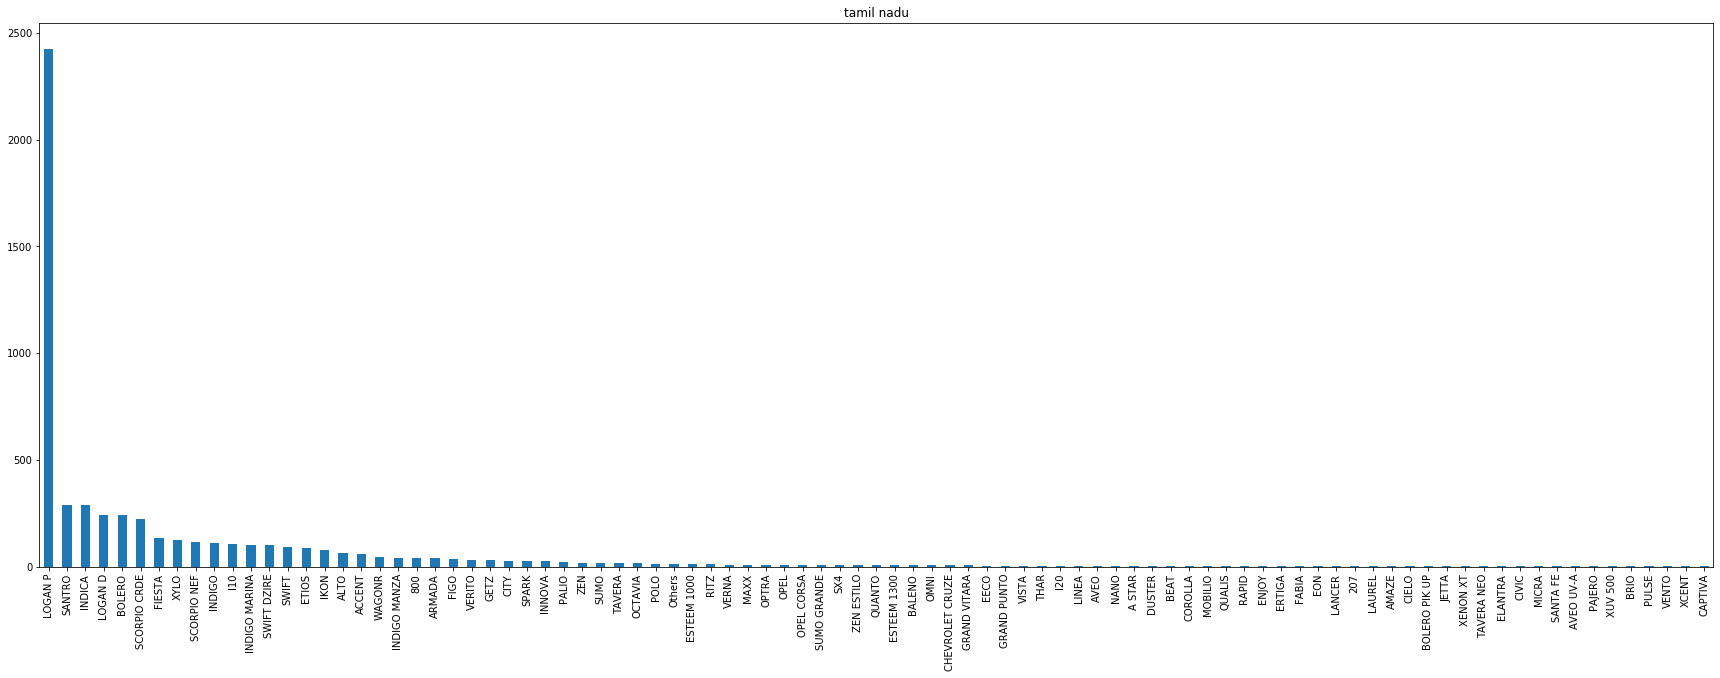

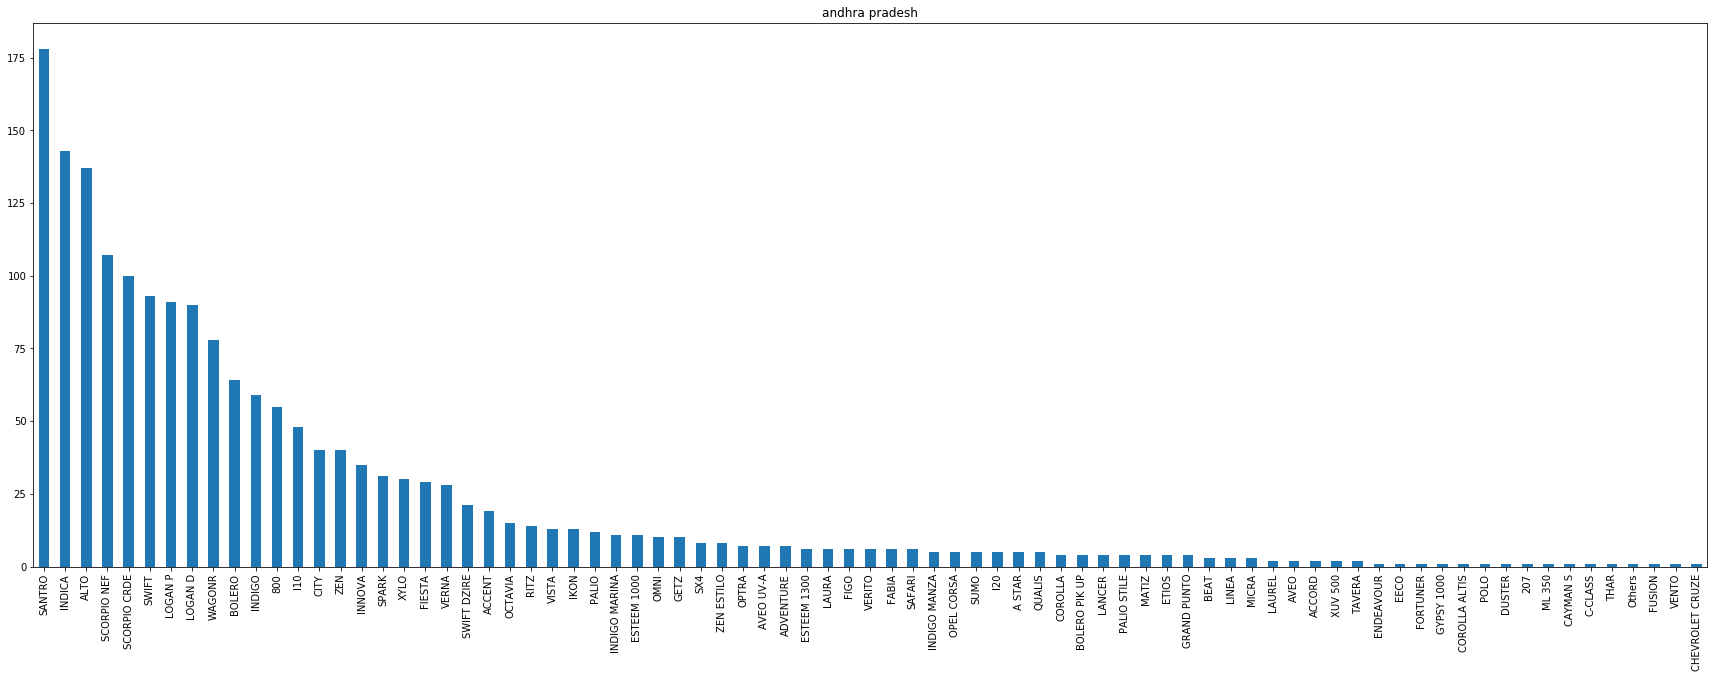

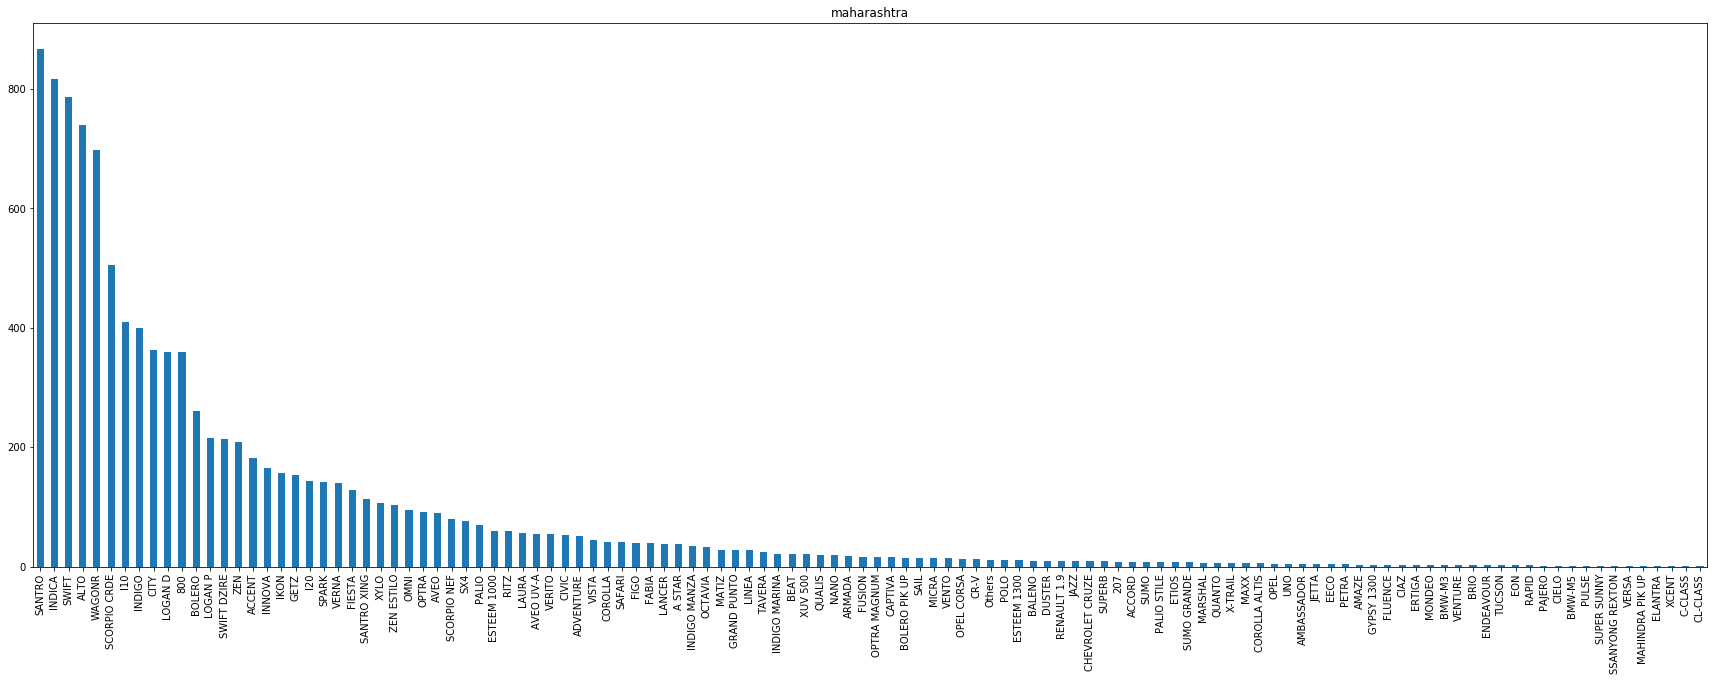

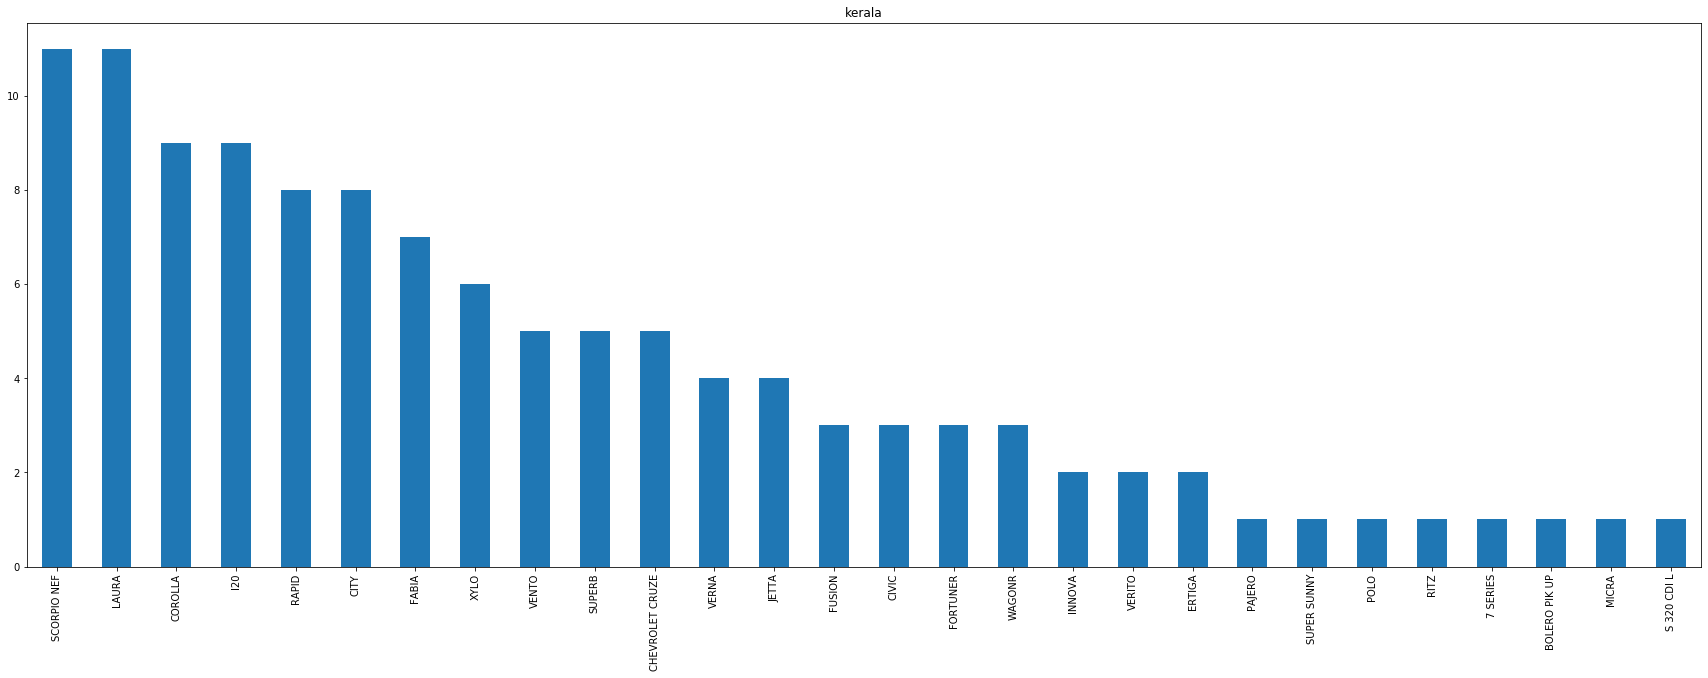

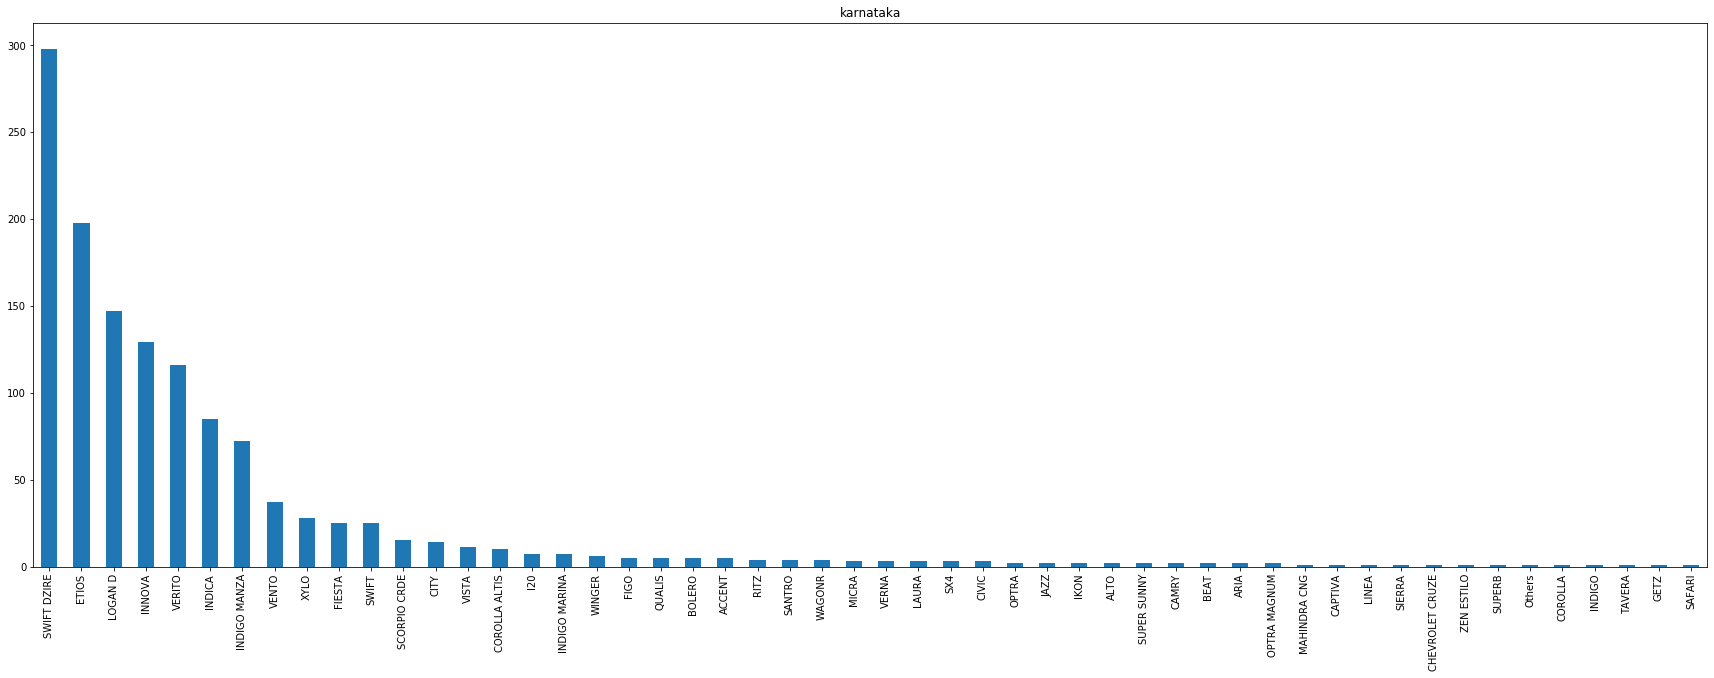

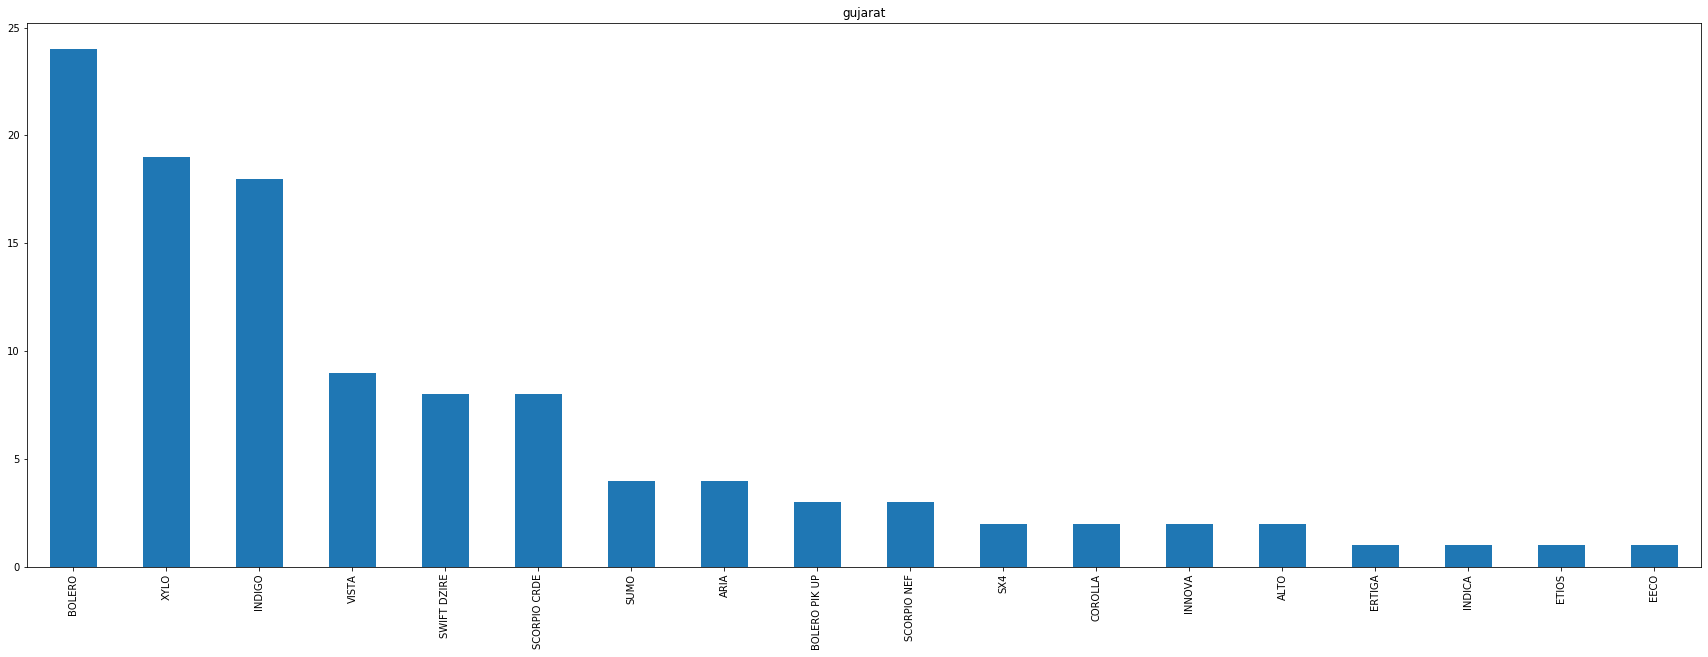

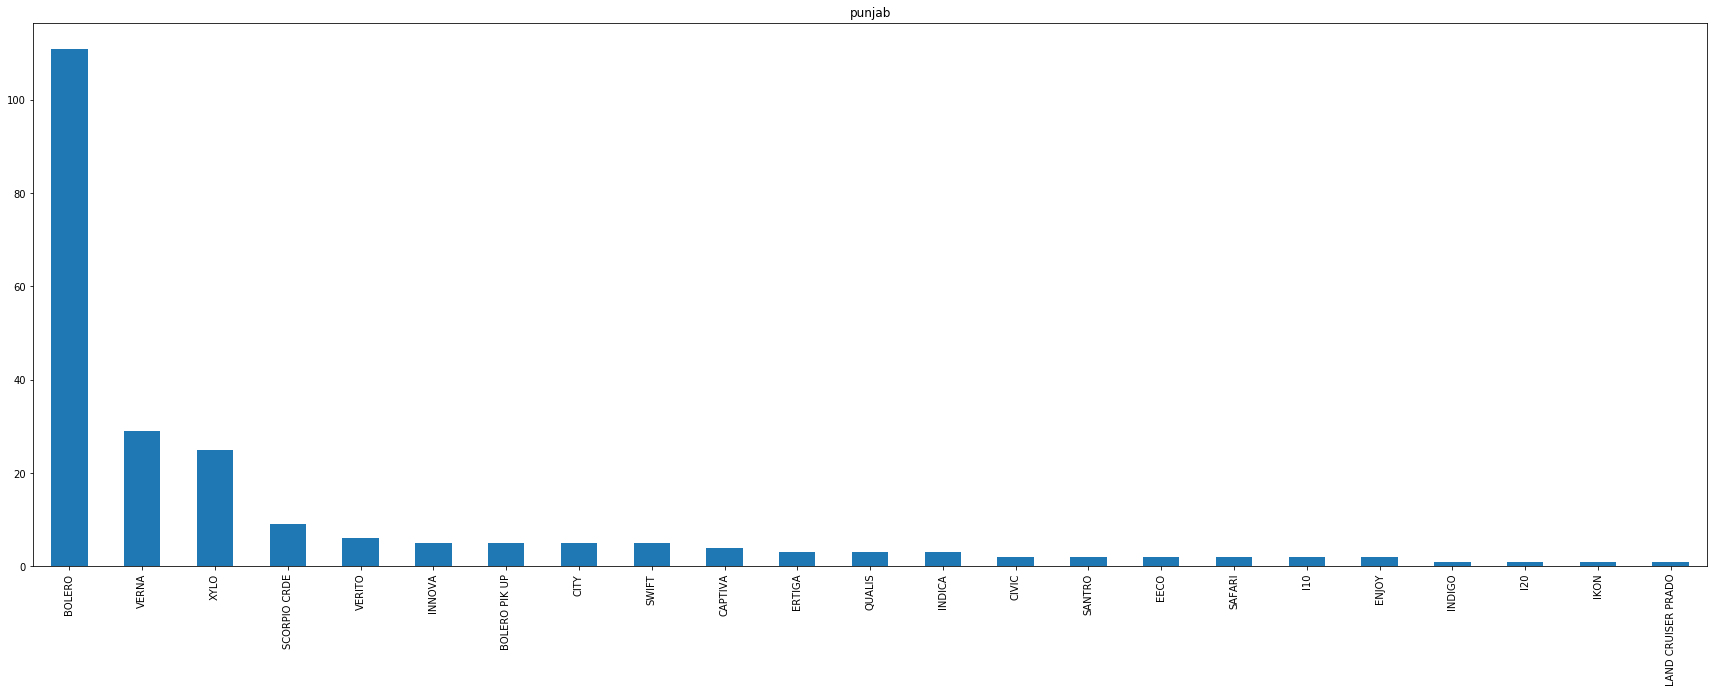

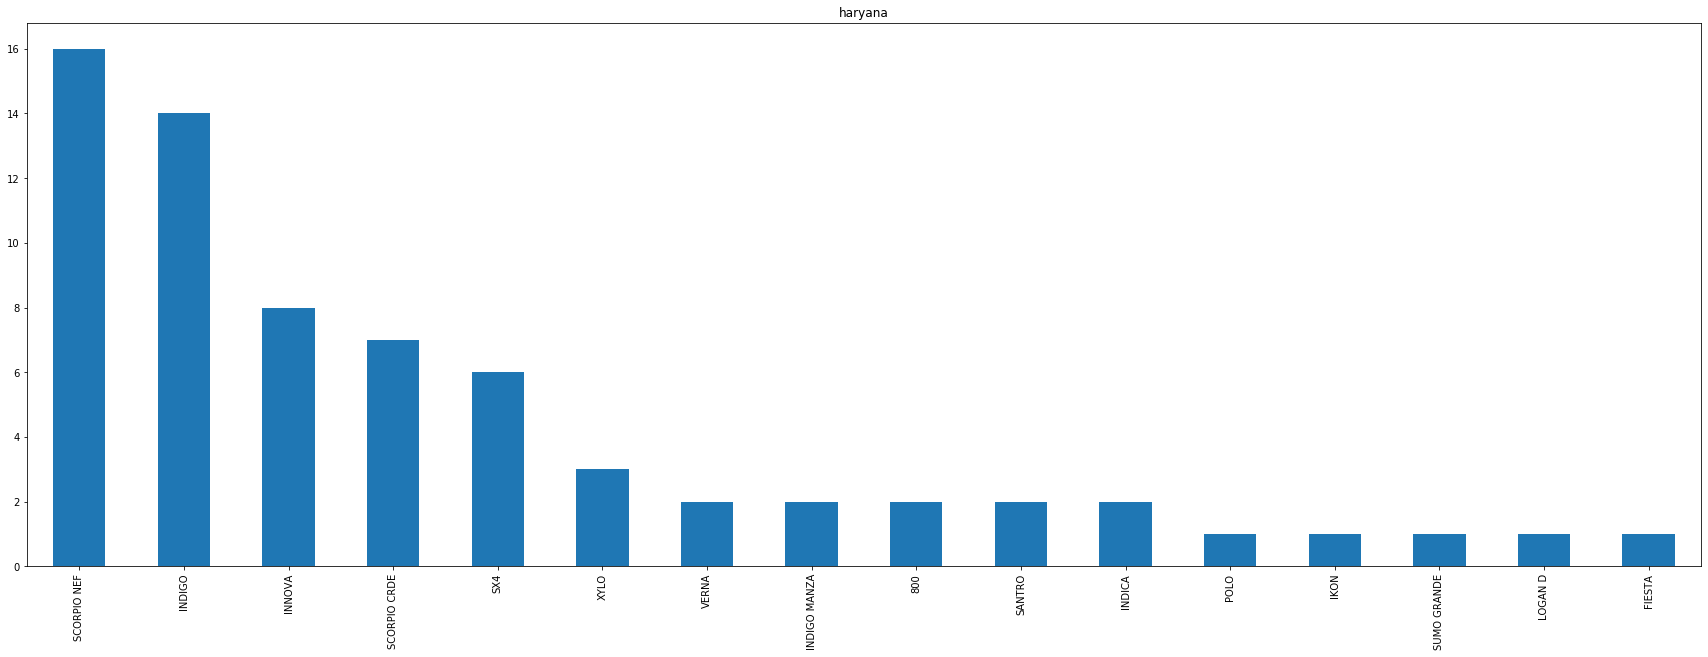

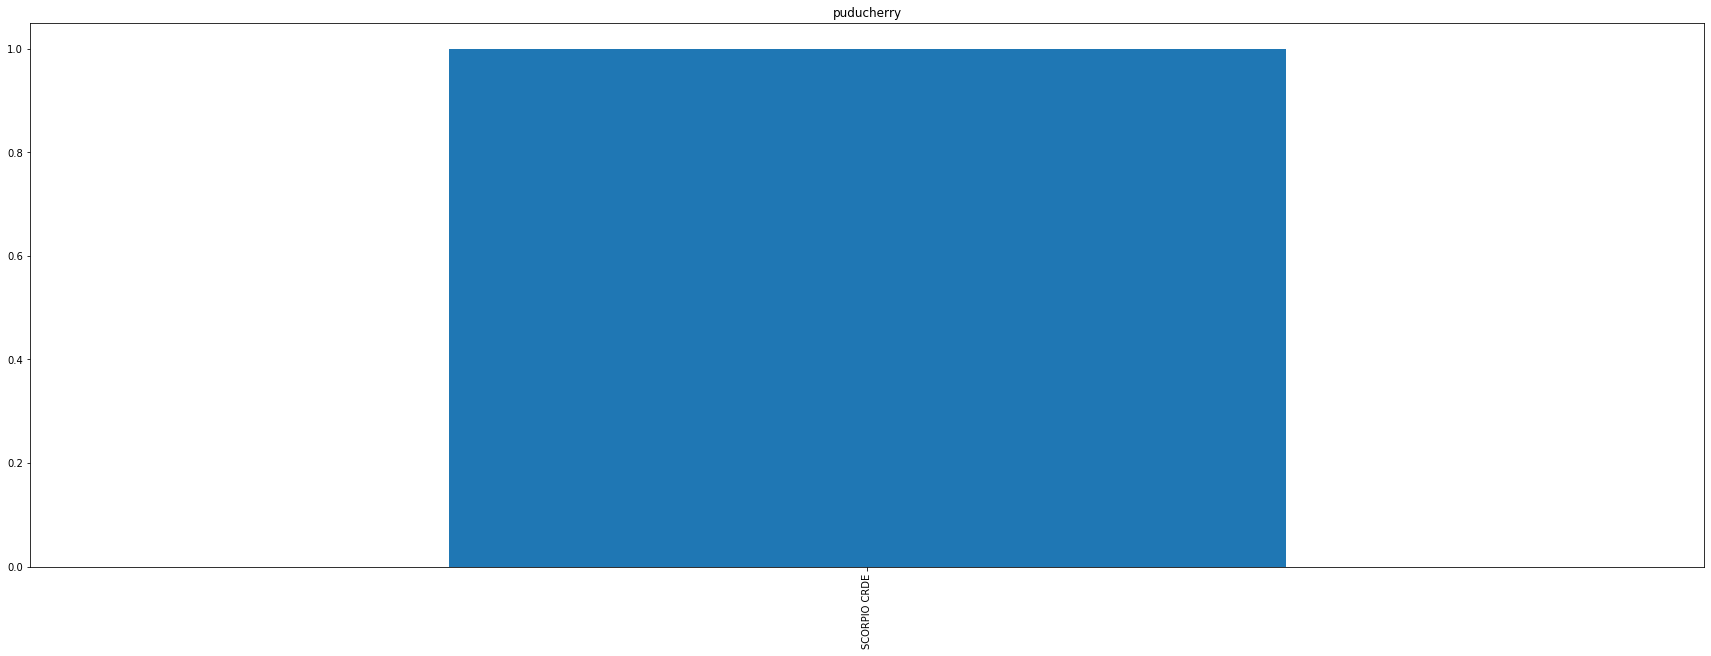

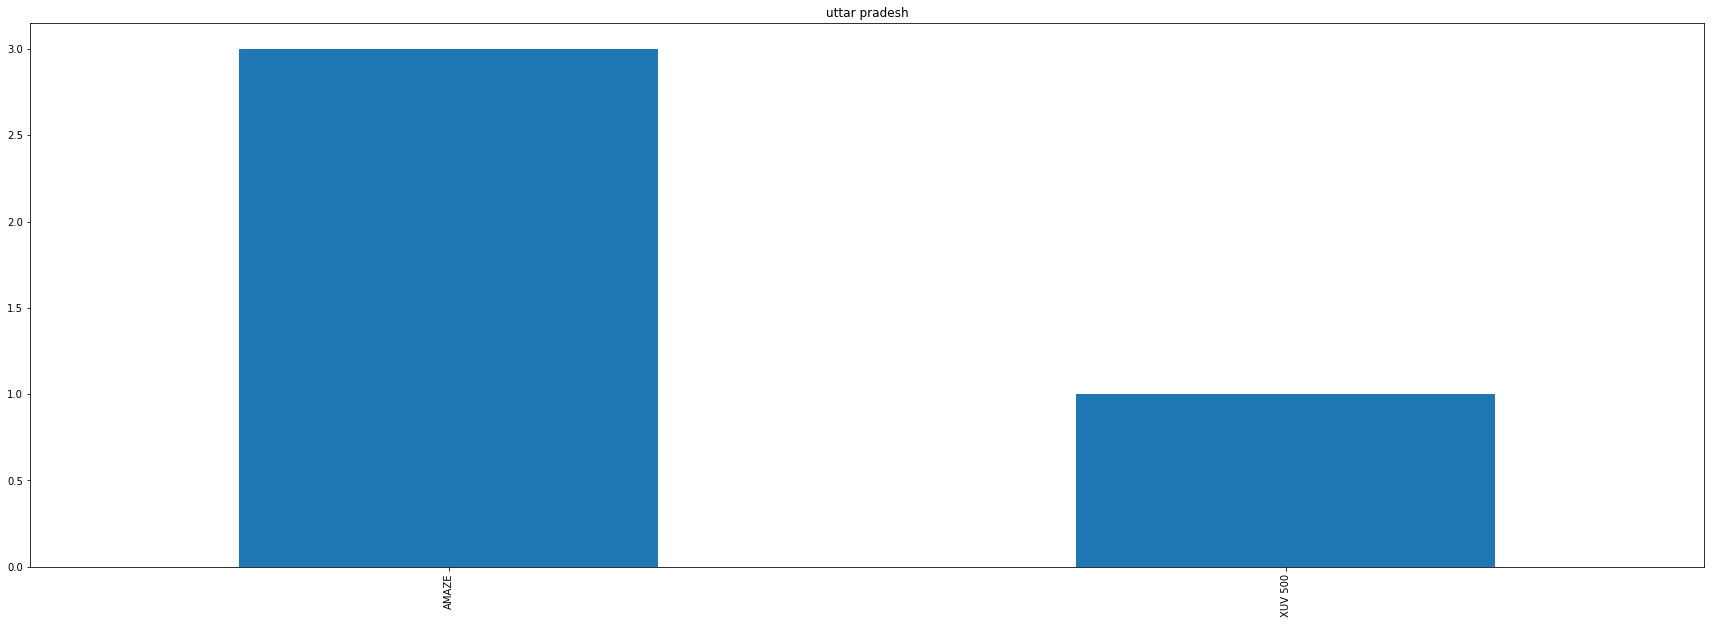

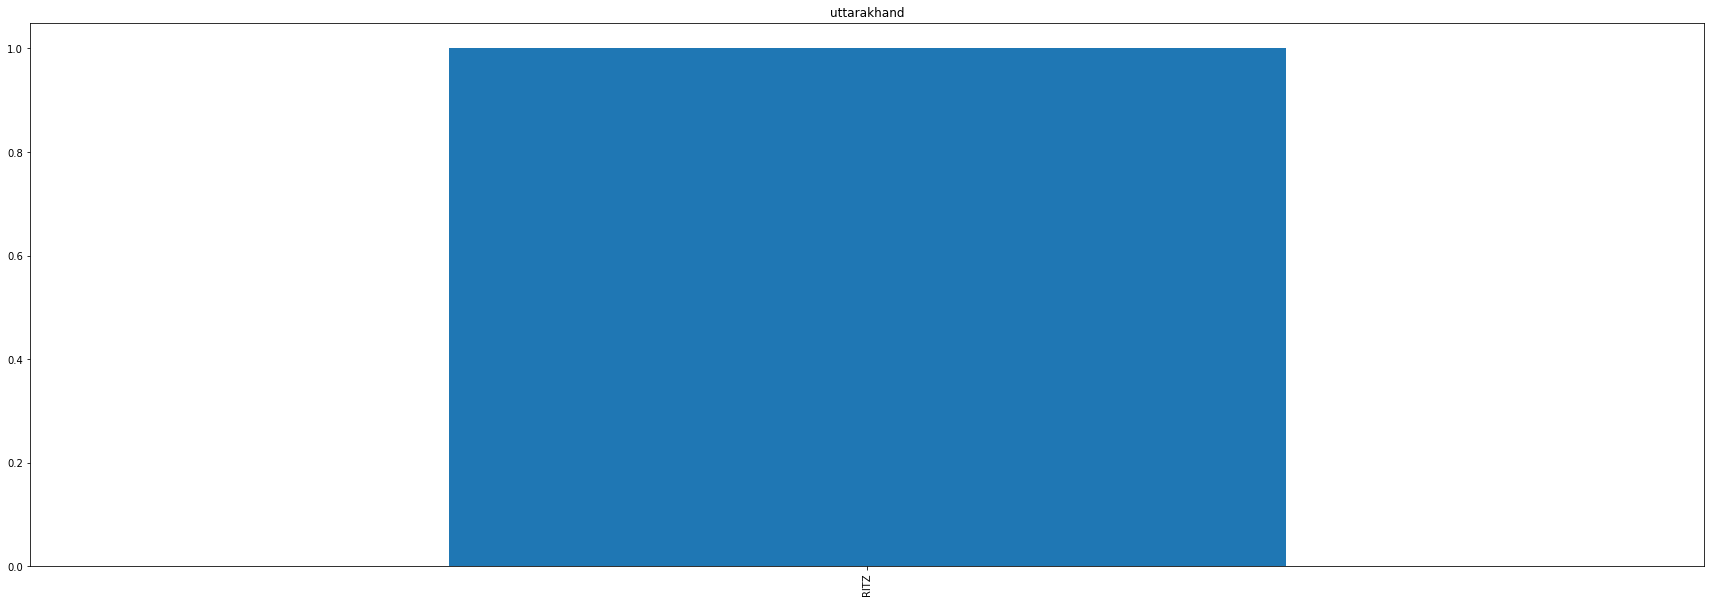

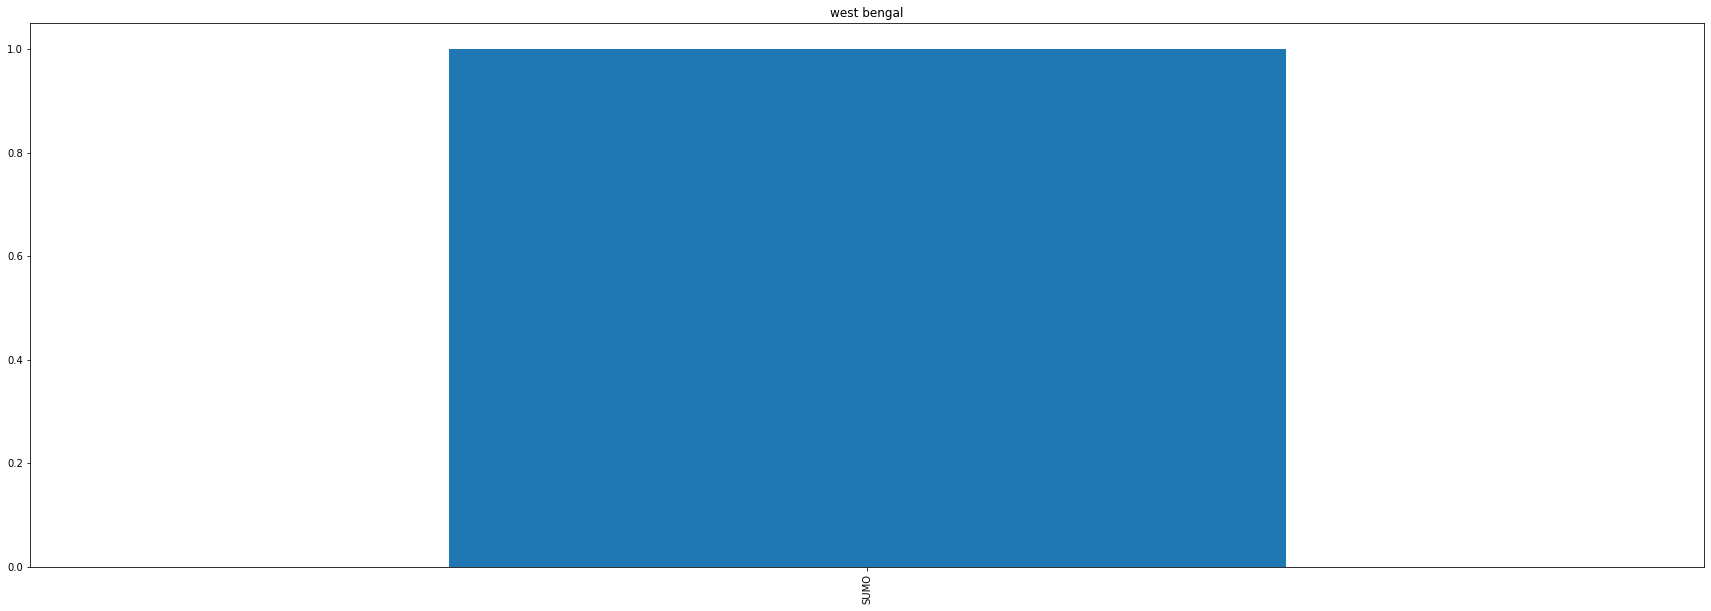

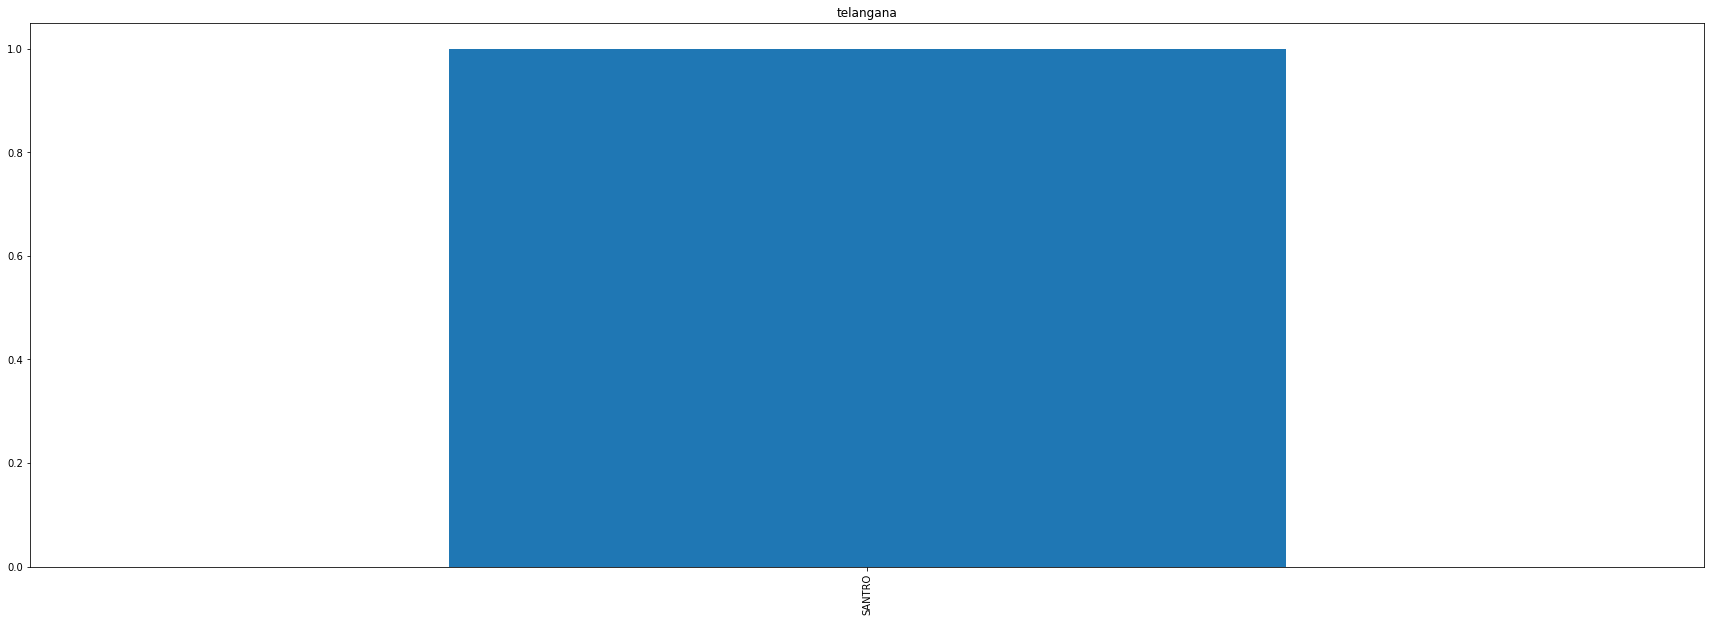

In [32]:
city=[]
city=joint['District'].unique()
for i in city:
    cars=joint[joint['District']==i]
    
    fig=plt.figure(figsize=(30,10))
    plt.title(i)
    cars['Model'].value_counts().plot(kind='bar')
    plt.show()

In [33]:
custinv=pd.merge(customer[['description','occuption','Customer No.','partner']],invoice,on='Customer No.')

In [43]:
custinv['CITY']=custinv['CITY'].apply(lambda x:x.lower())
custinv['CITY'].replace('banglore','bangalore',inplace=True)
custinv['CITY'].replace('hydrabad','hyderabad',inplace=True)
custinv['CITY'].replace('nasik','nashik',inplace=True)
custinv['CITY'].replace('mulund','thane',inplace=True)
custinv['CITY'].replace('new panvel','navi mumbai',inplace=True)
custinv['CITY'].replace('panvel','navi mumbai',inplace=True)

In [42]:
#city=custinv['CITY'].unique()
#city=[x.lower() for x in city] 


a=['thane','bangalore','pune','hydrabad','surat','nashik']
for i in custinv['CITY']:
    for j in a:
      if(i.find(j))!= -1:
        custinv['CITY'].replace(i,j,inplace=True)   
print(custinv['CITY'].unique())


['chengalpattu' 'hyderabad' 'thane' 'chennai' 'secunderabad' 'mumbai'
 'navi mumbai' 'cochin' 'bangalore' 'gujarat' 'hydrabad' 'pune' 'ludhiana'
 'rajkot' 'nashik' 'surat' 'kochi' 'silvasa' 'vapi' 'valsad' 'chandigarth'
 'mohali' 'haryana' 'kothrud' 'panvel' 'ratnagiri' 'turicorin' 'nagpur'
 'chalisgaon' 'daman' 'silvassa' 'pratapgarh' 'tiruvallur' 'kumbakonam'
 'cbe' 'kolhapur' 'chatrapur' 'chetput' 'tiruvannamalai' 'kalyan' 'dhule'
 'coimbatore' 'thergaon,' 'nandurbar' 'pondicherry' 'chittlapakkam'
 'kanchipuram' 'guindy' 'delhi' 'ranipet' 'ahmednagar' 'kancheepuram'
 'sanapada' 'nagercoil' 'firozabad' 'kottayam' 'ambattur' 'kashipur'
 'jalpaiguri' 'barshi' 'meerut' 'nizamabad']


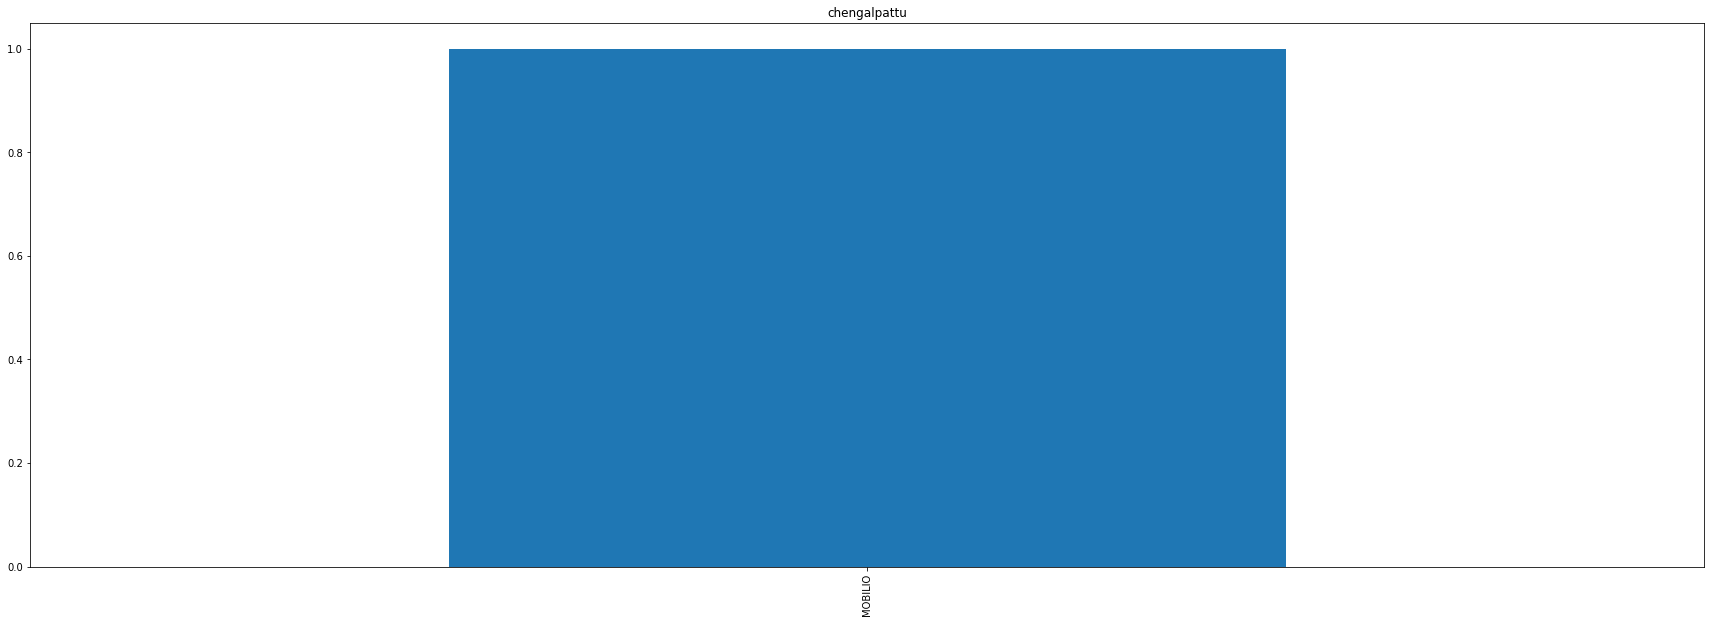

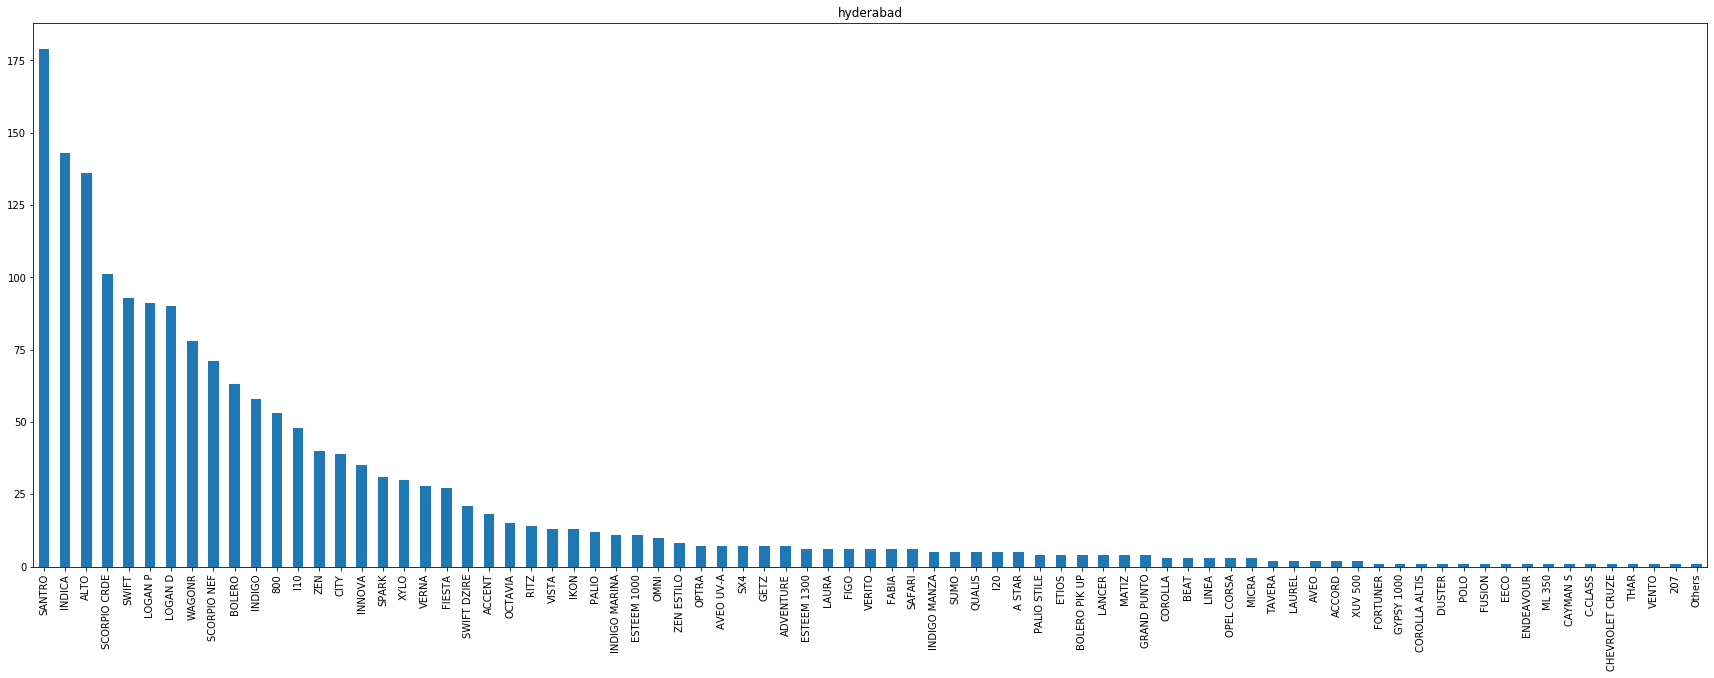

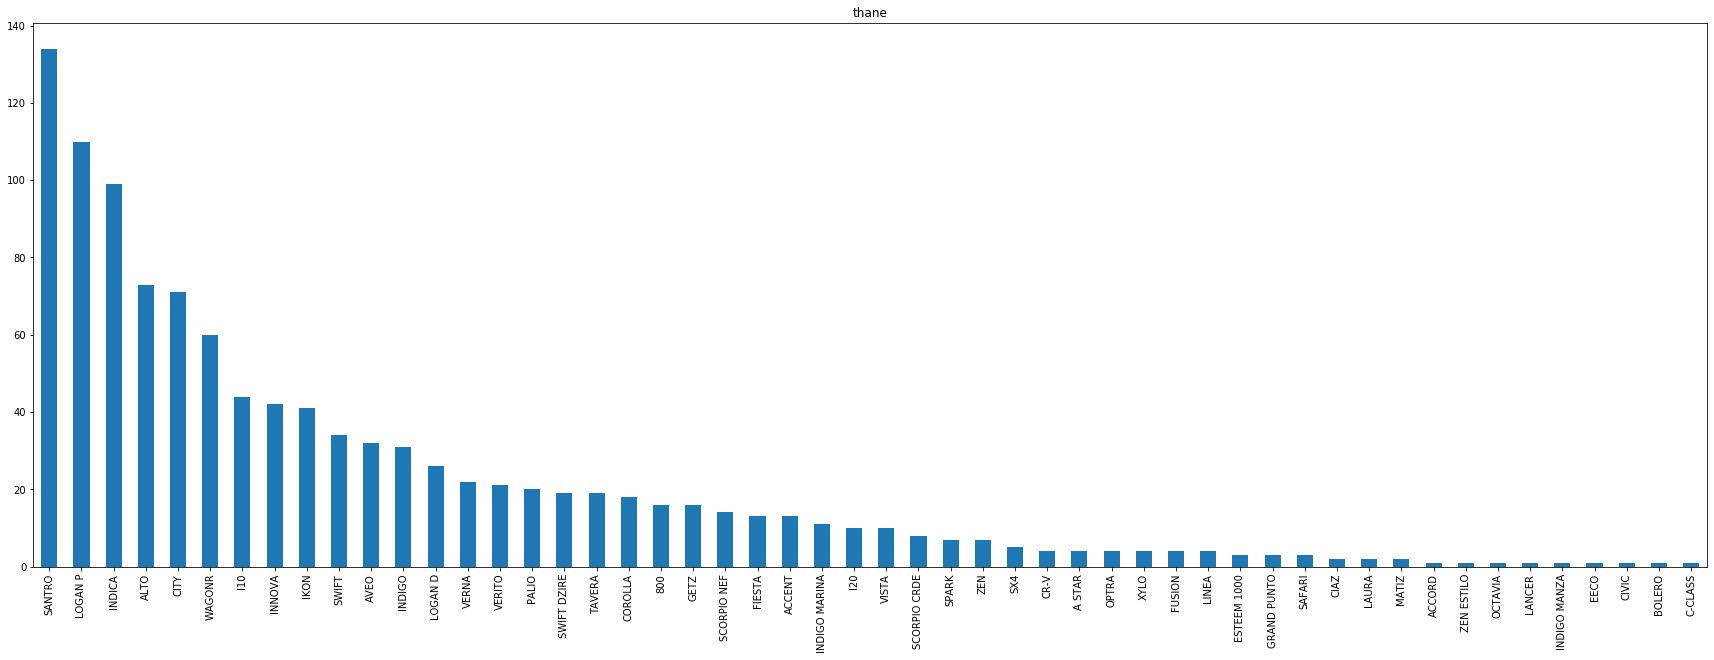

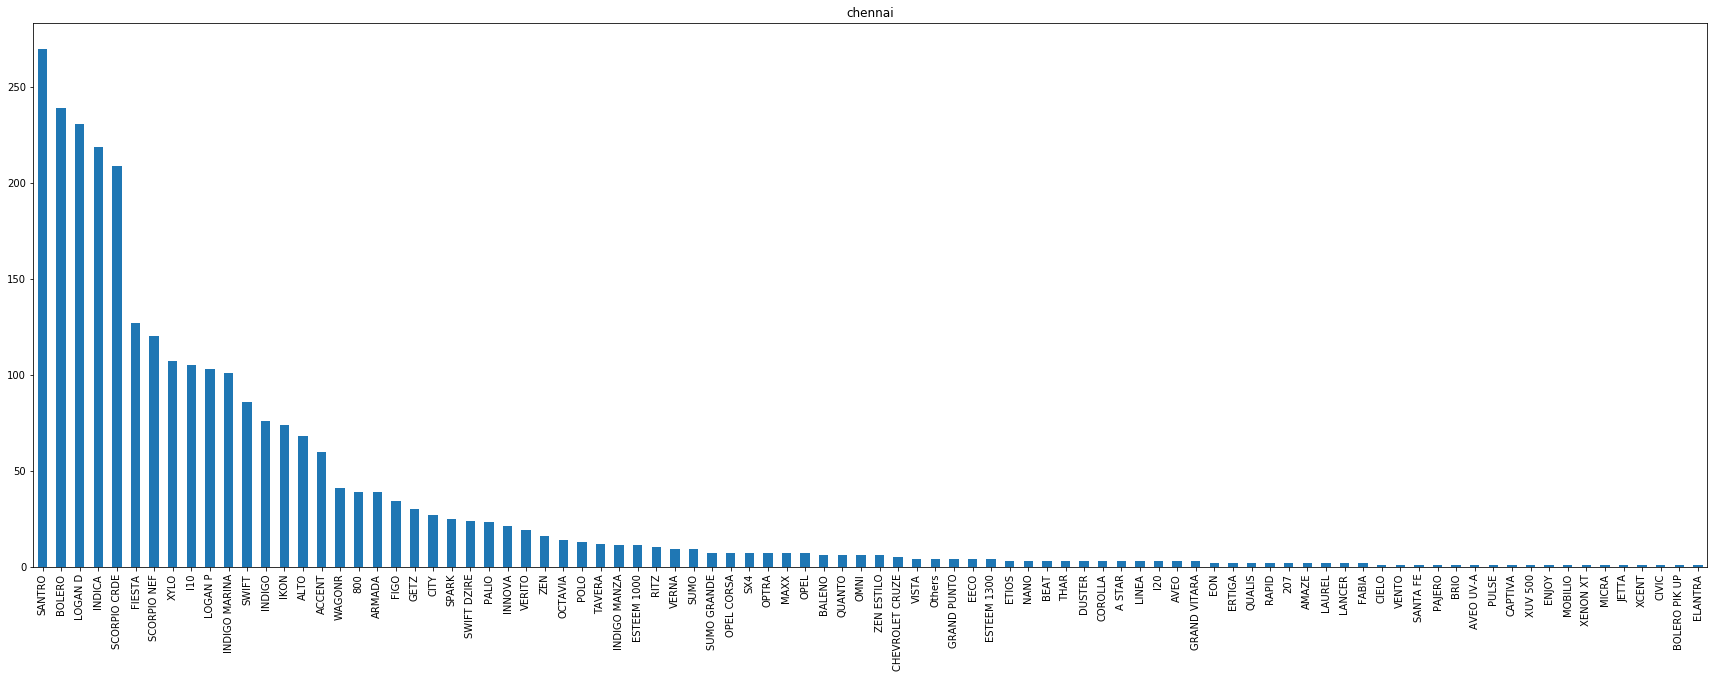

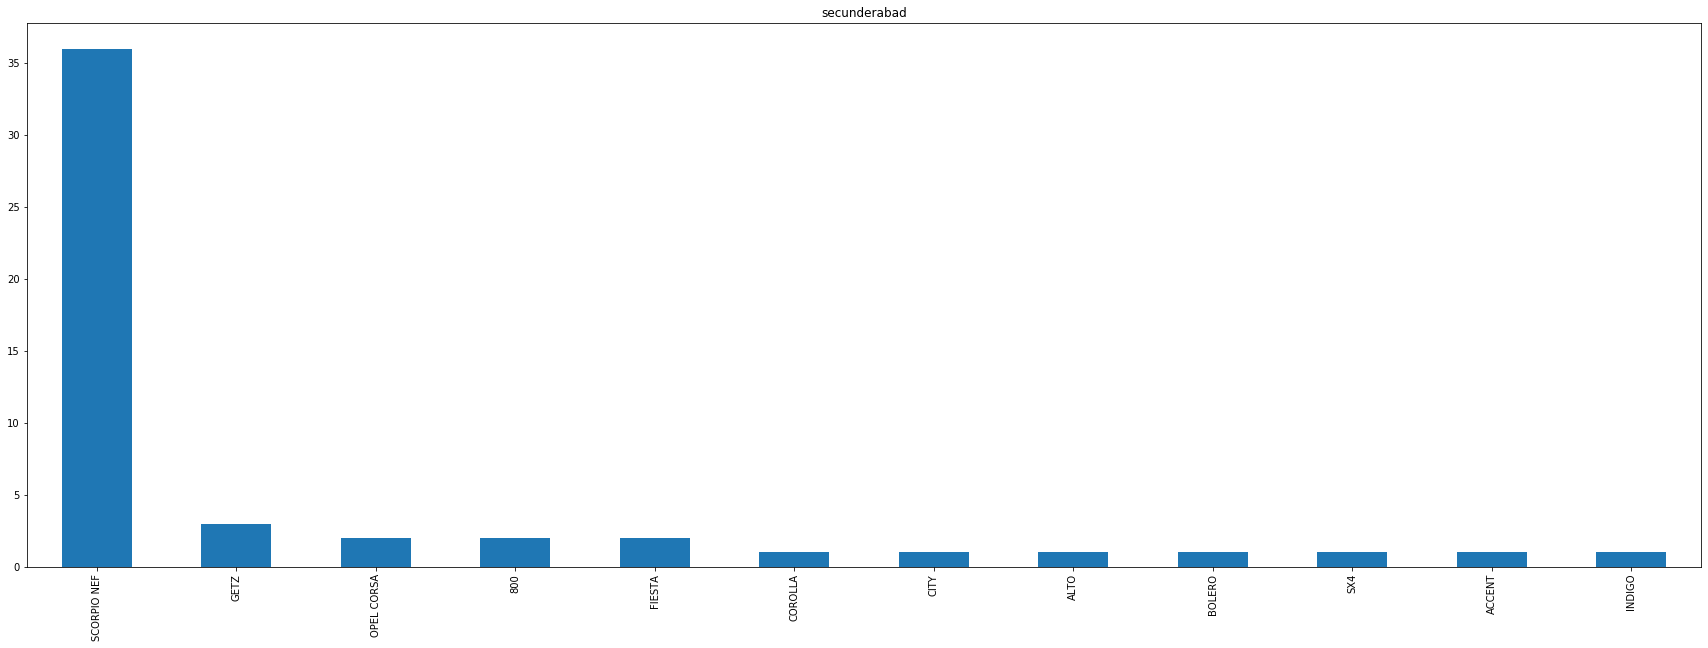

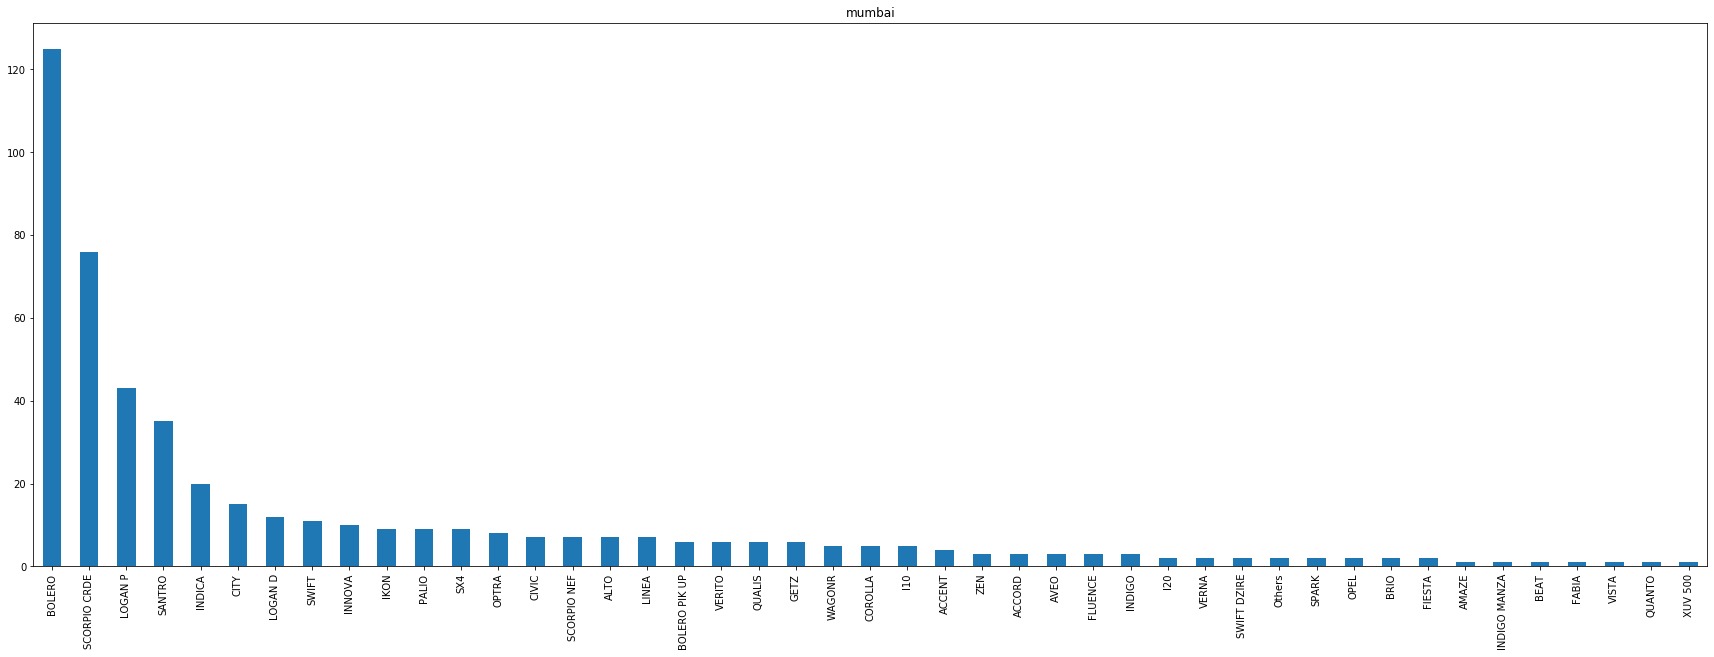

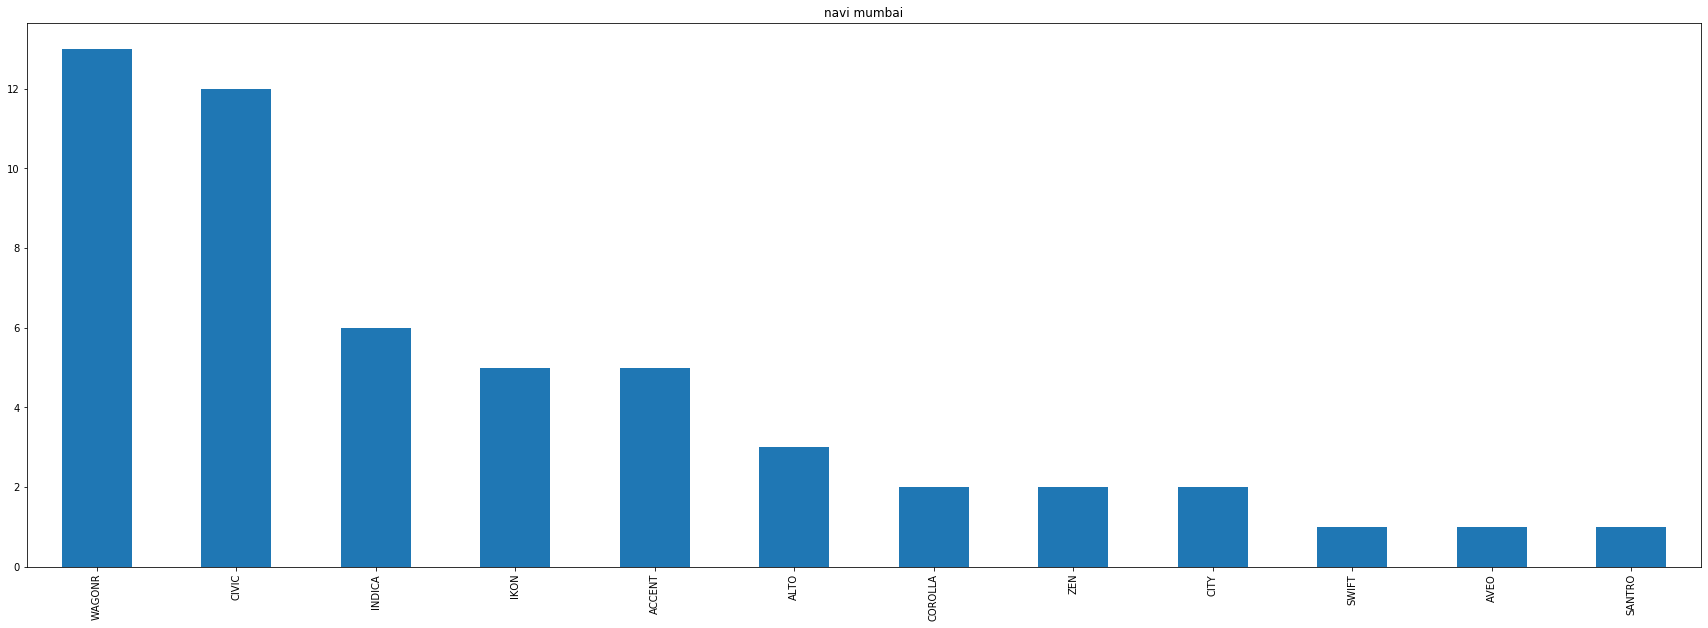

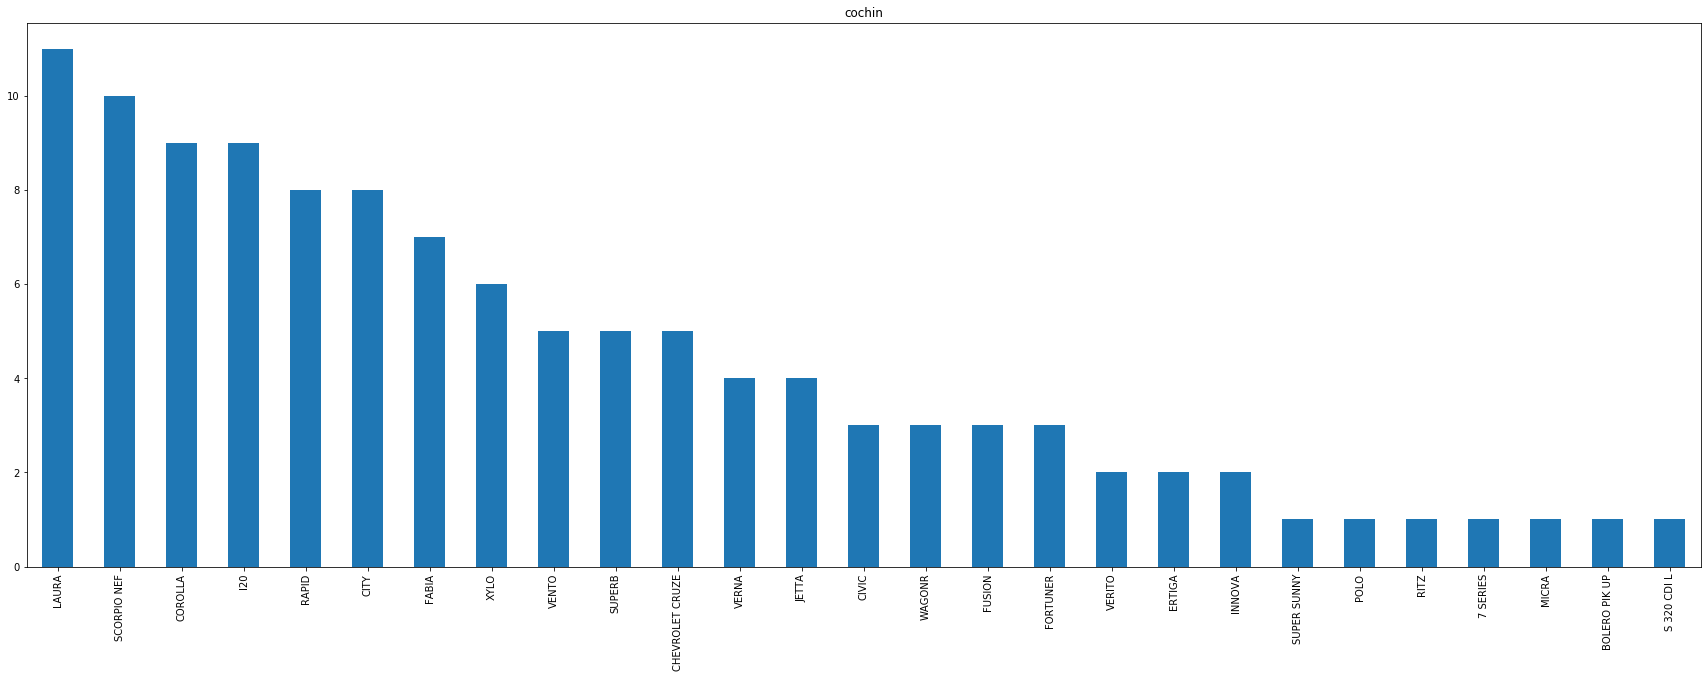

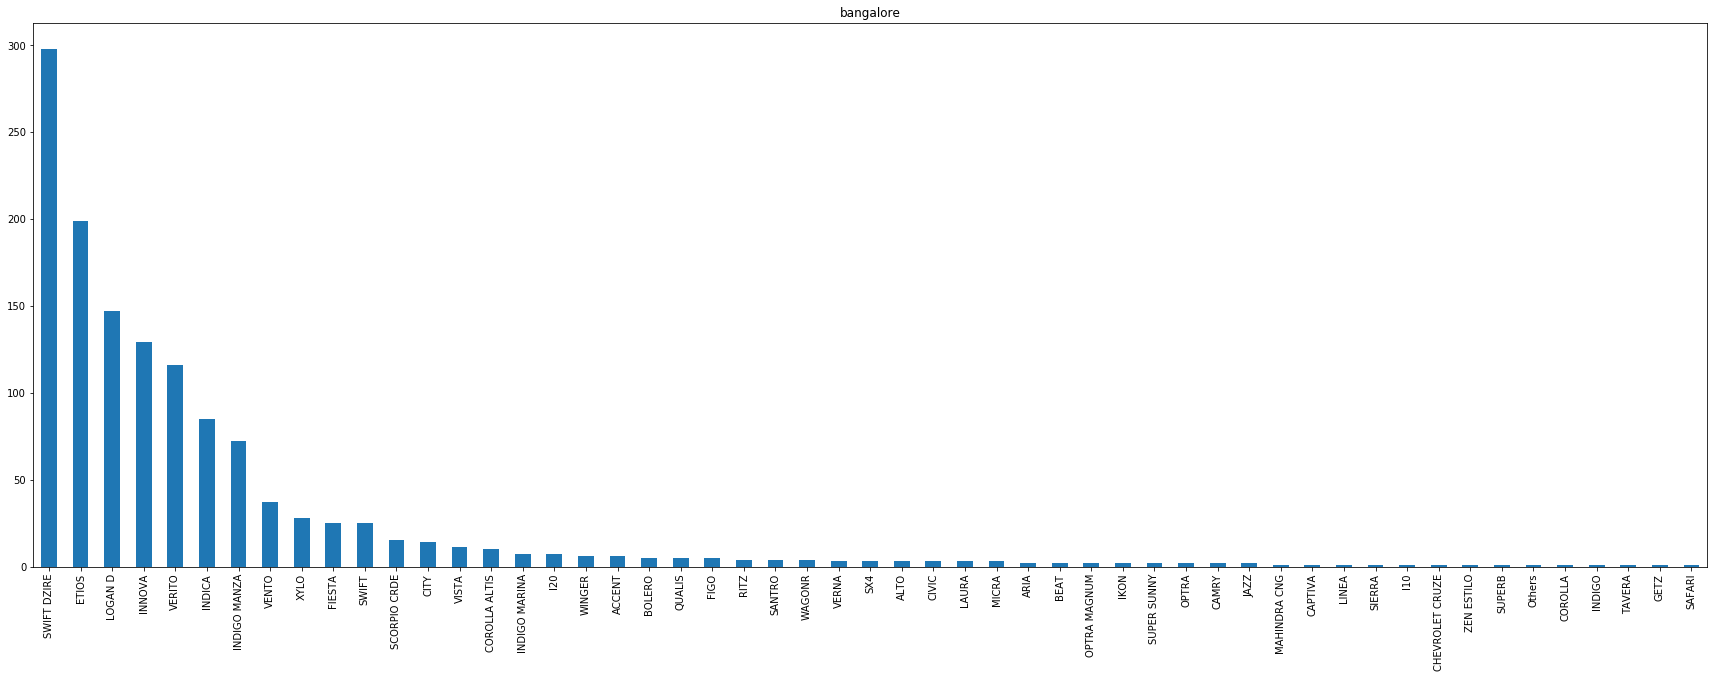

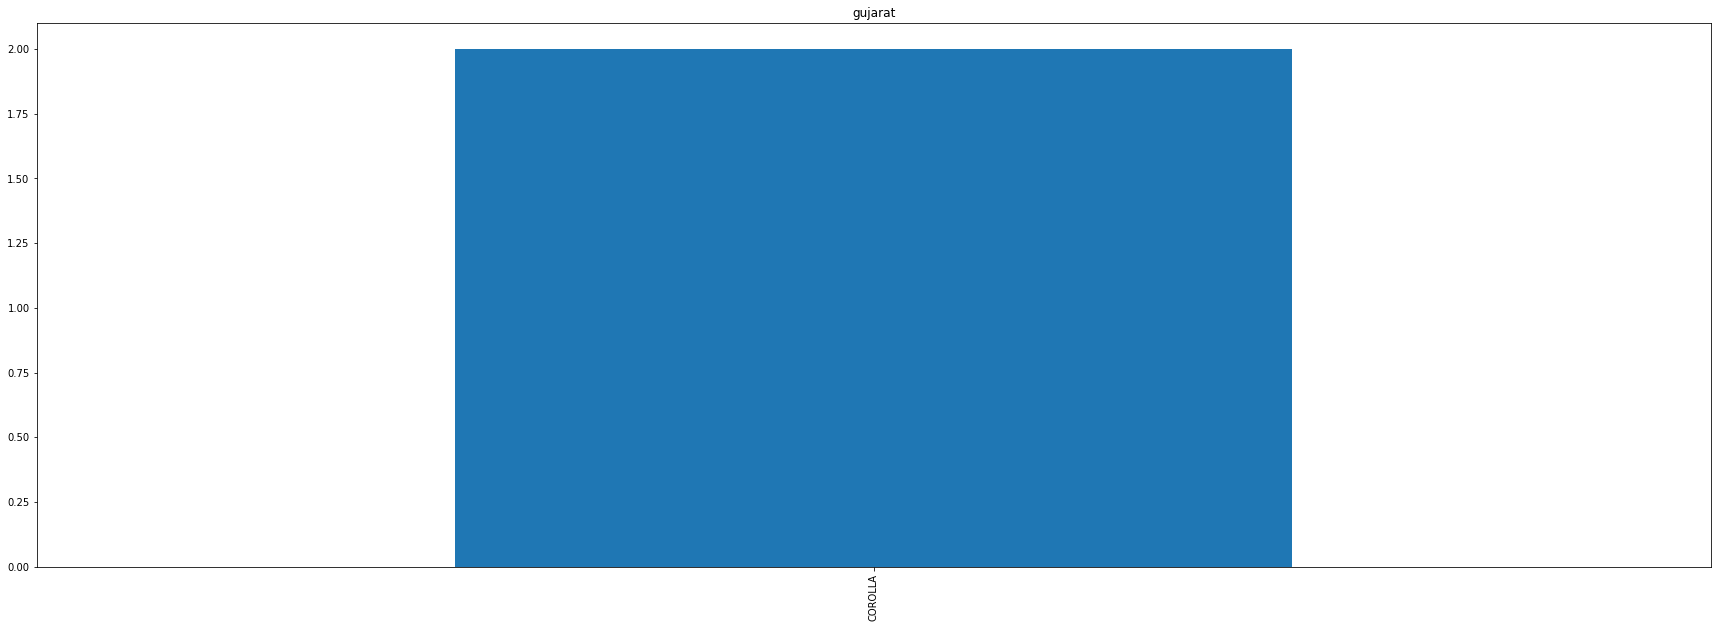

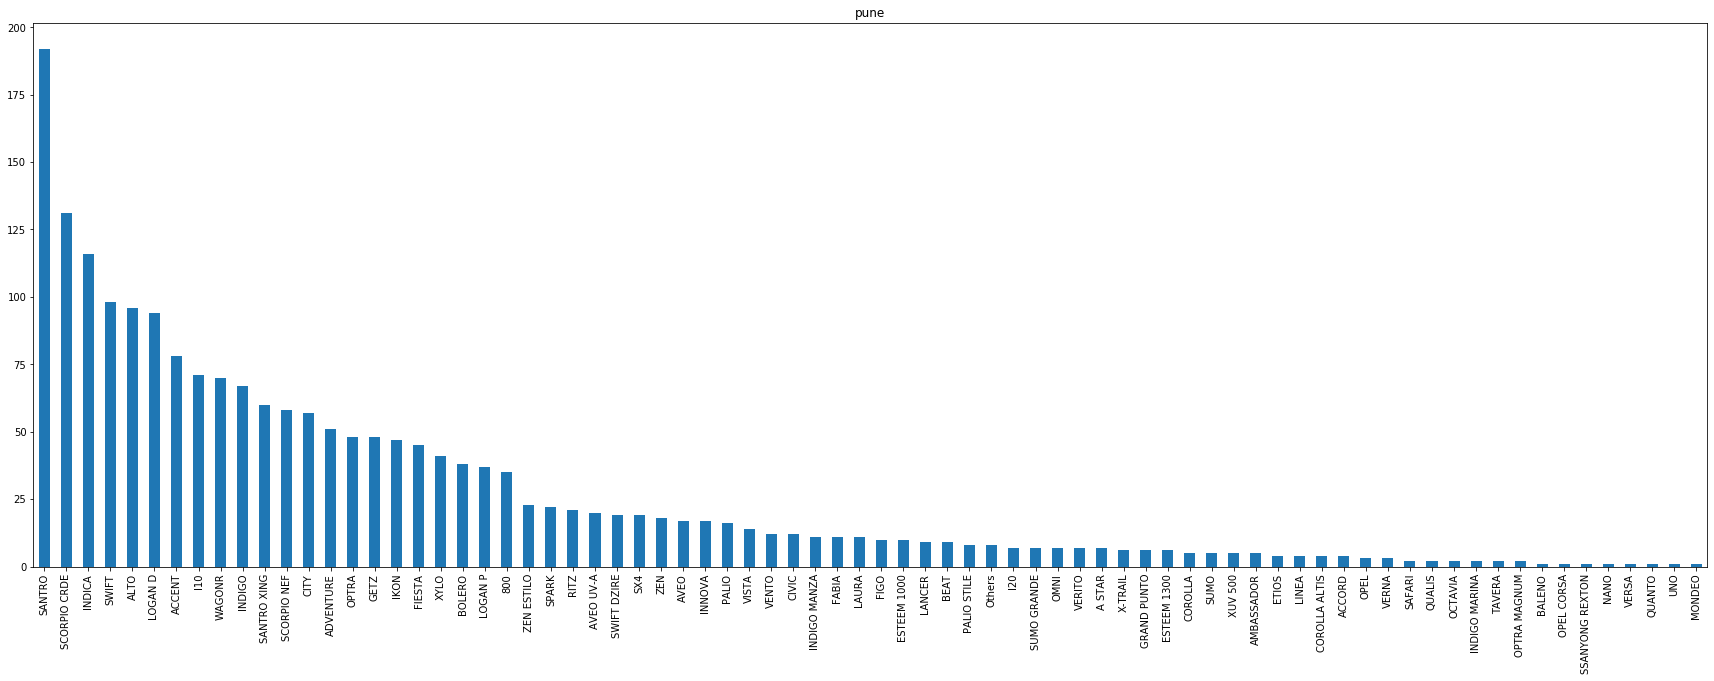

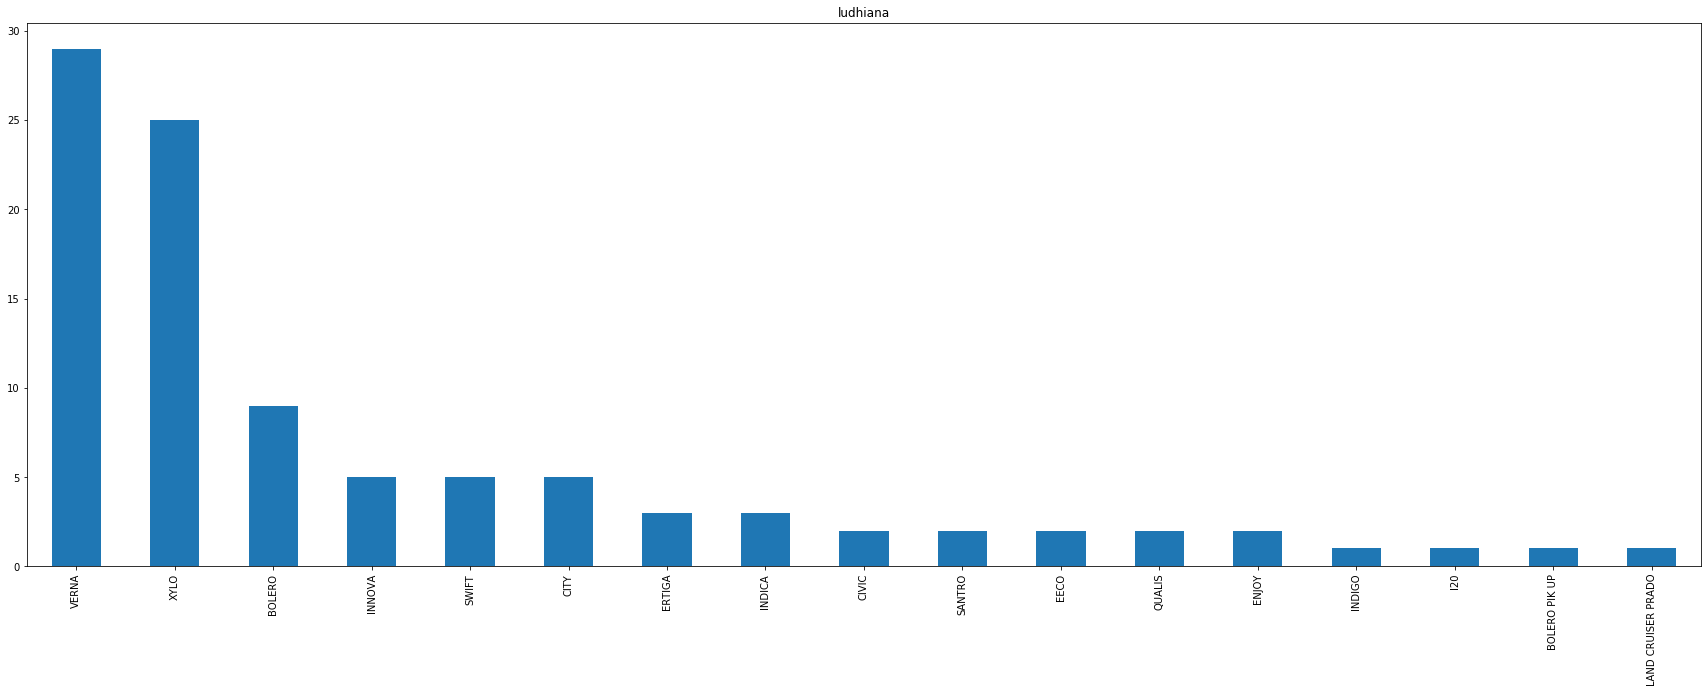

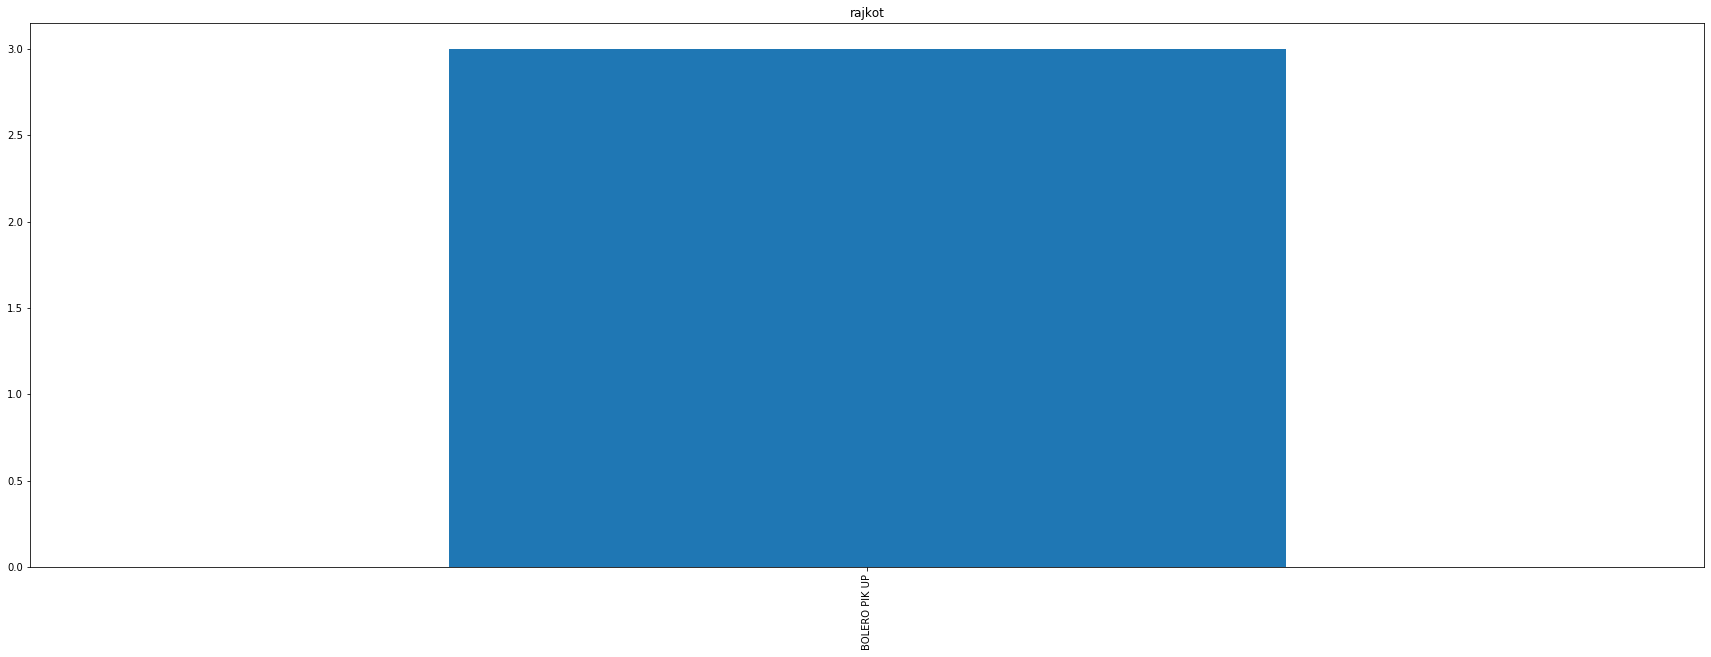

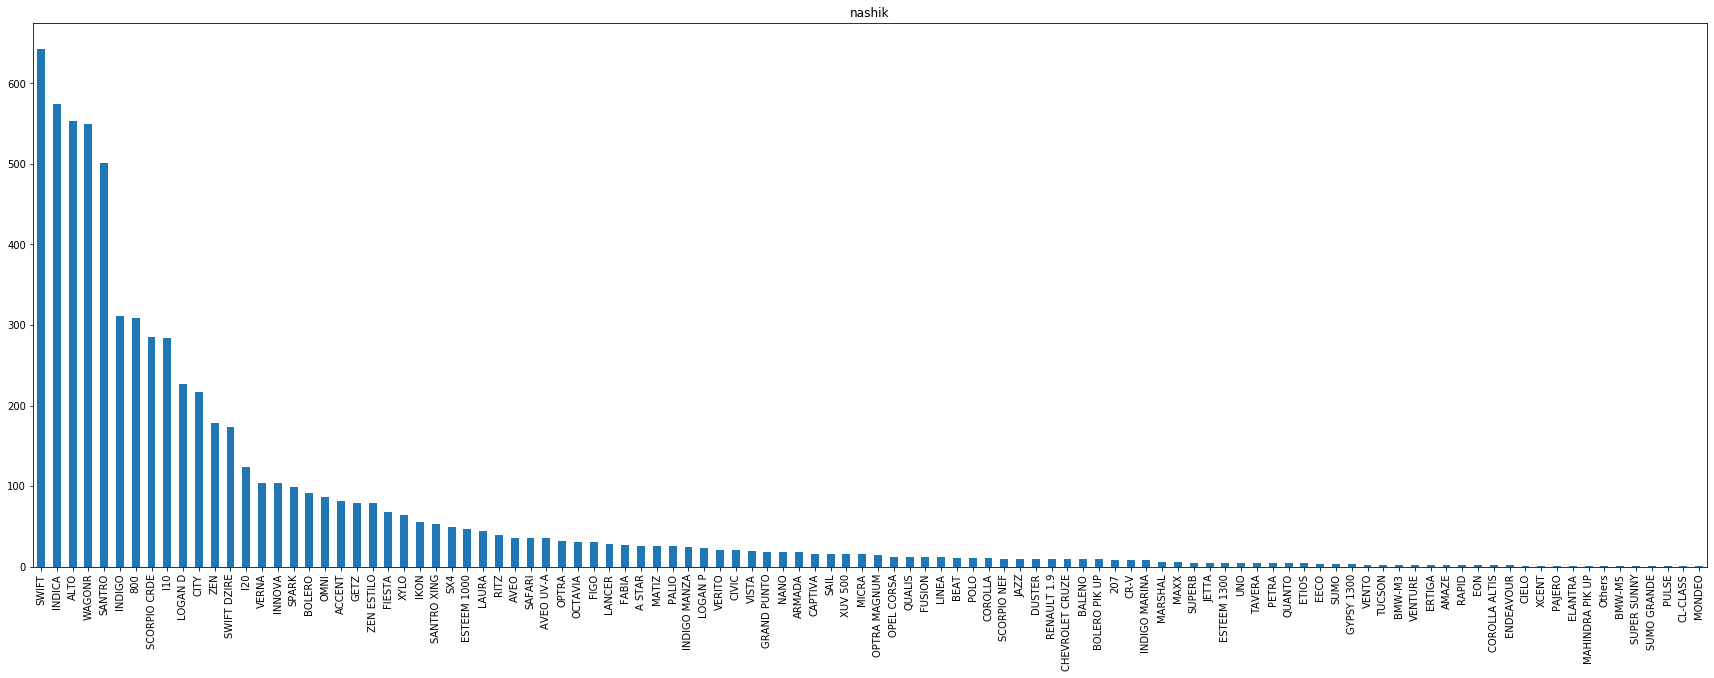

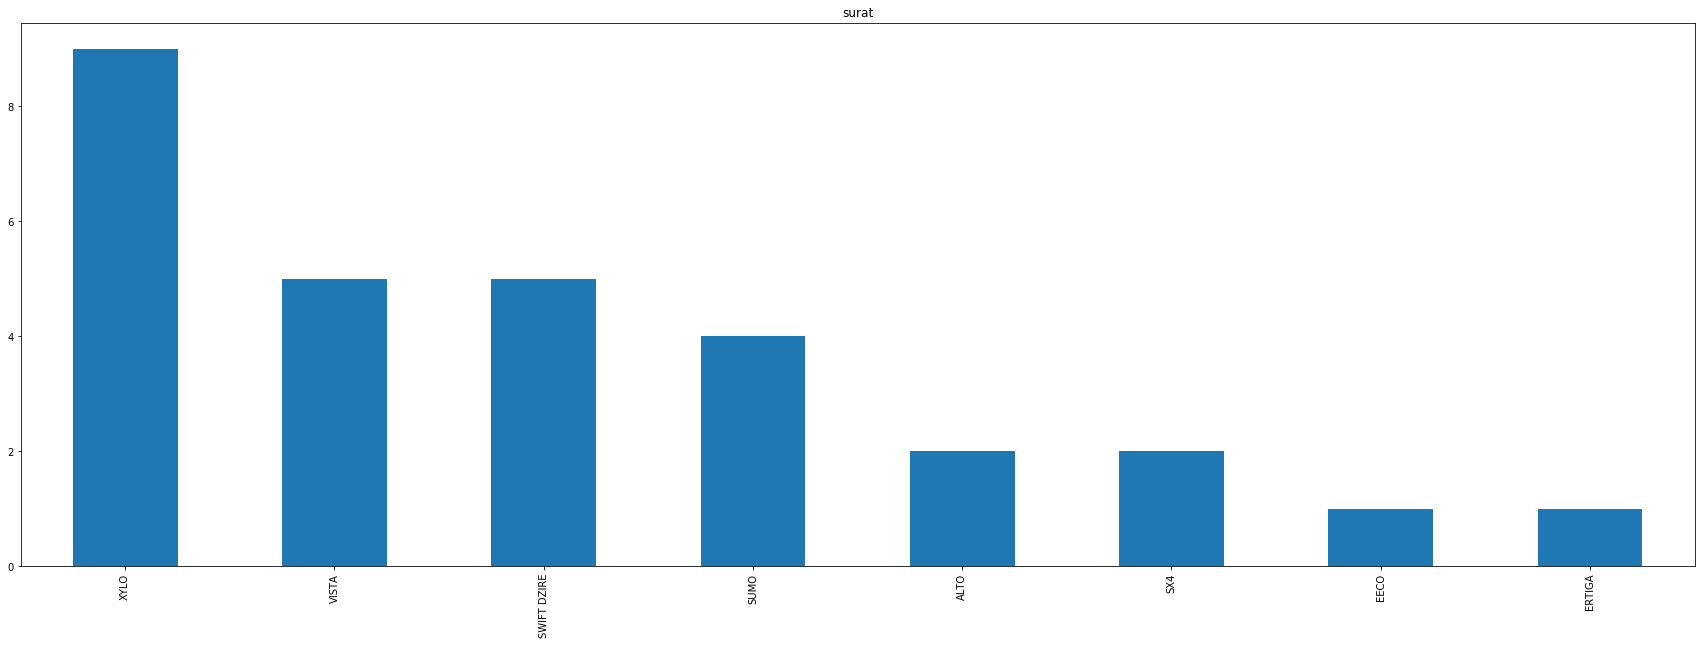

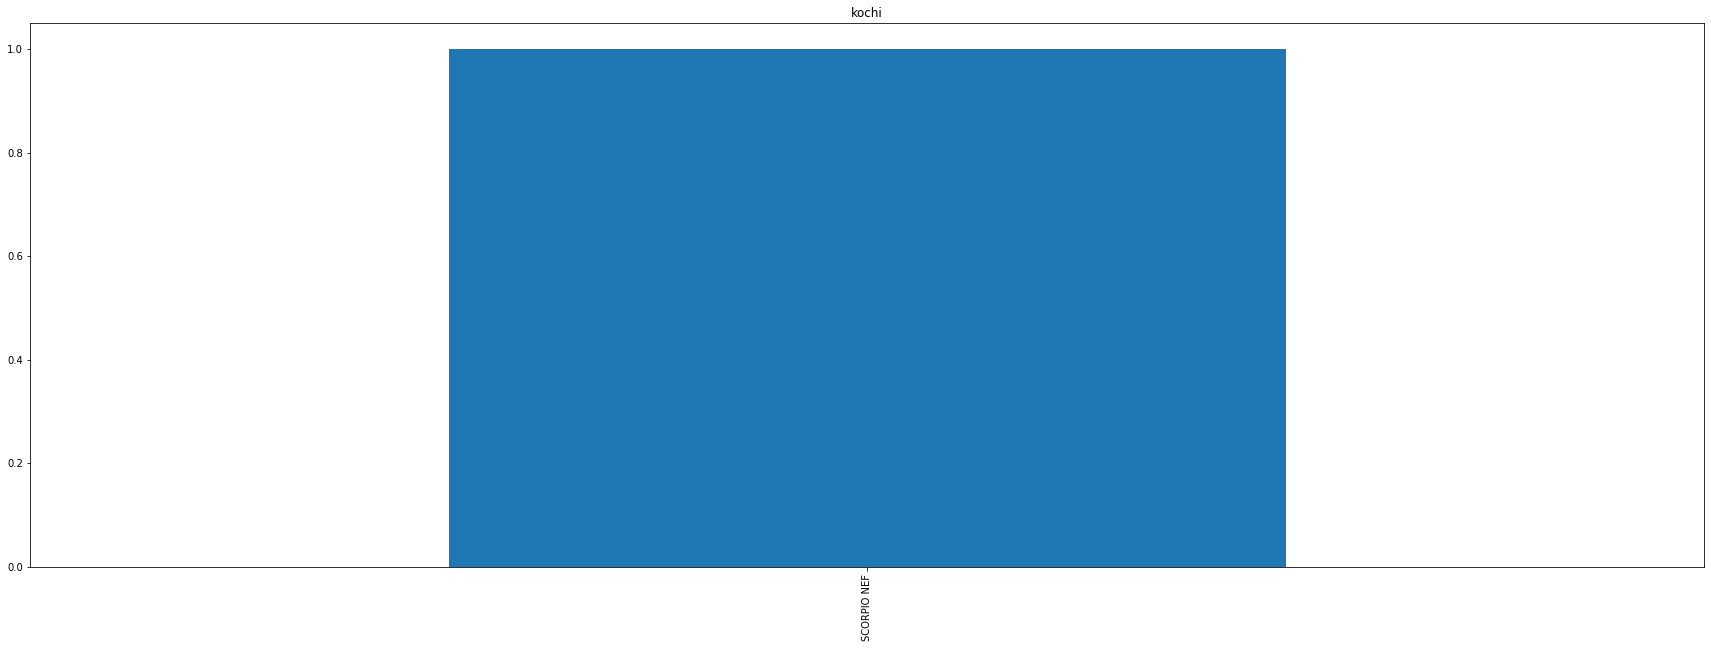

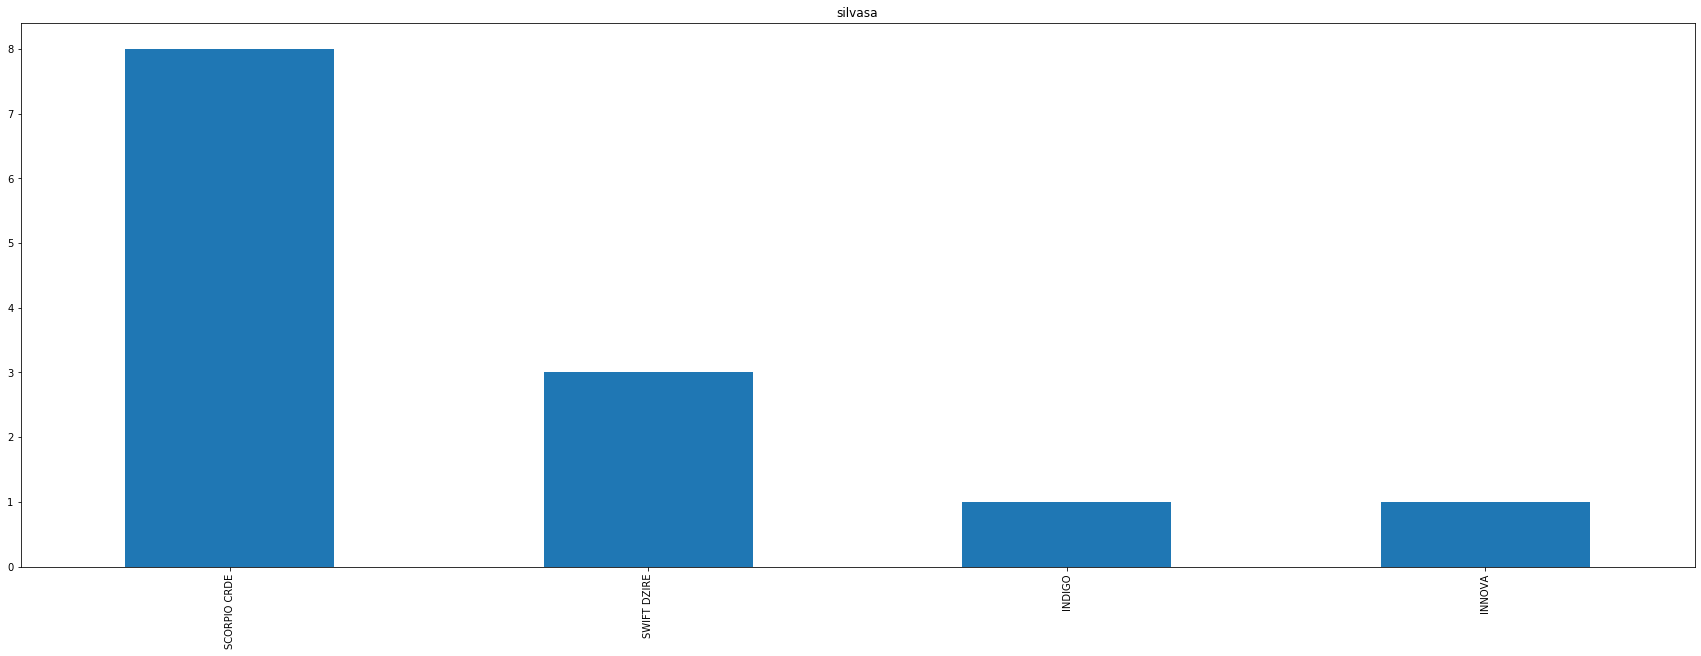

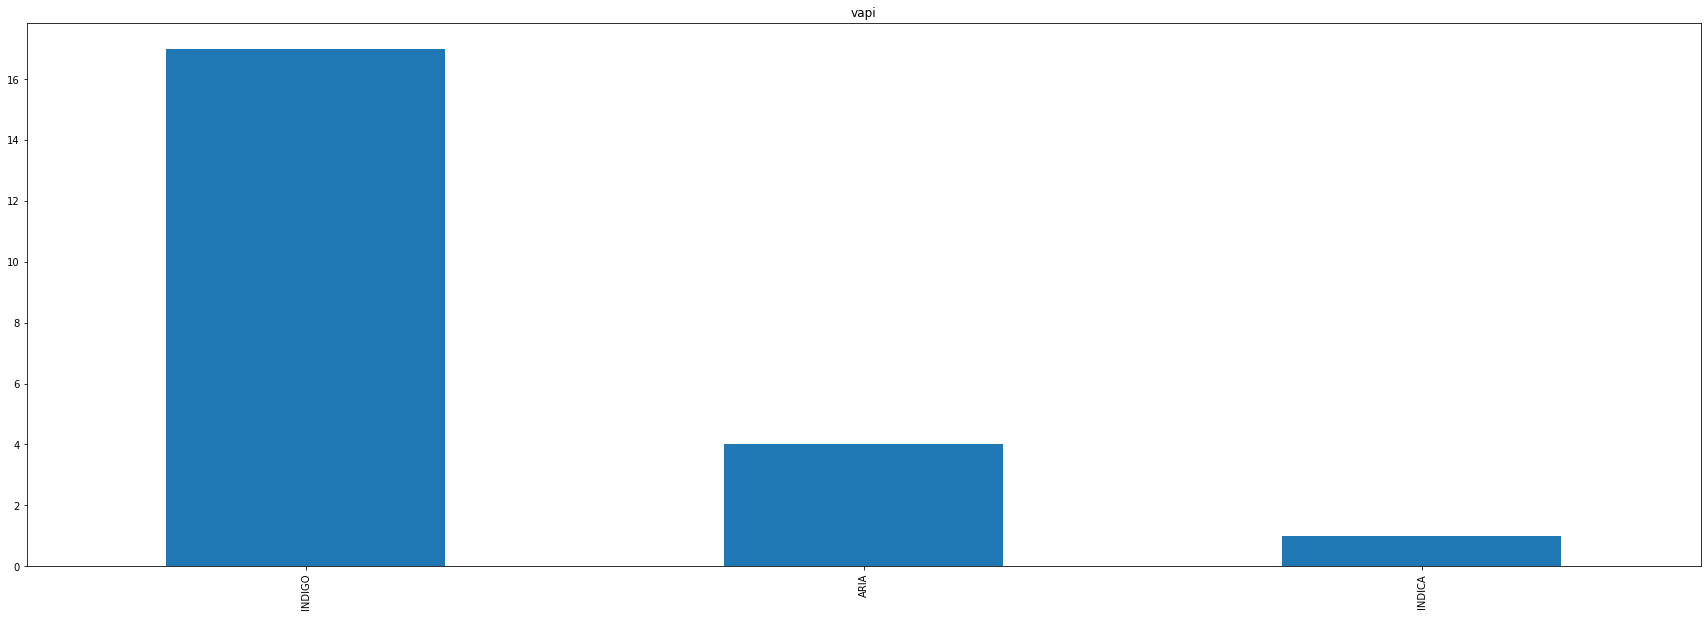

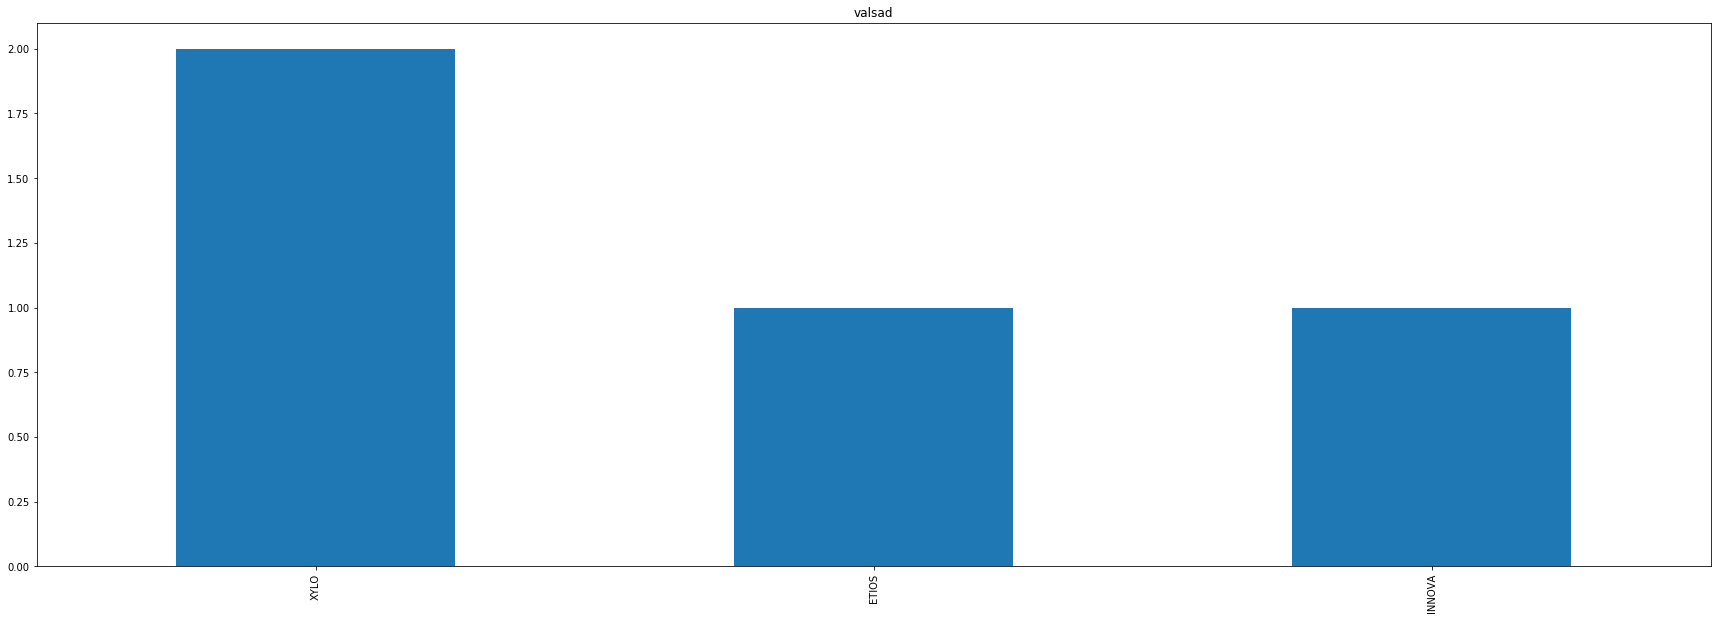

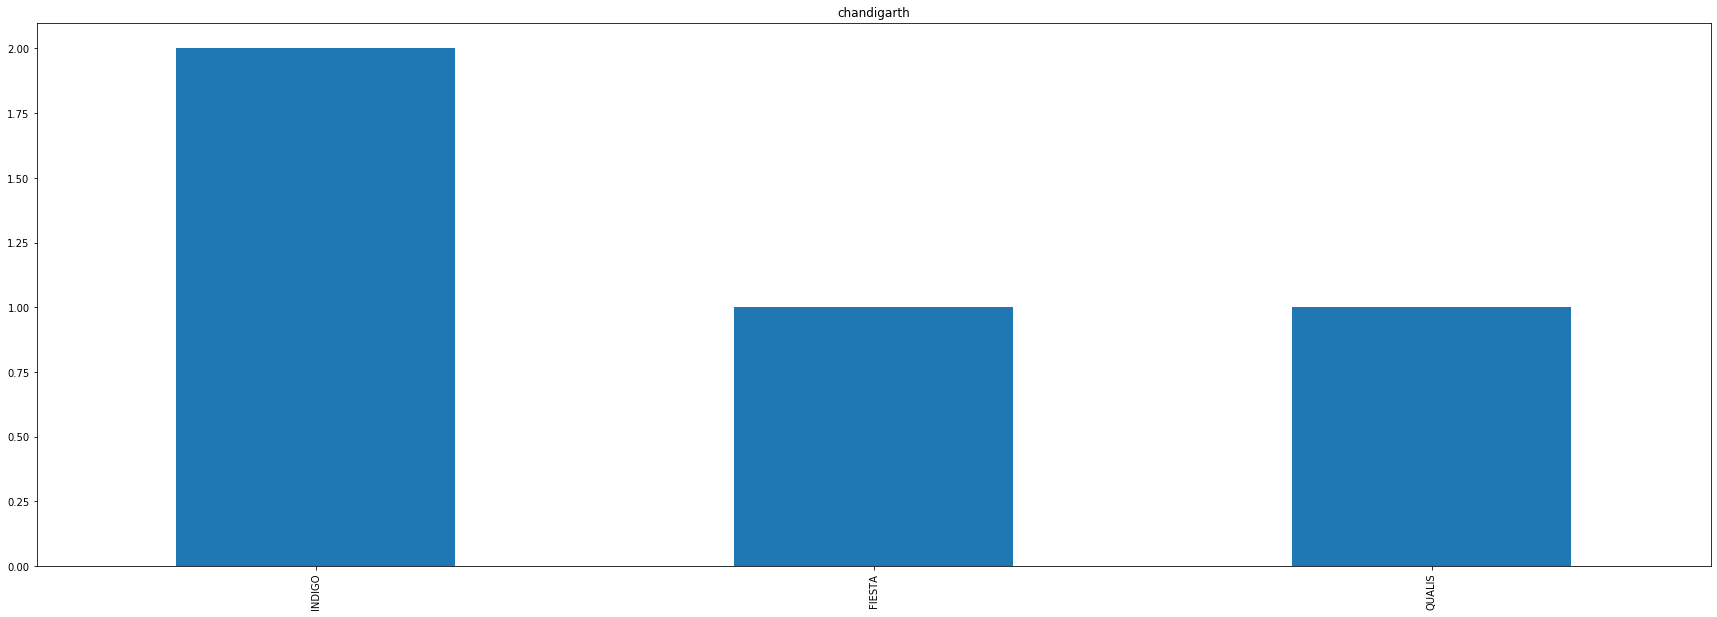

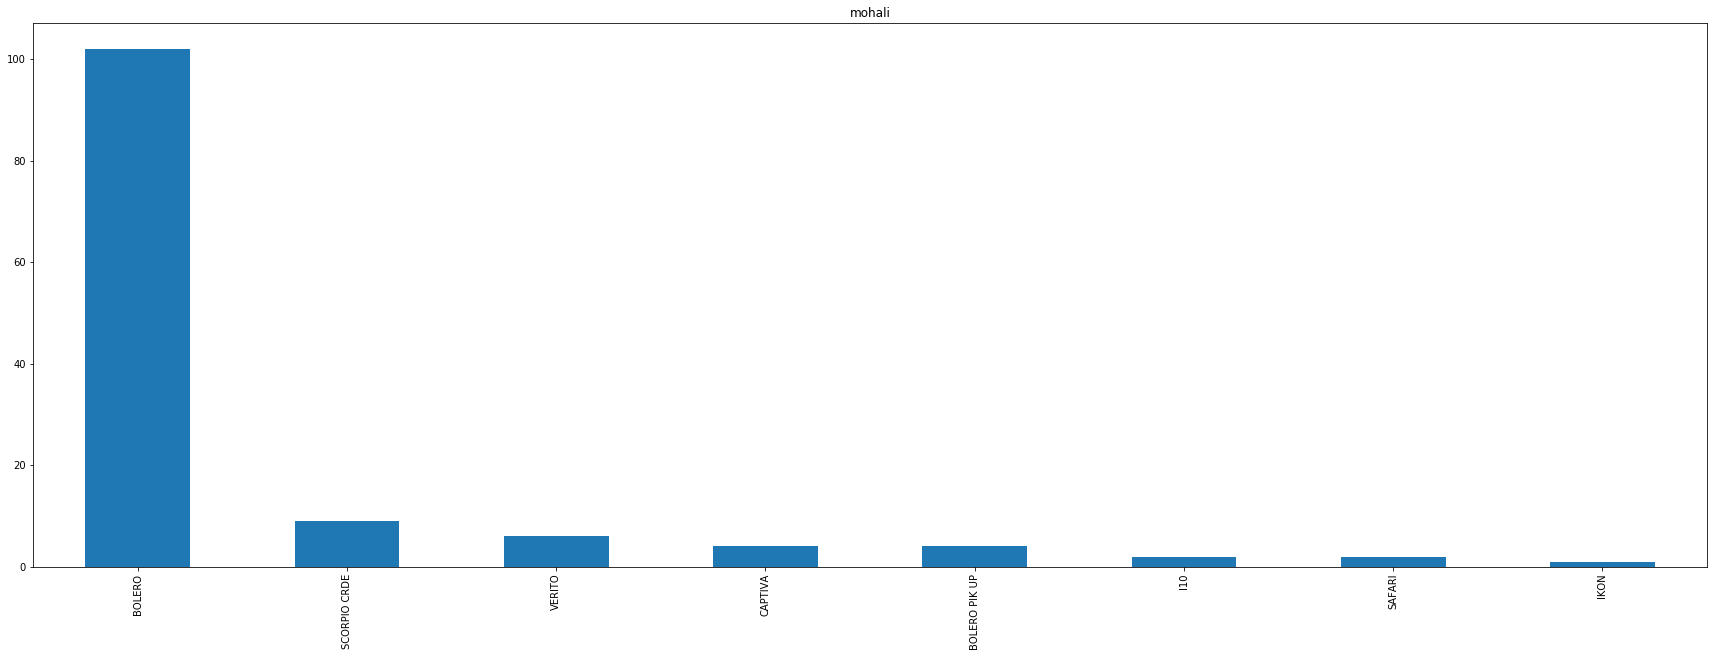

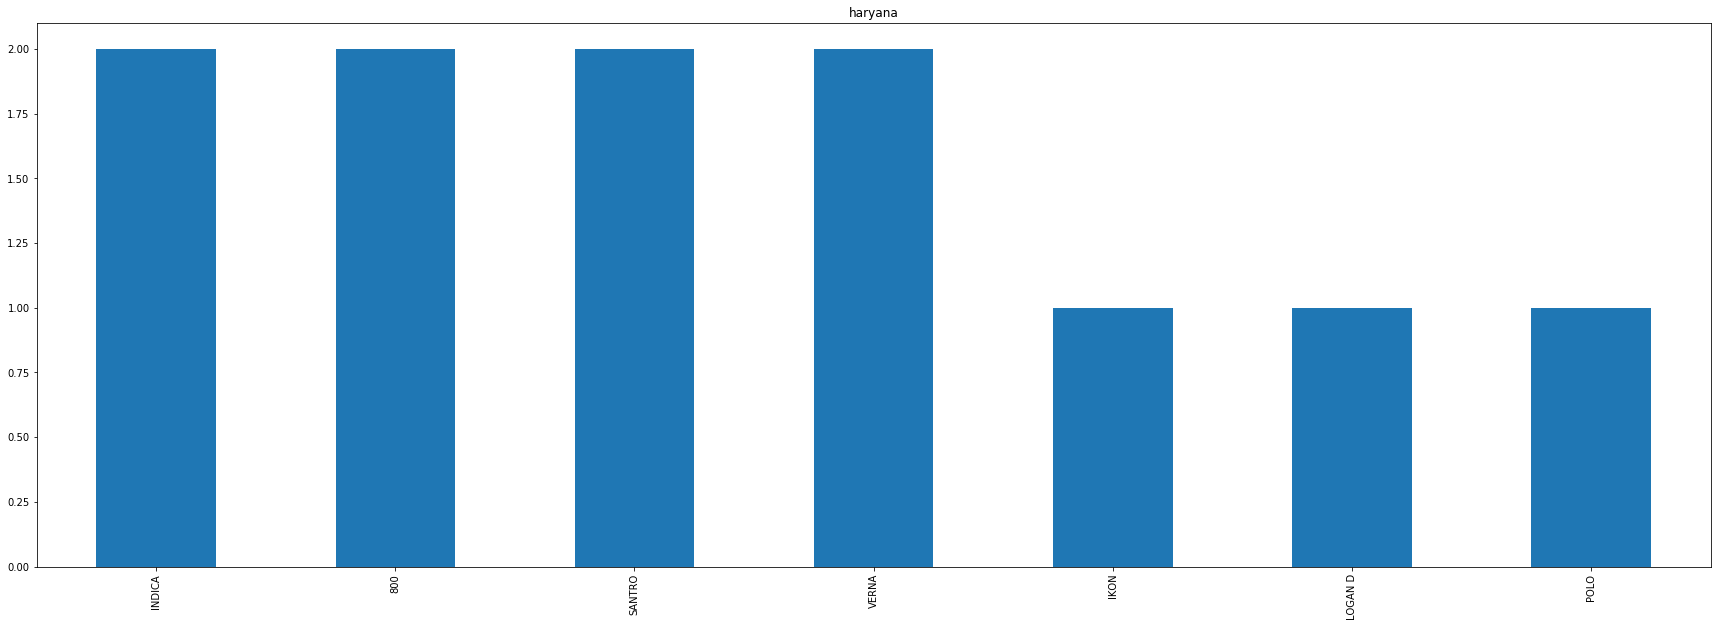

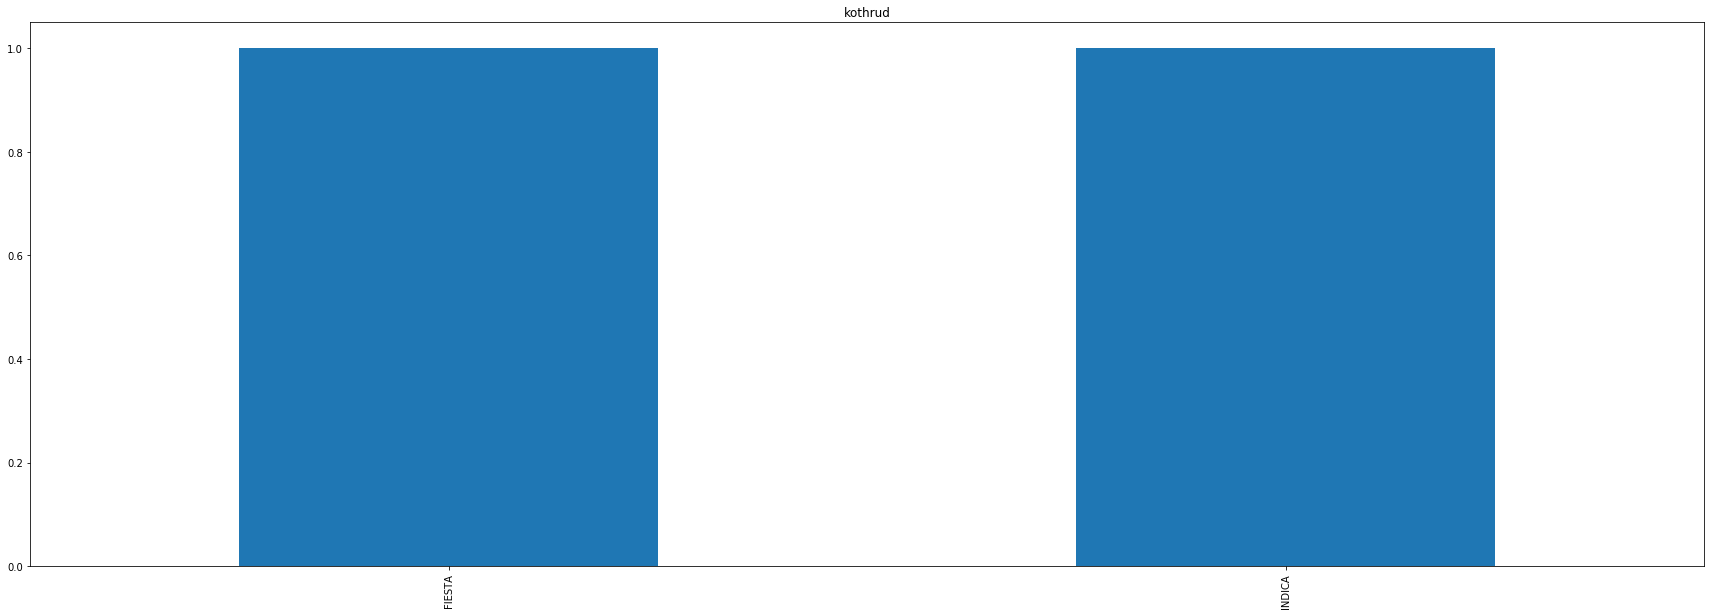

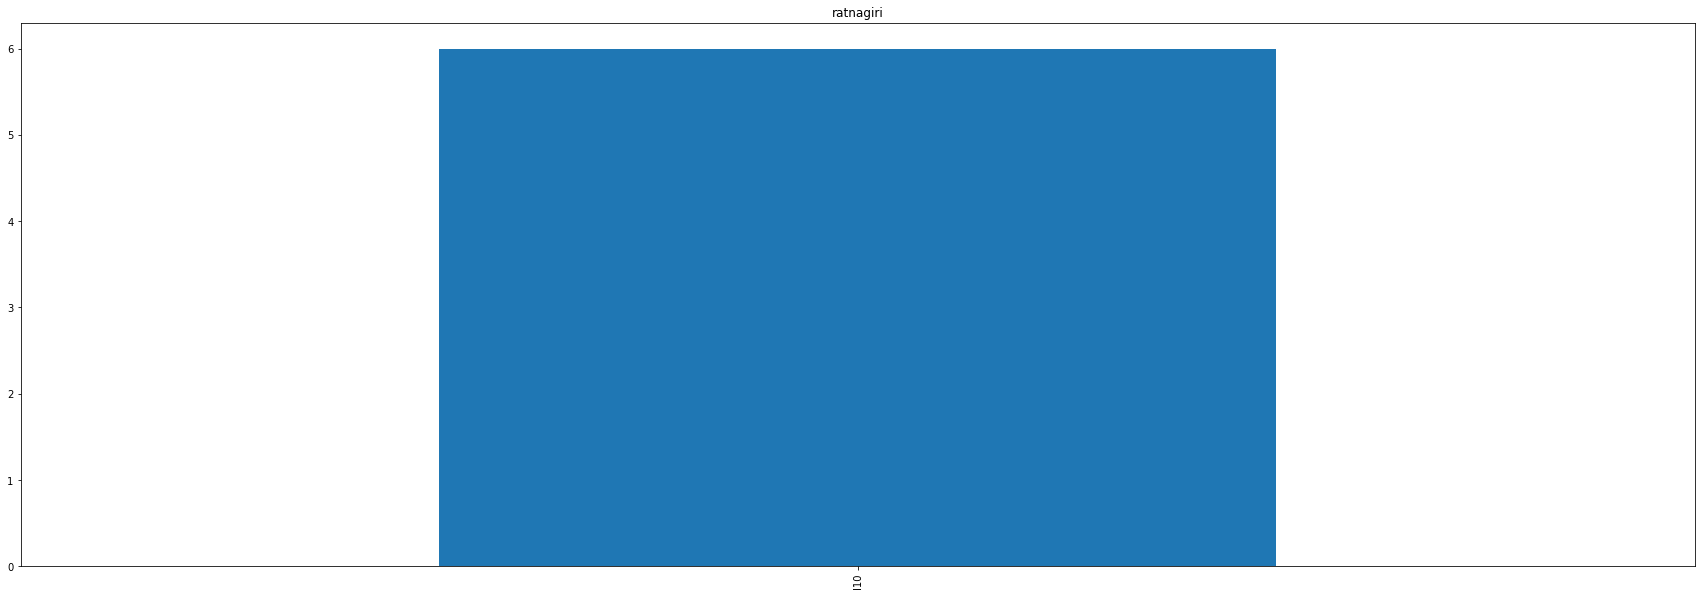

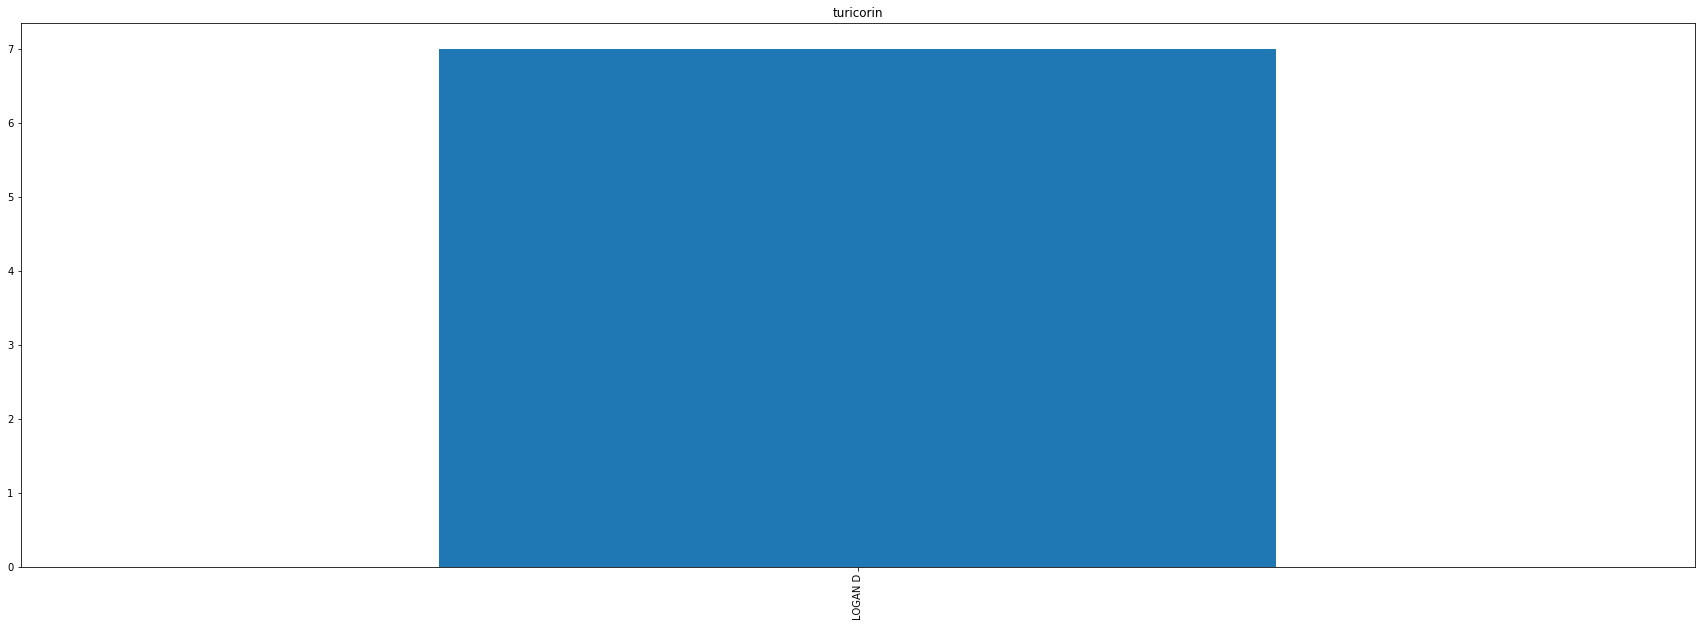

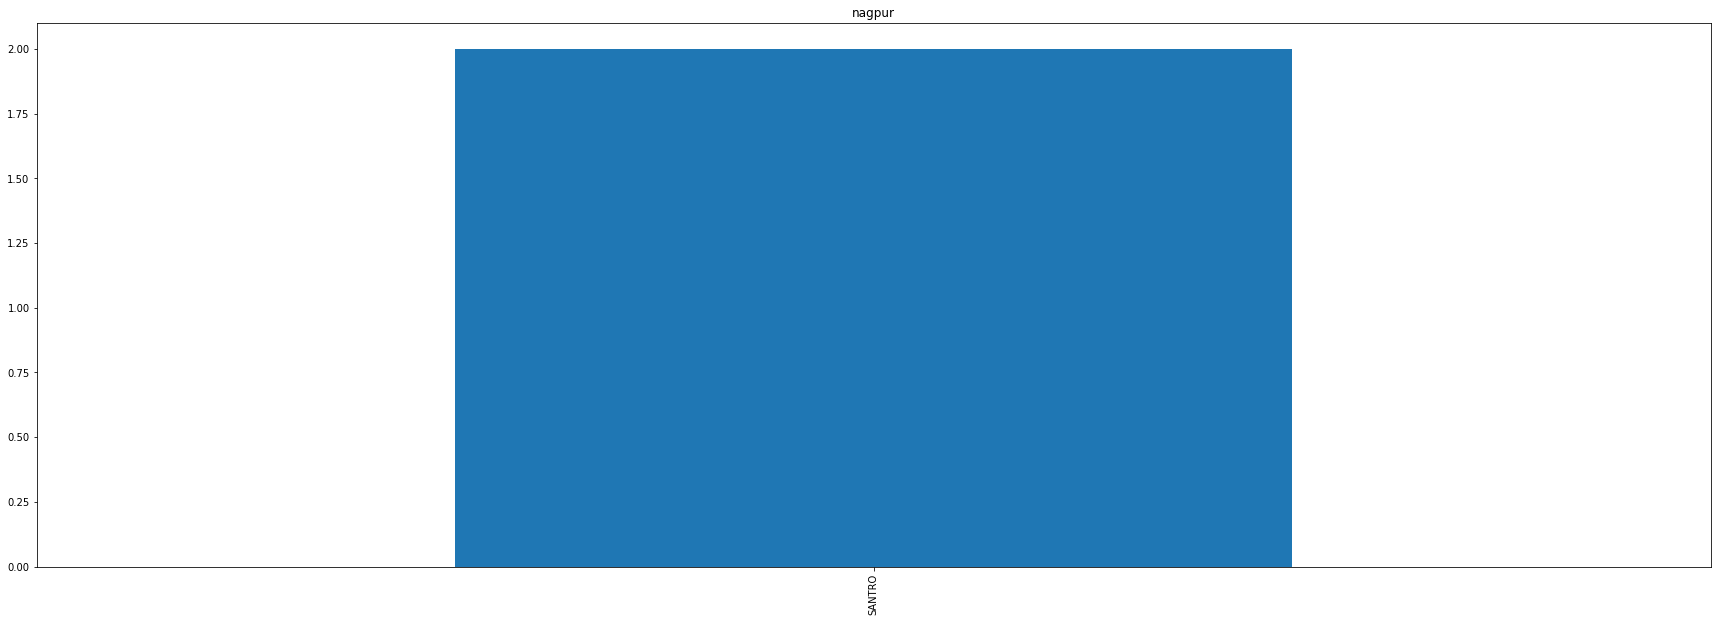

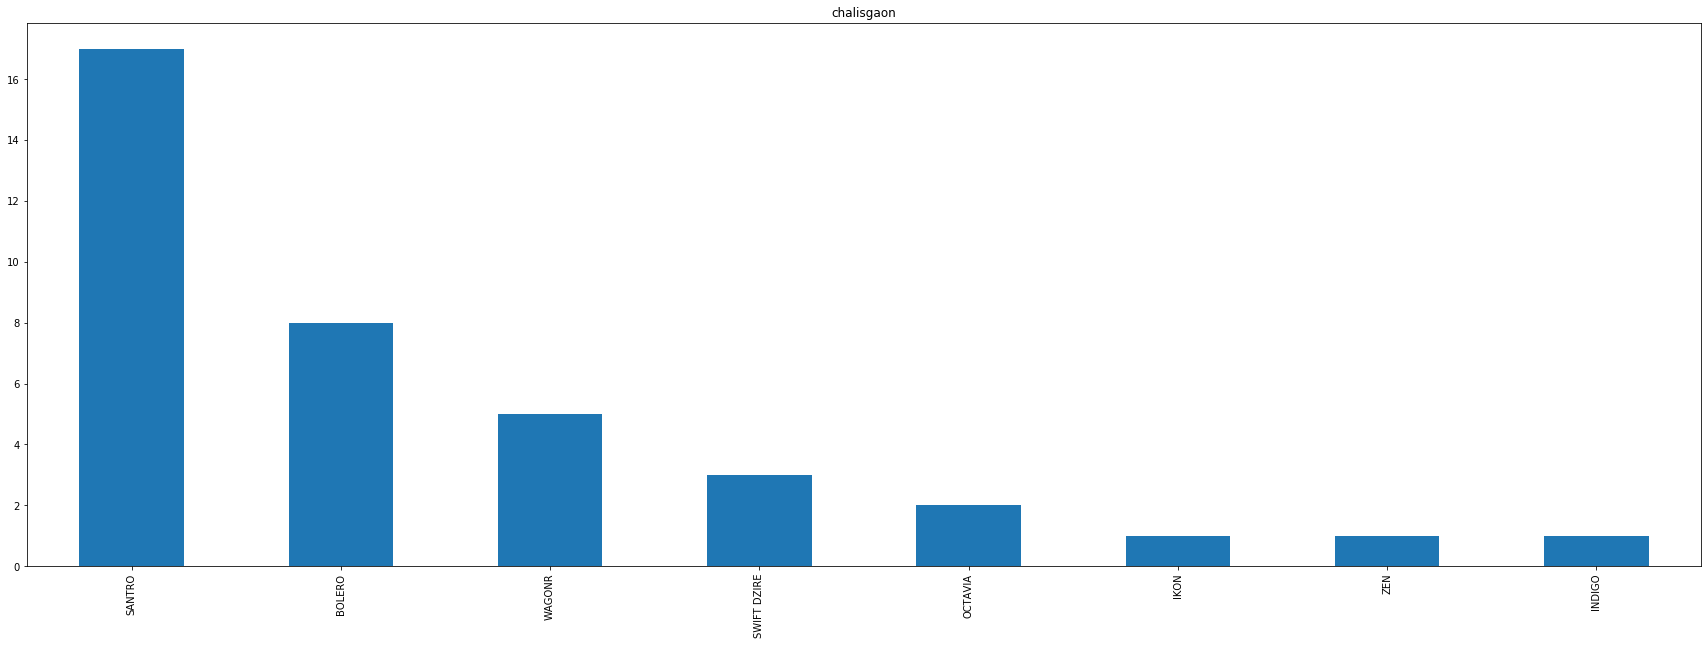

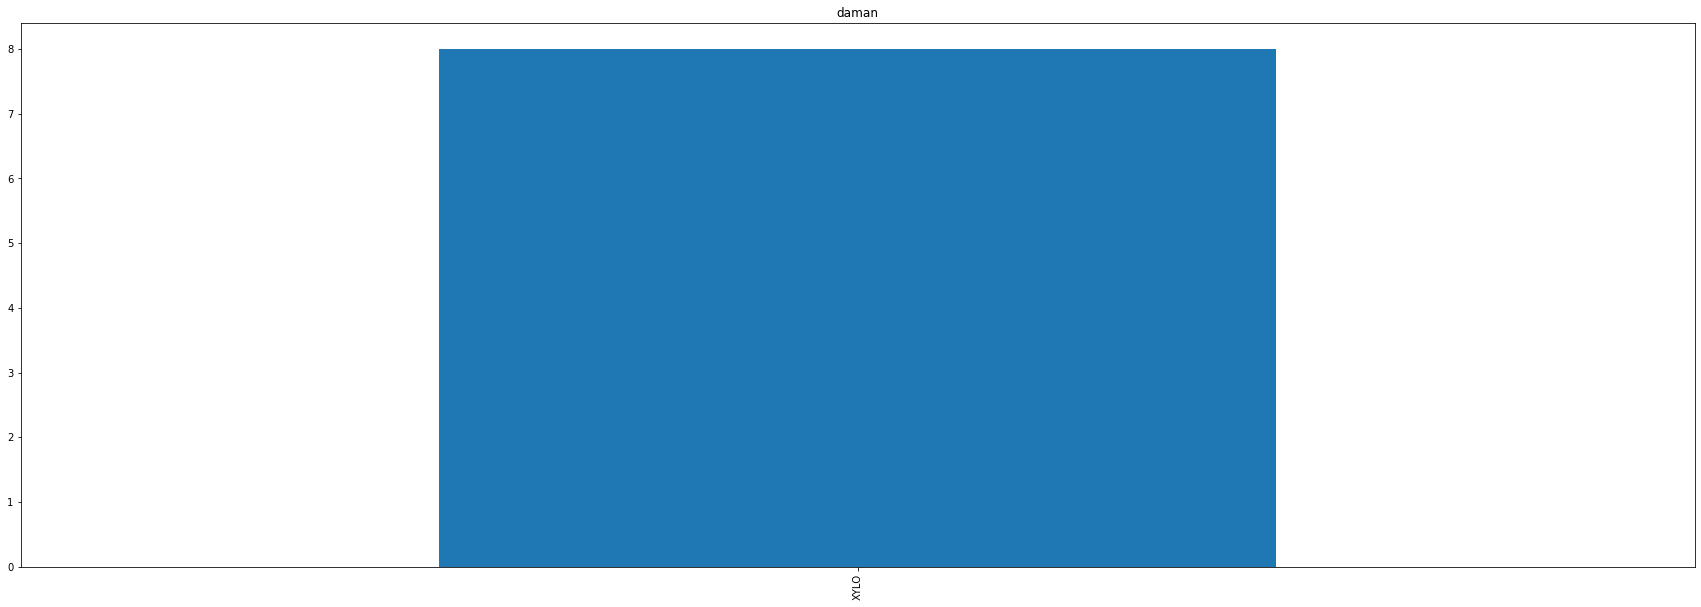

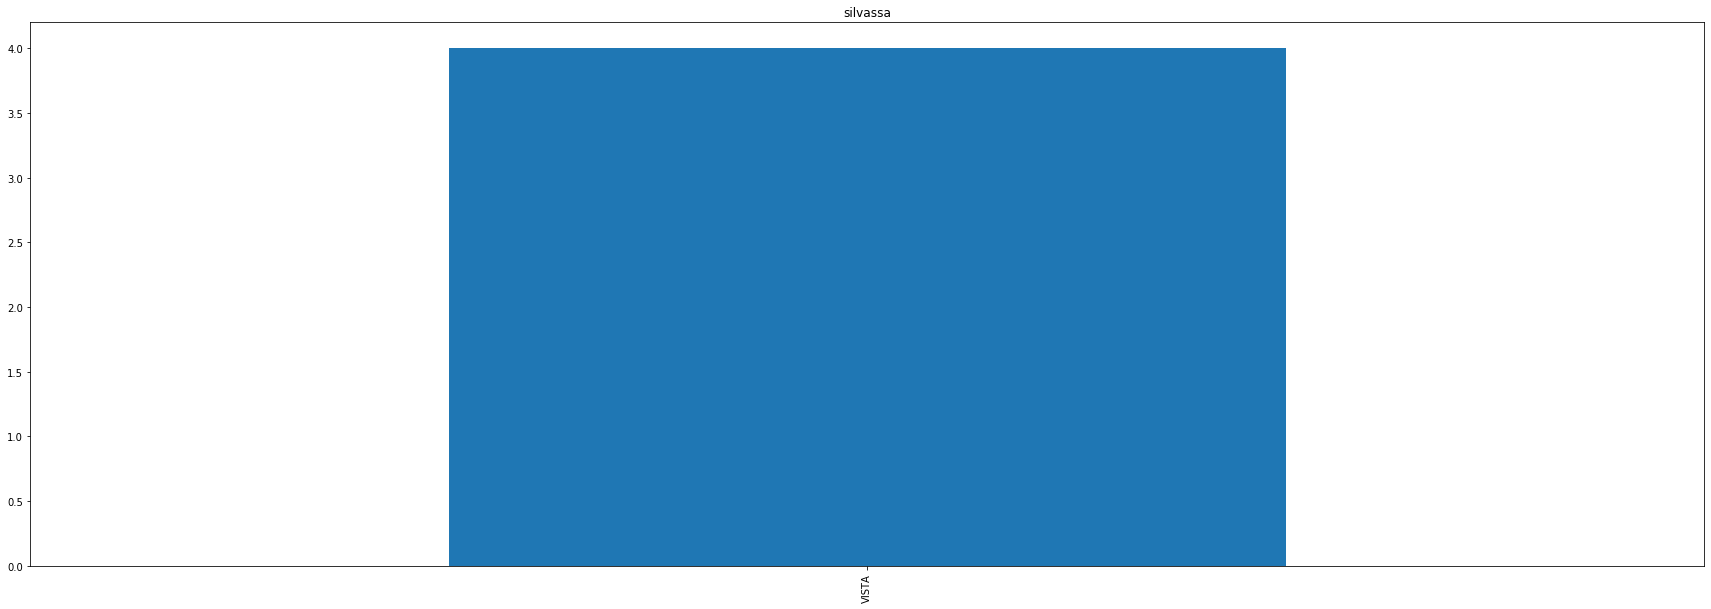

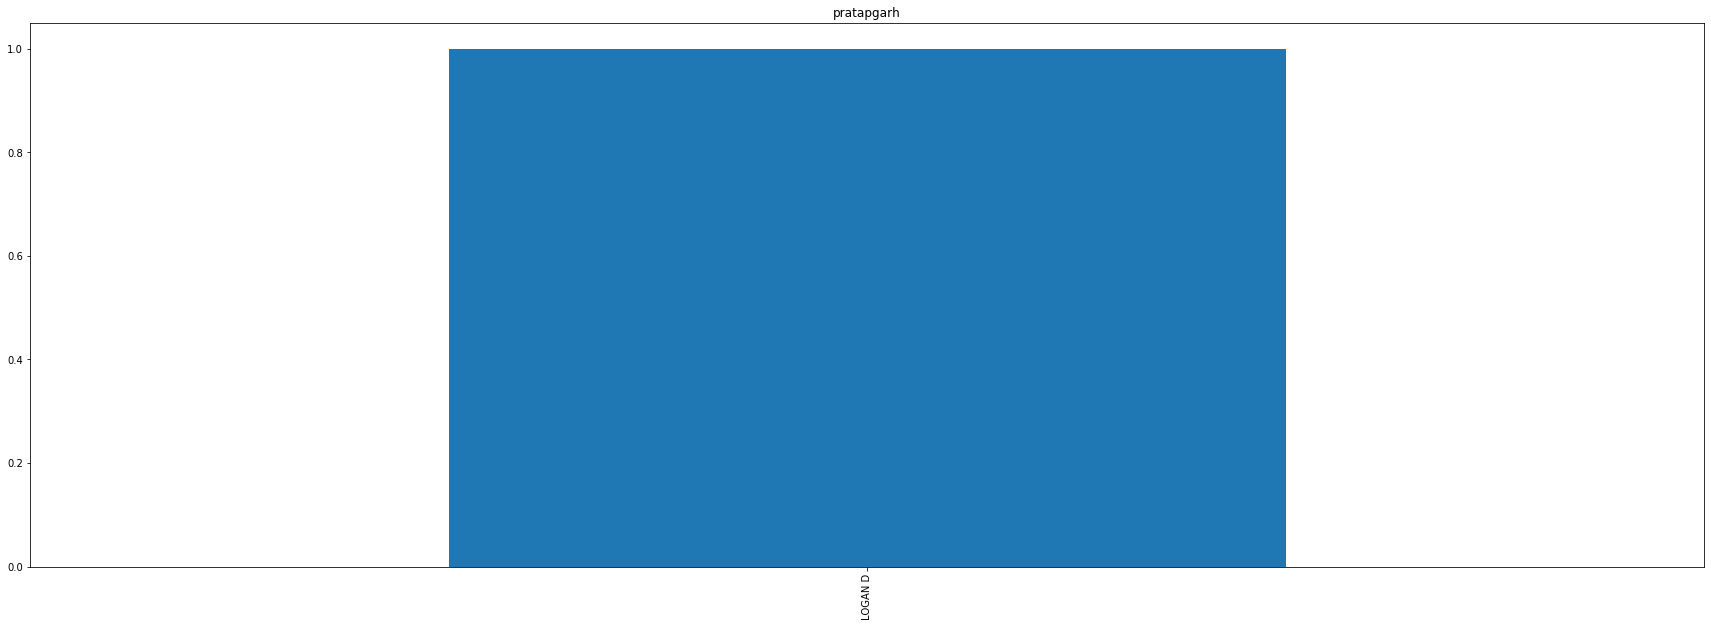

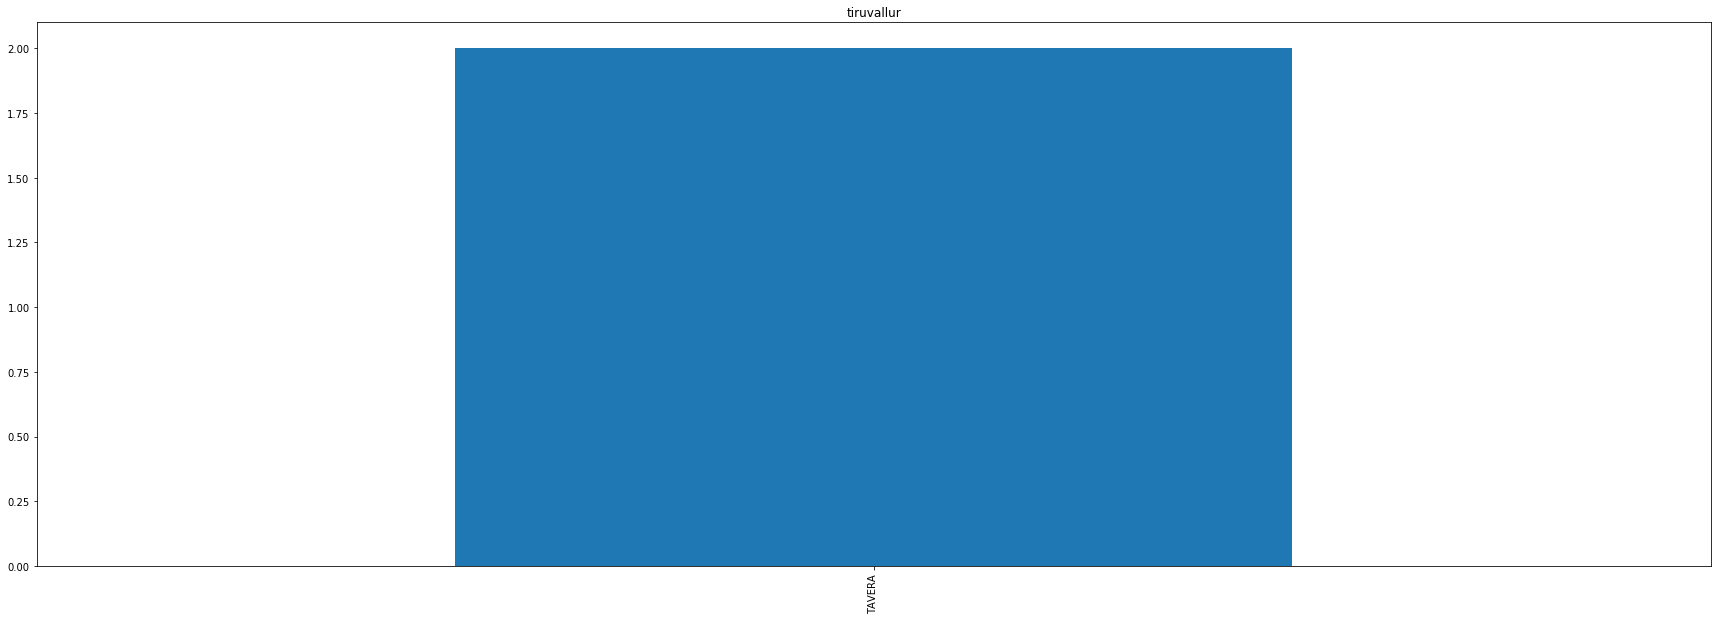

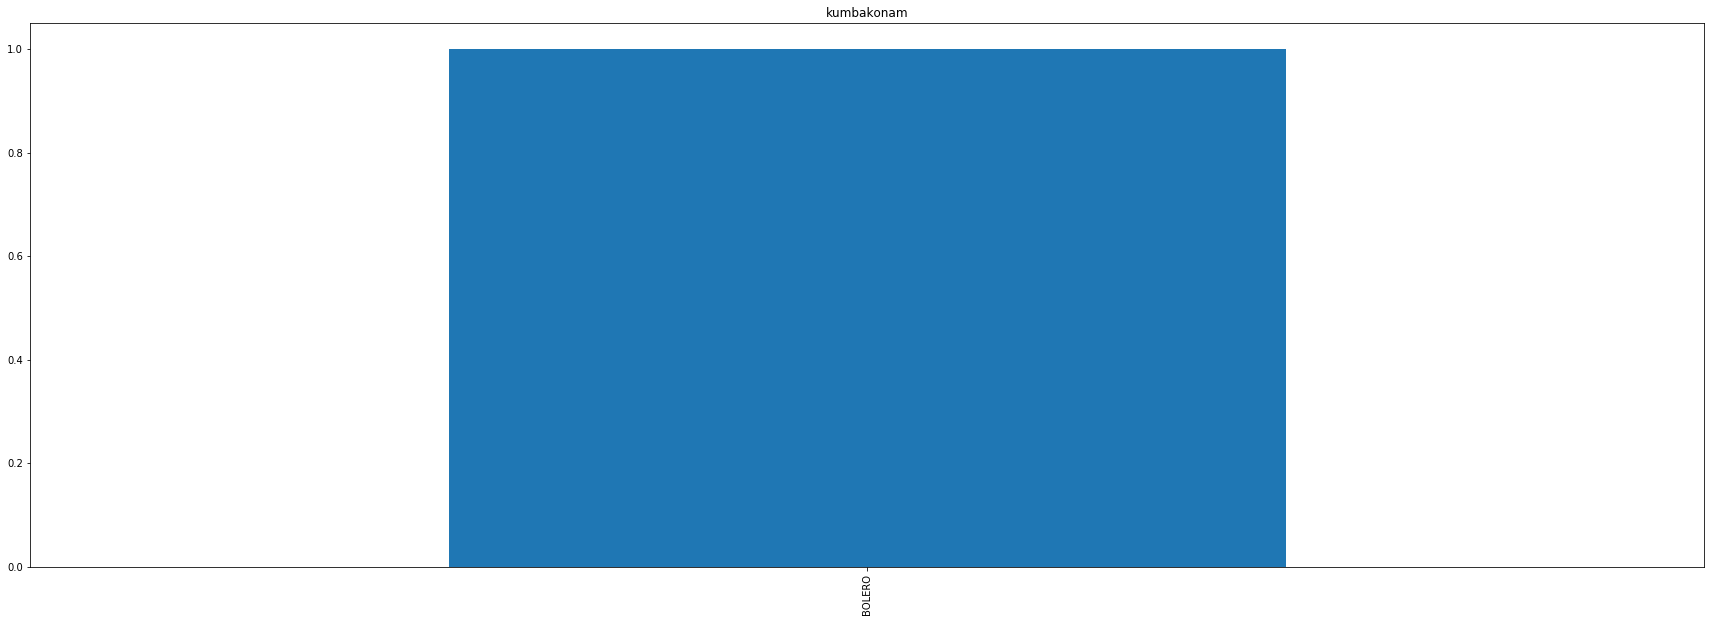

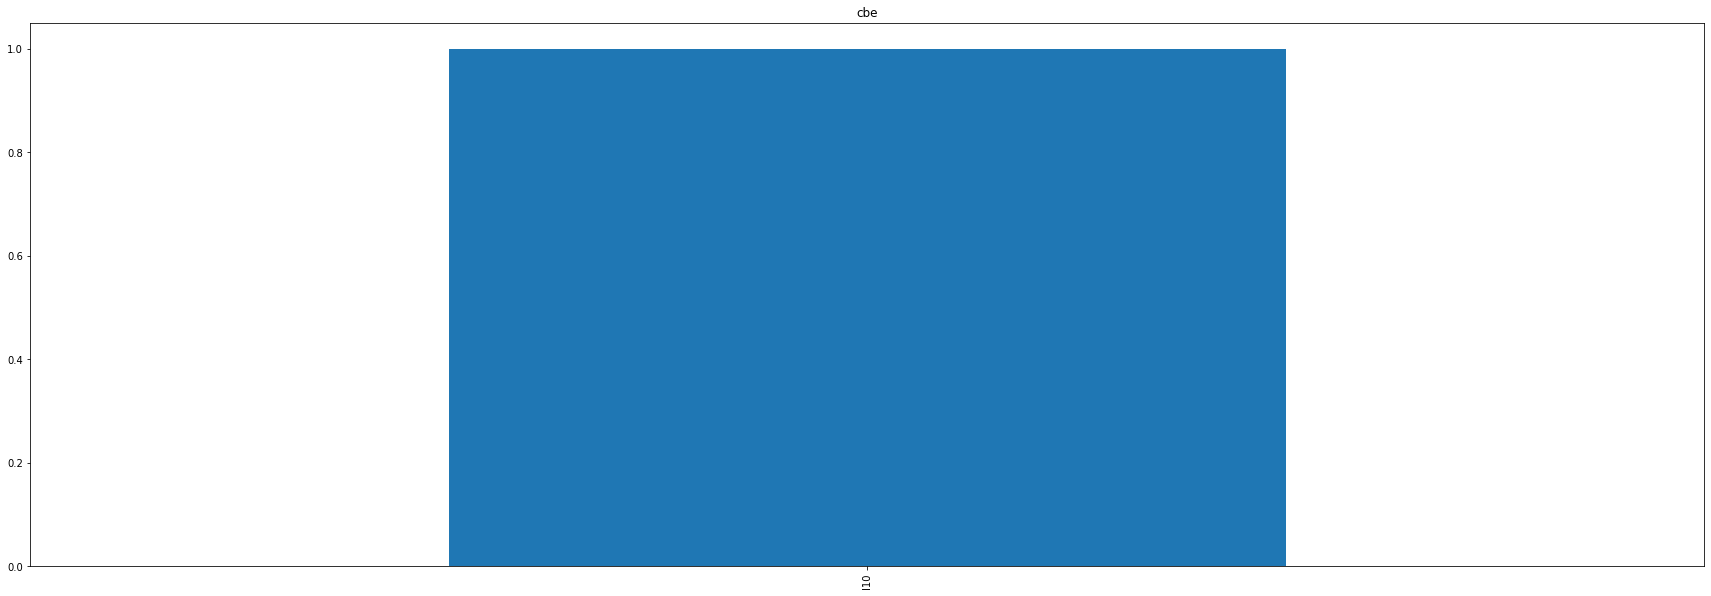

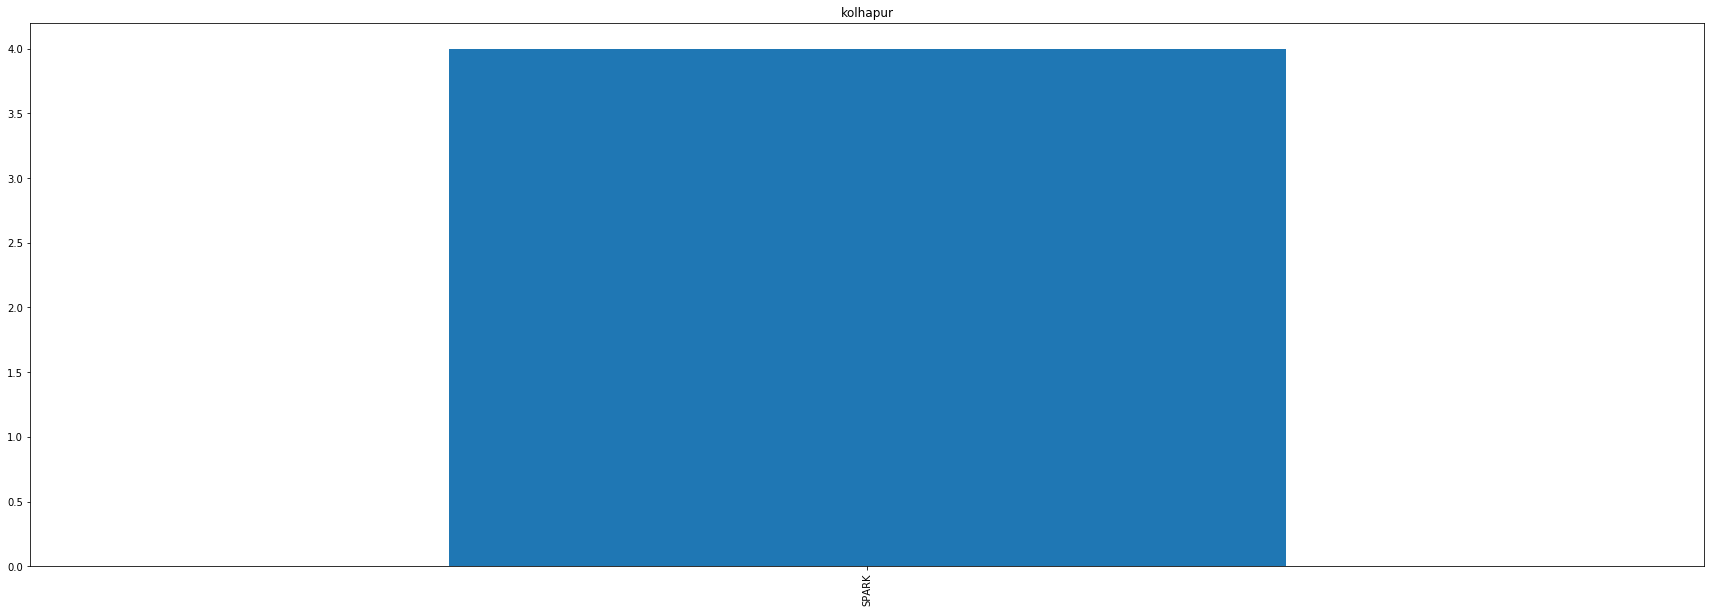

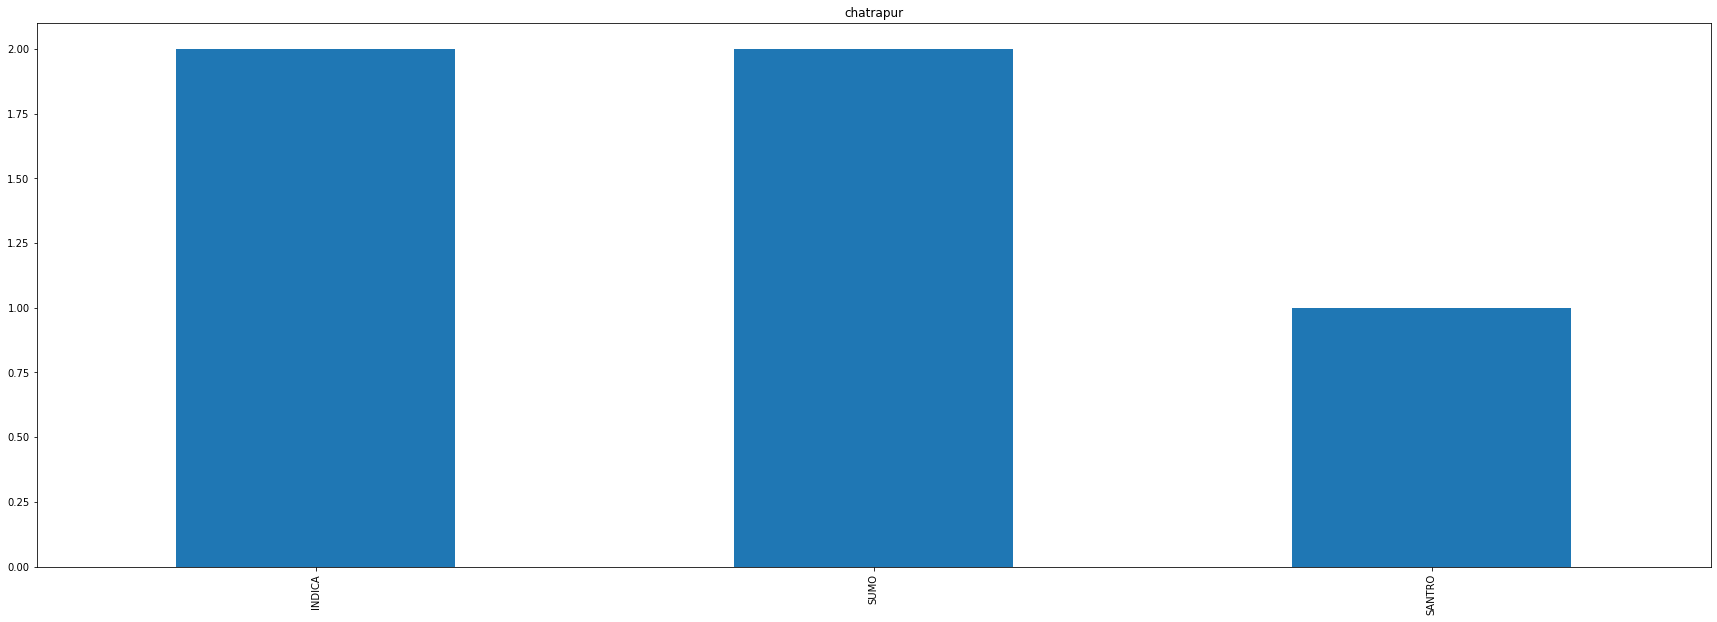

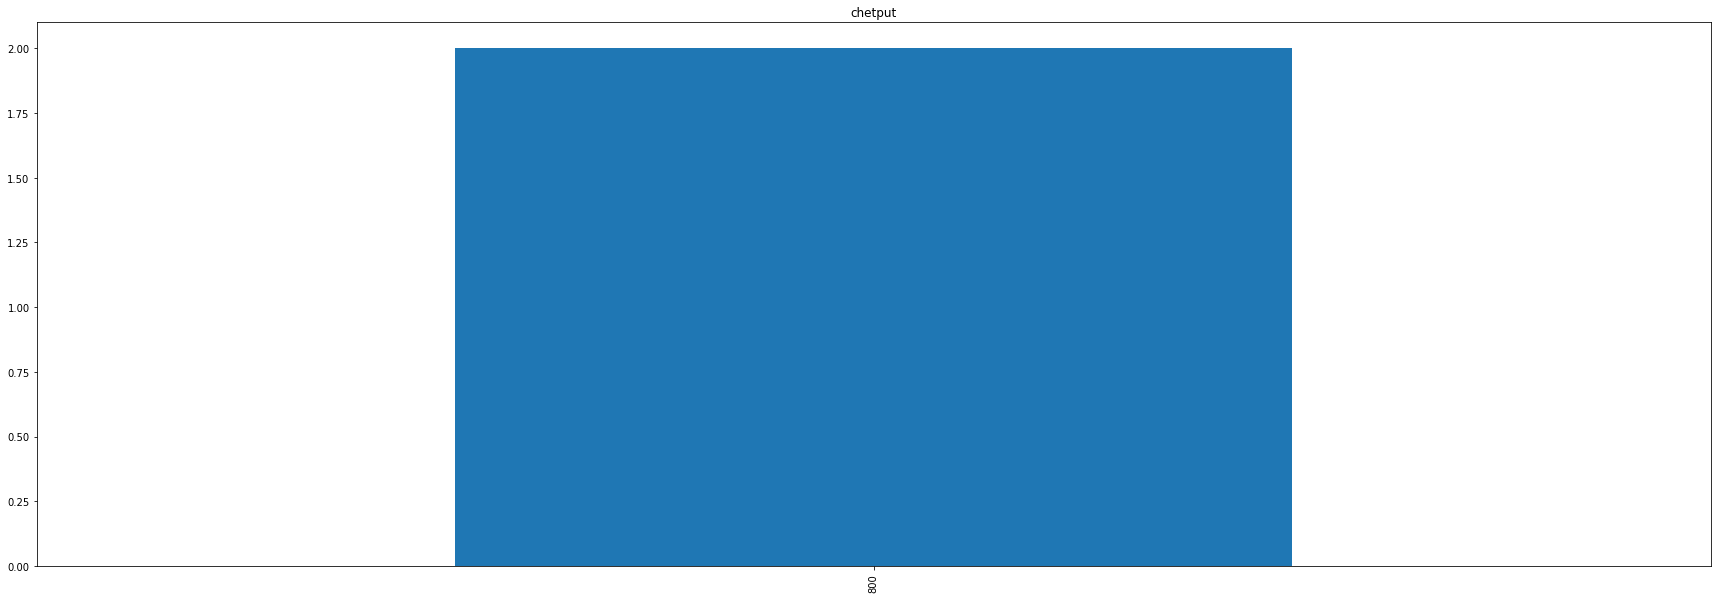

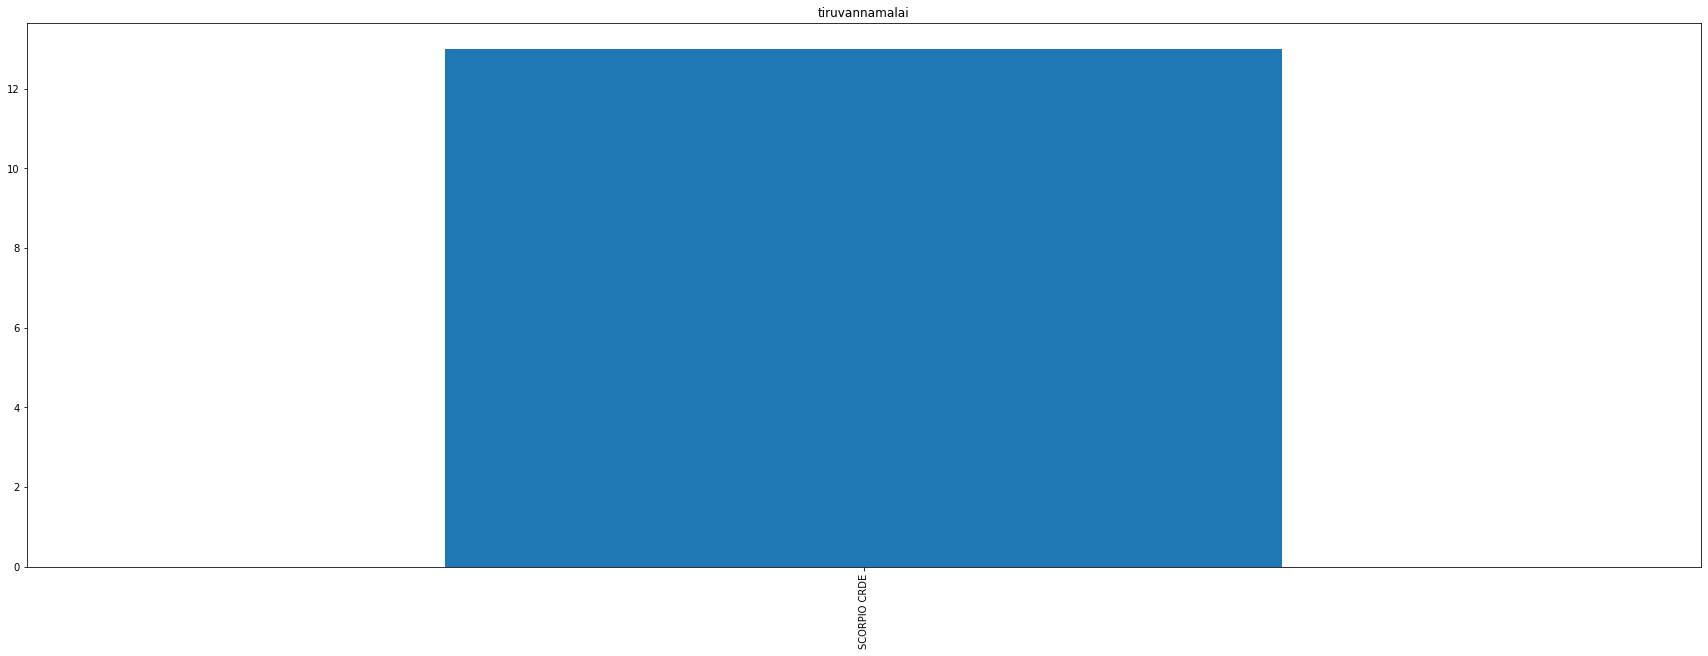

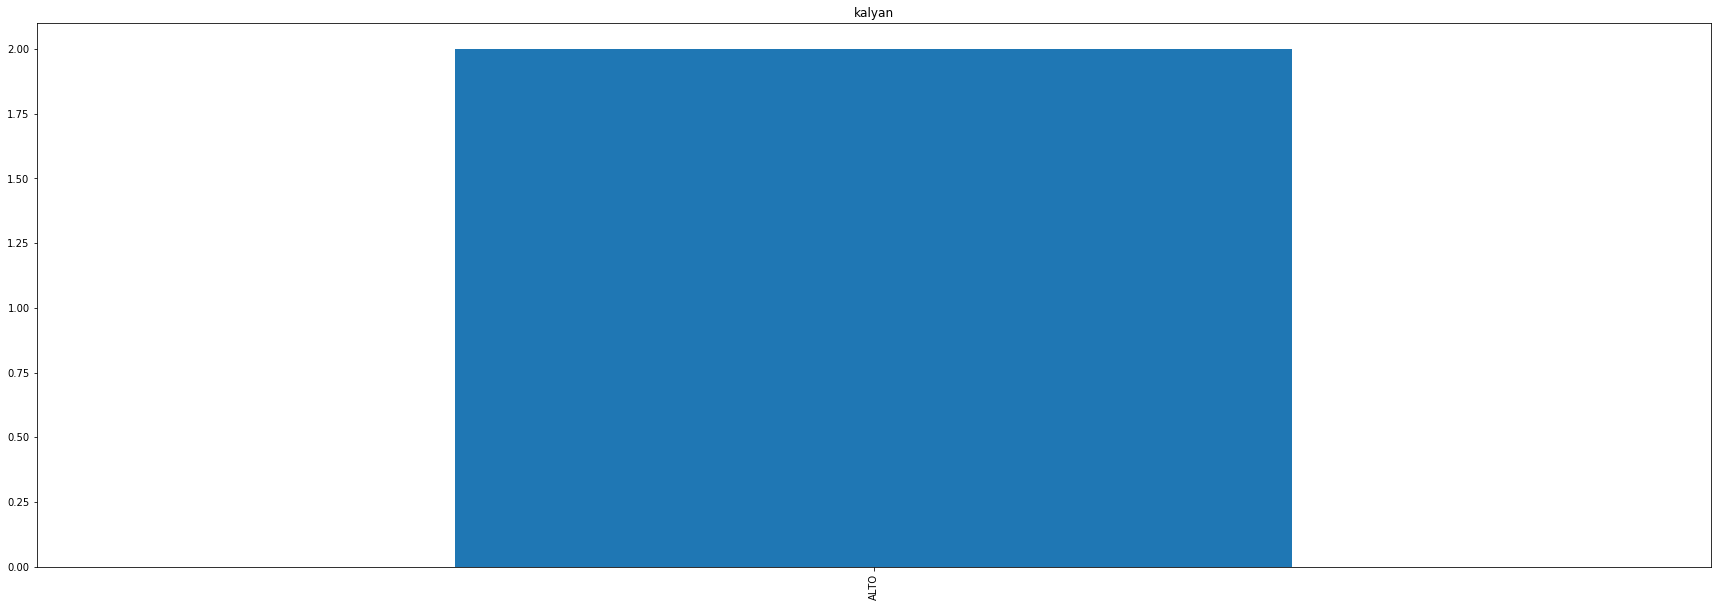

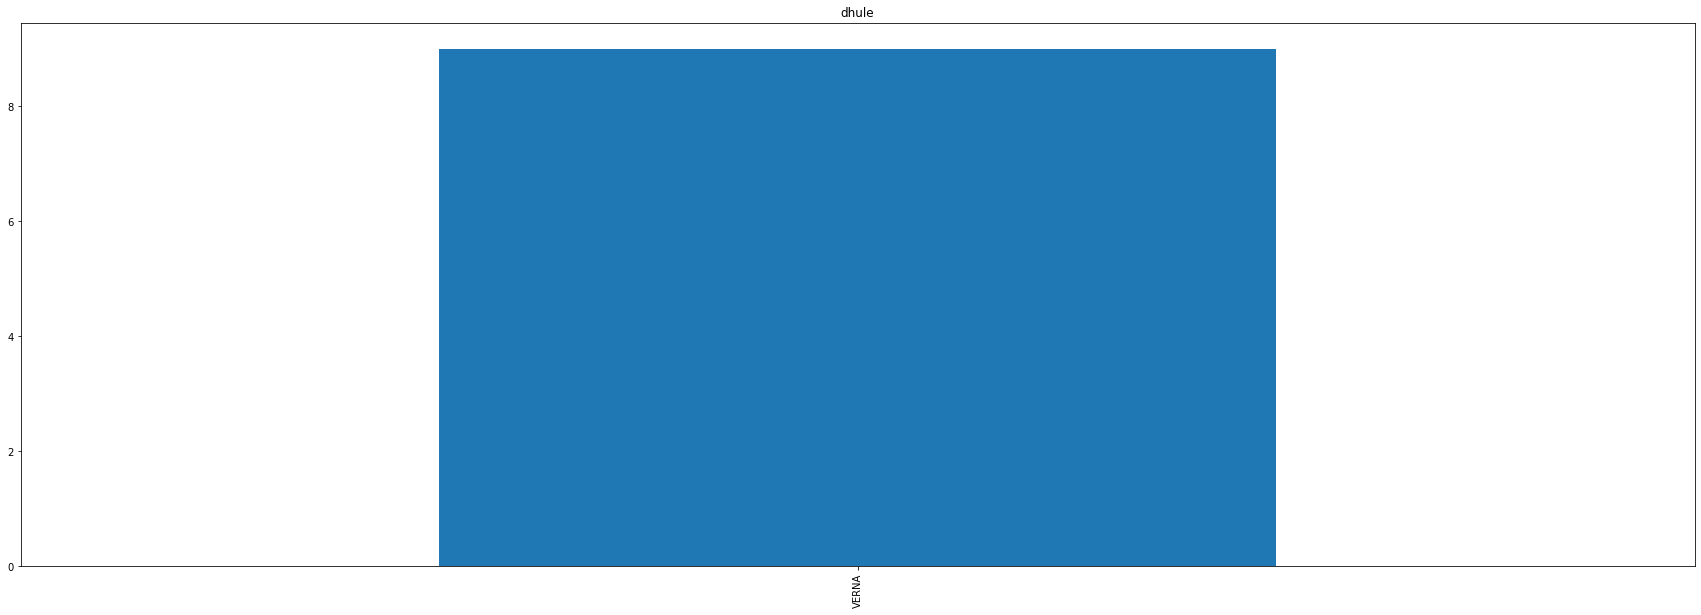

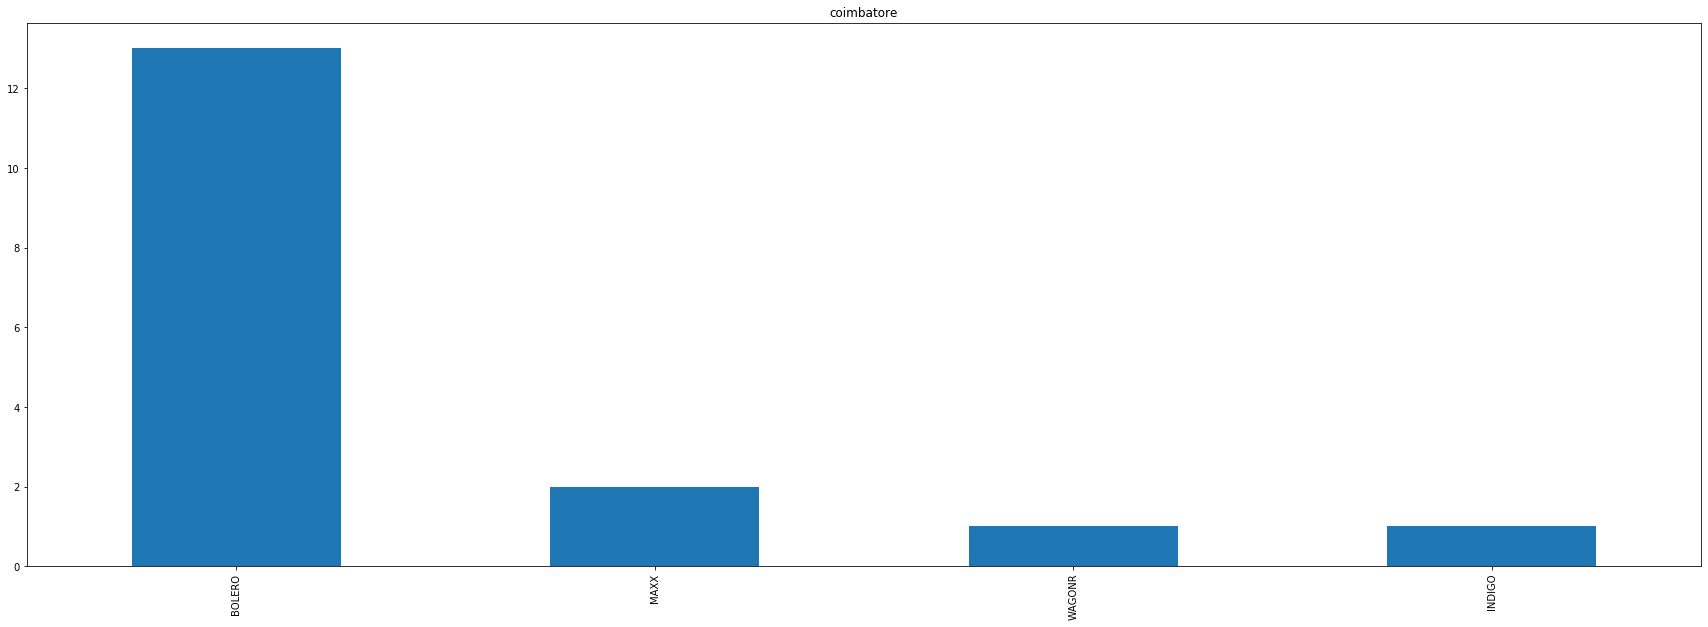

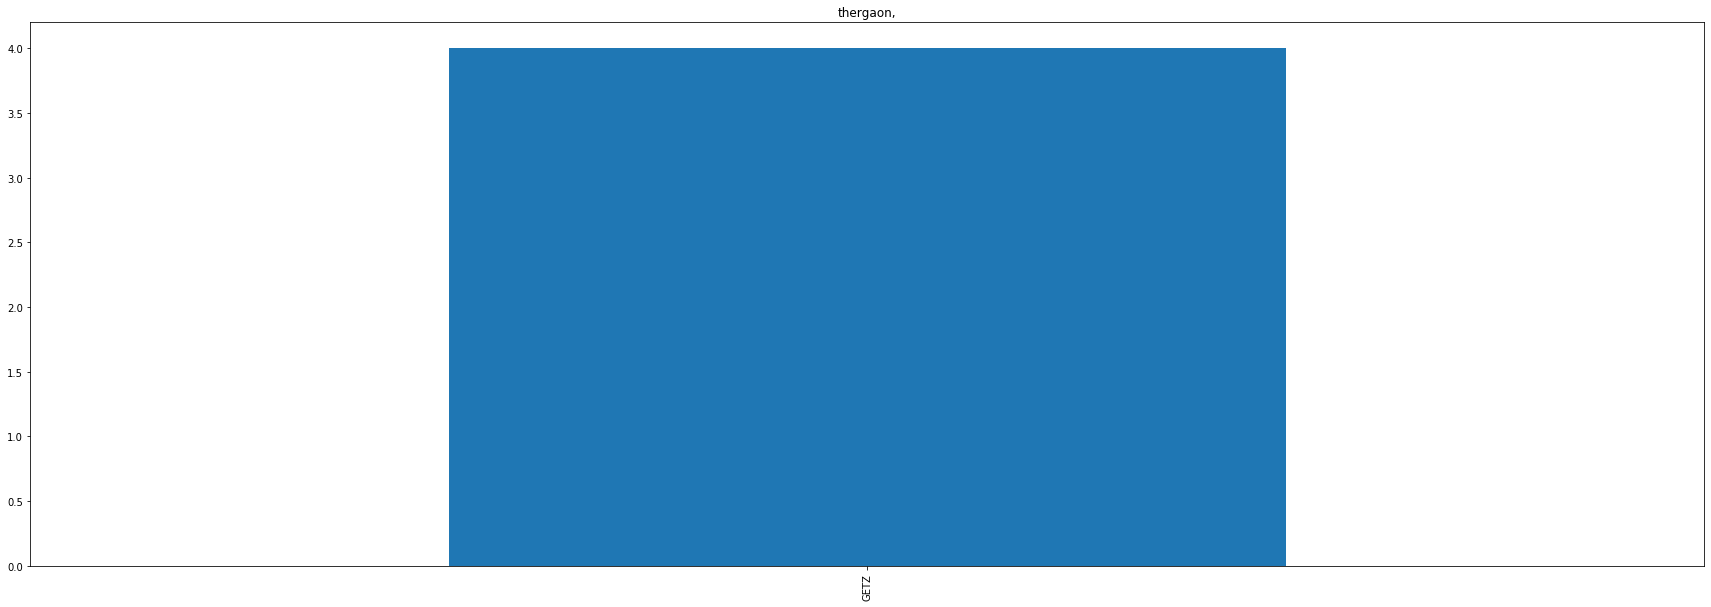

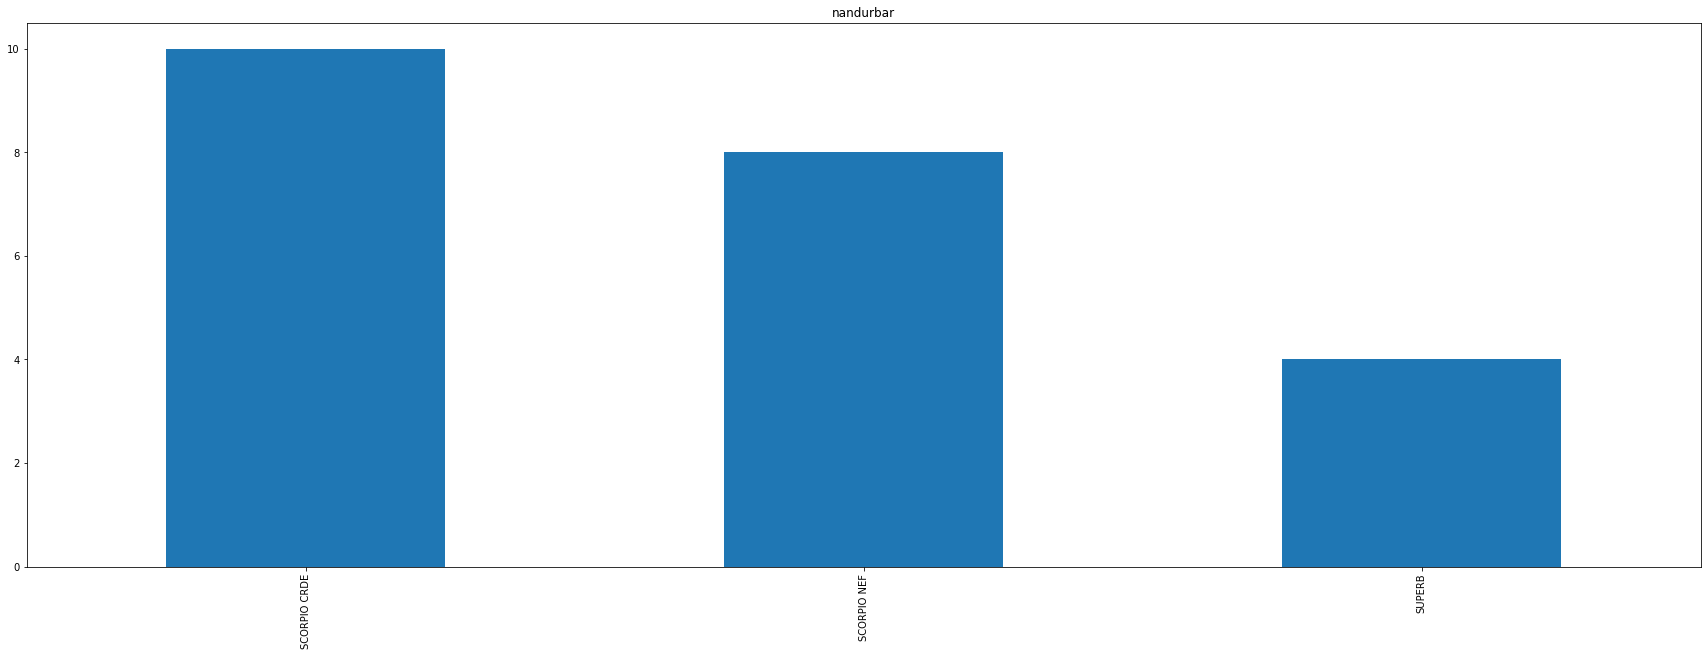

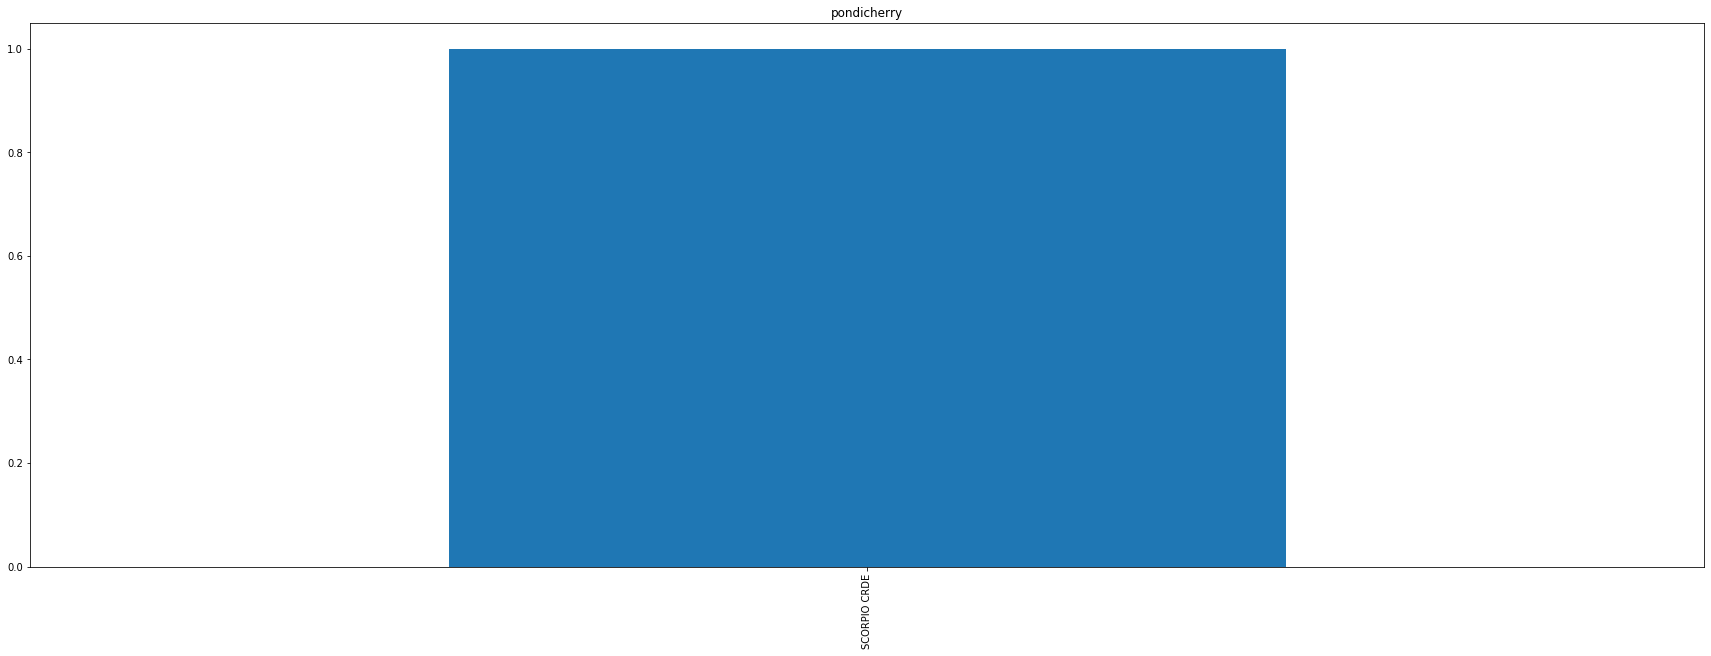

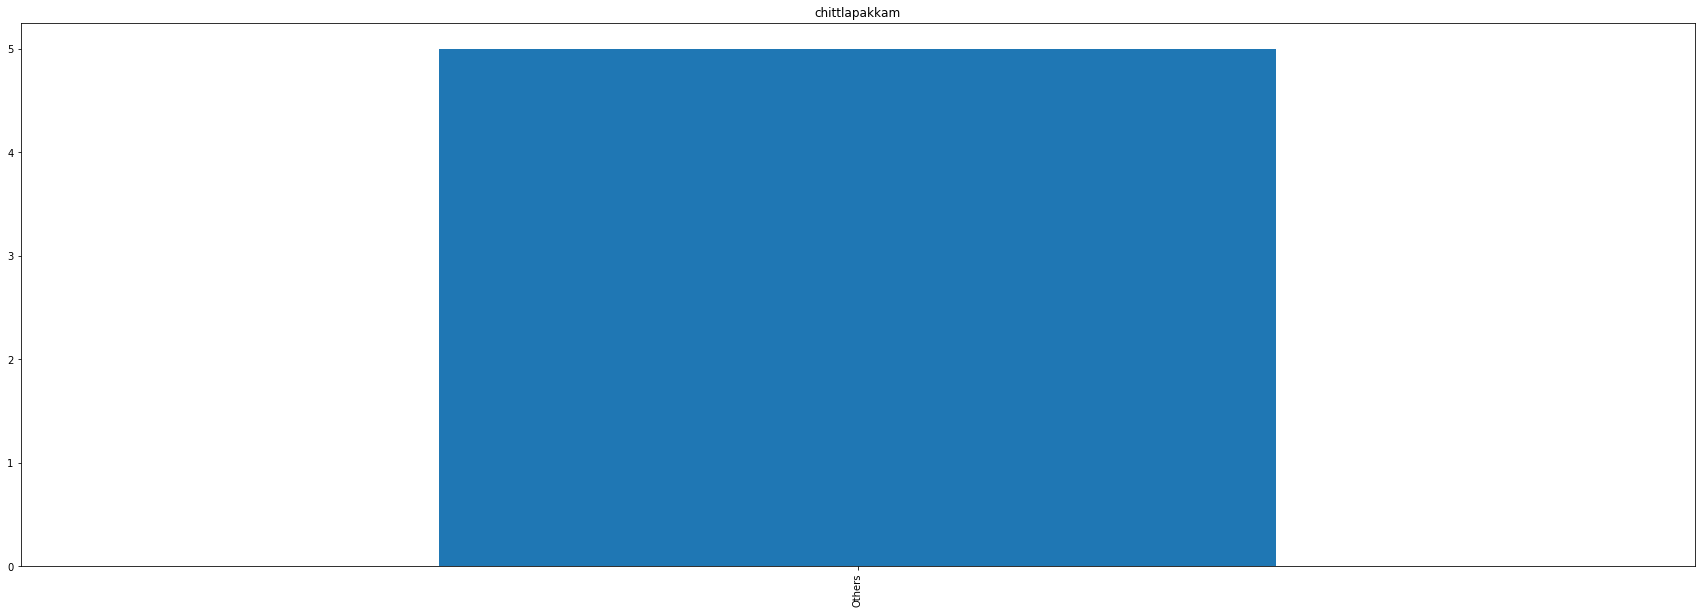

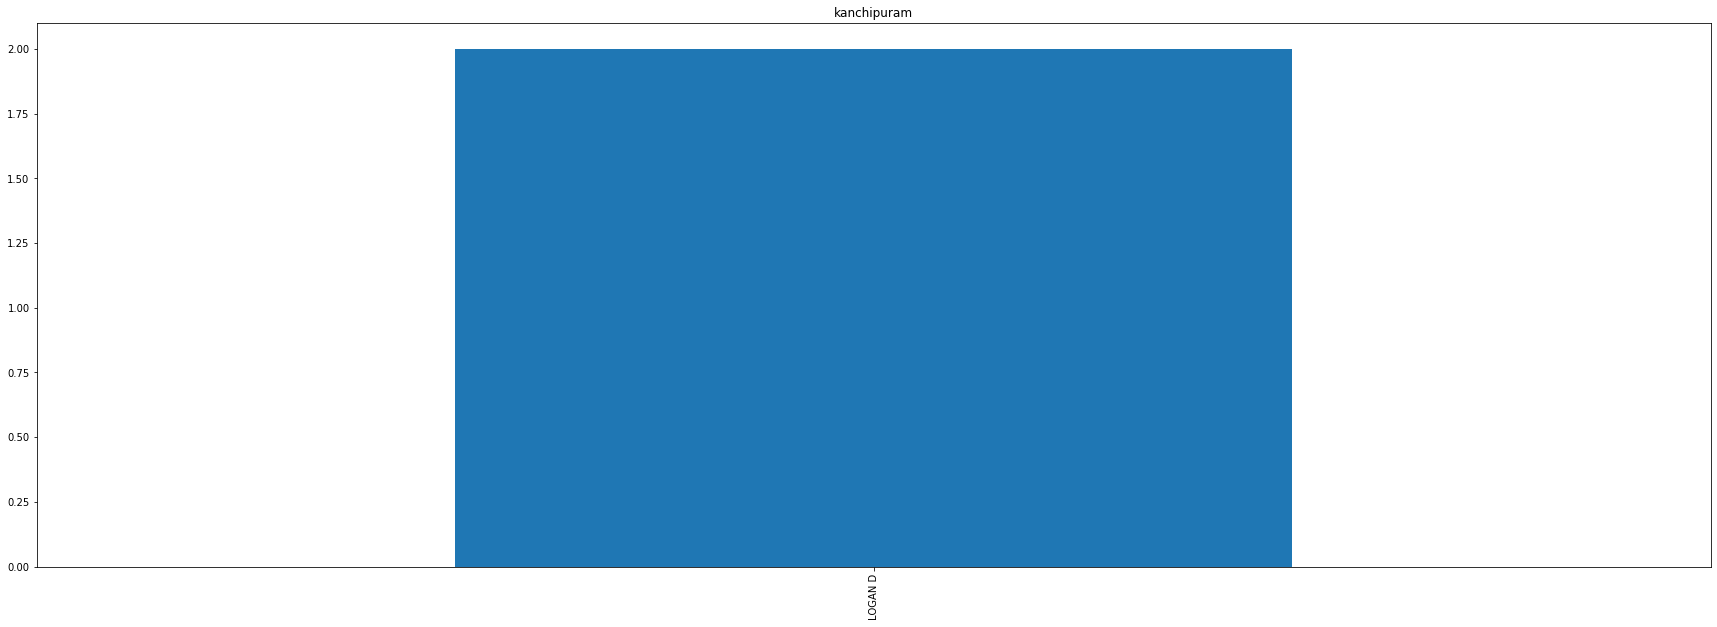

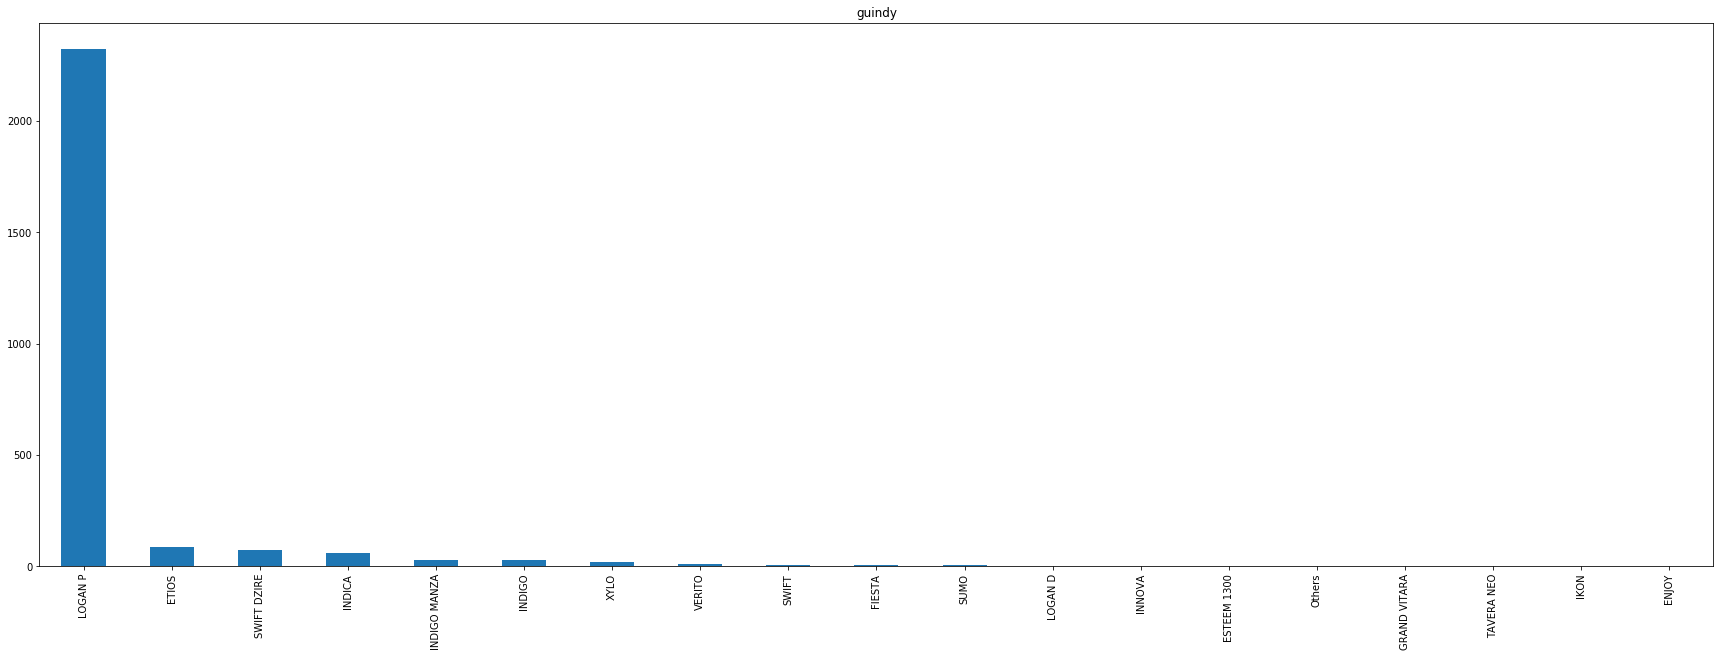

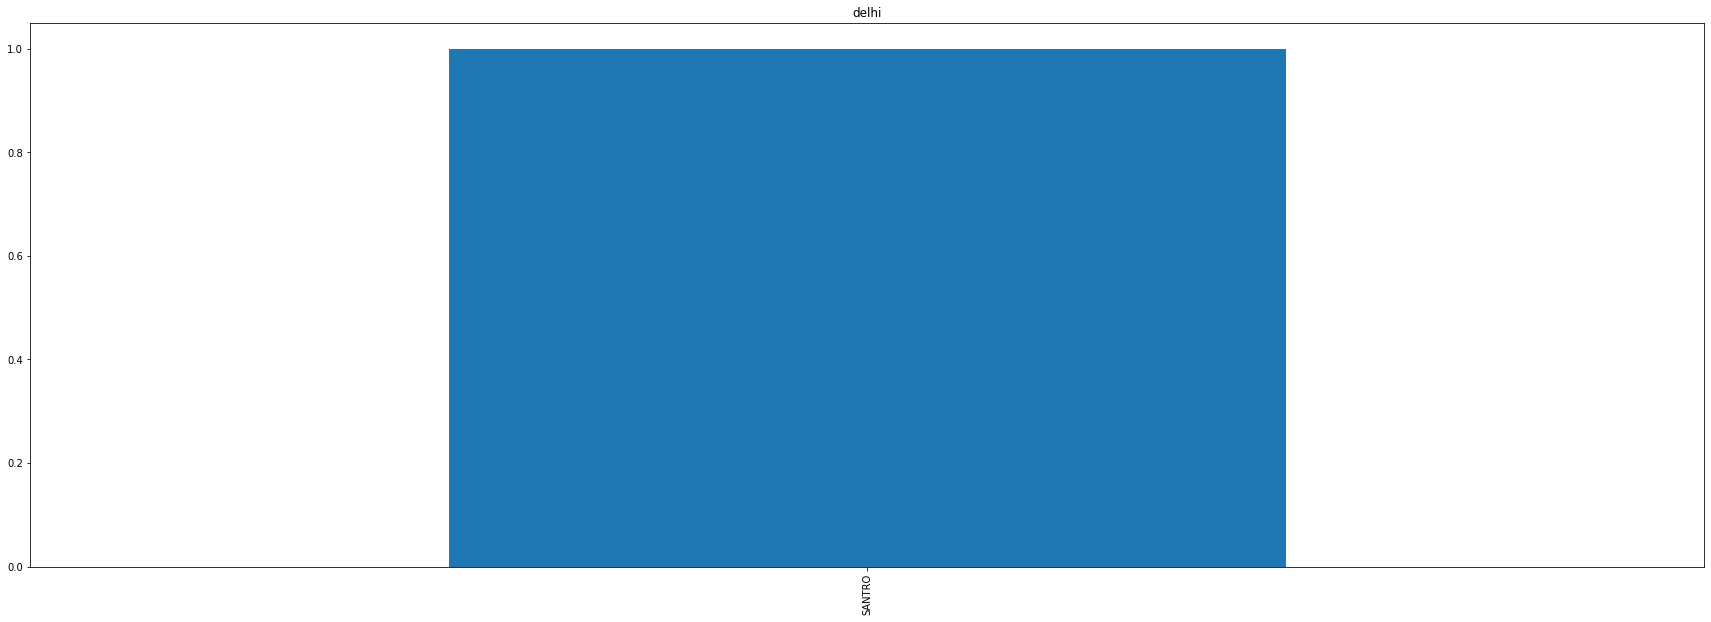

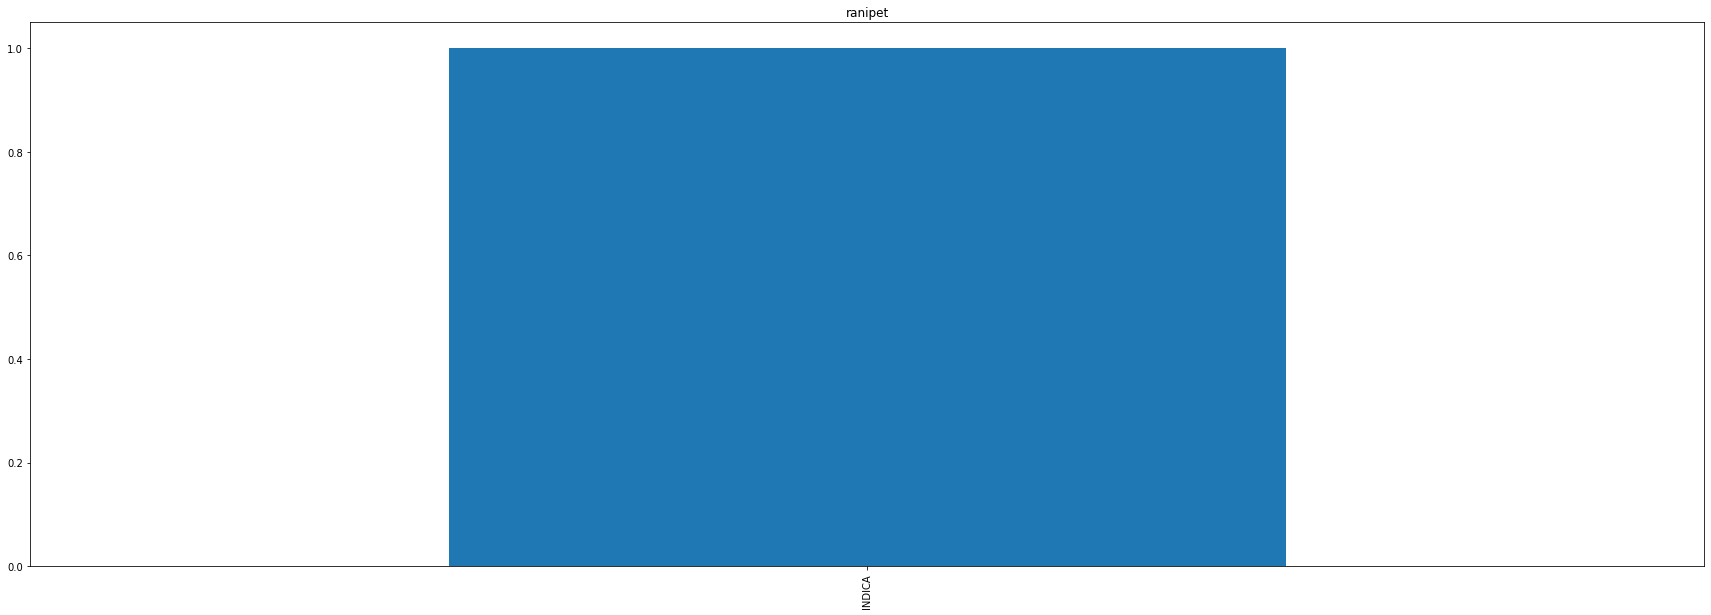

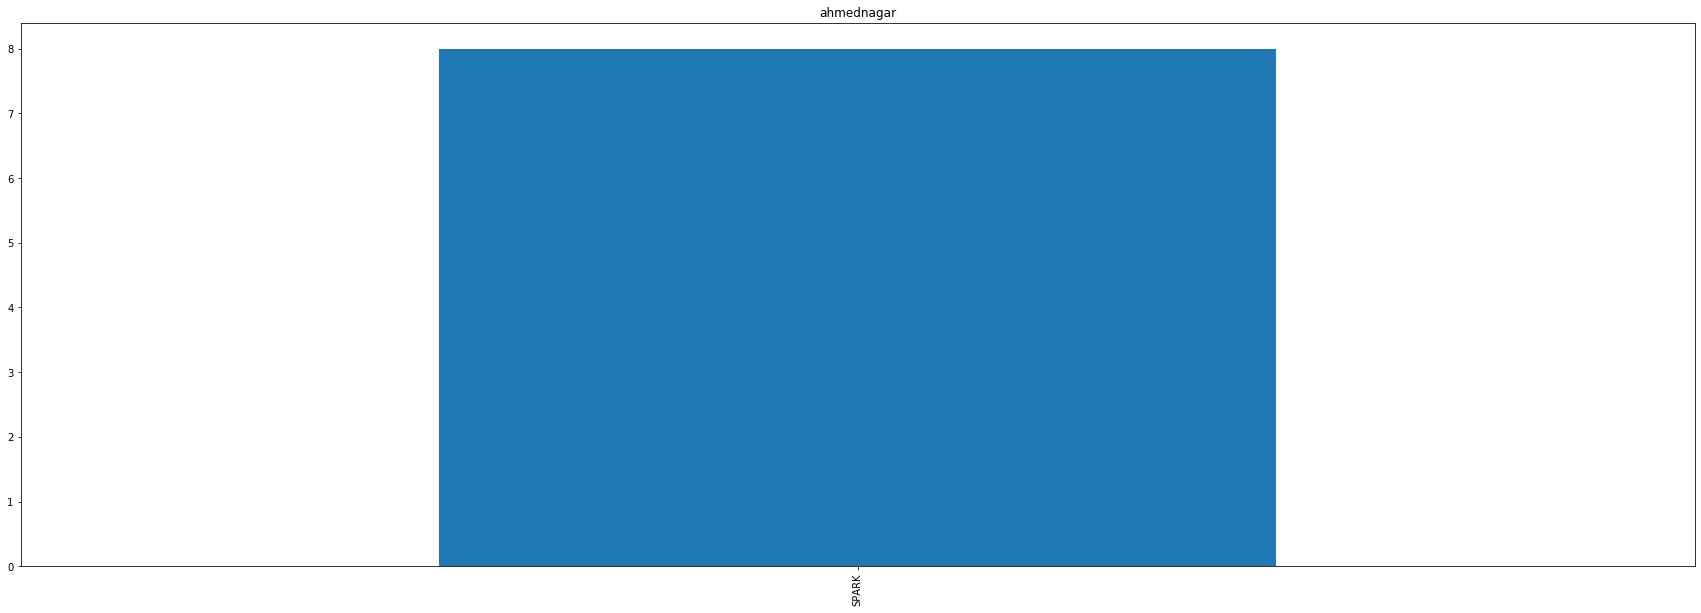

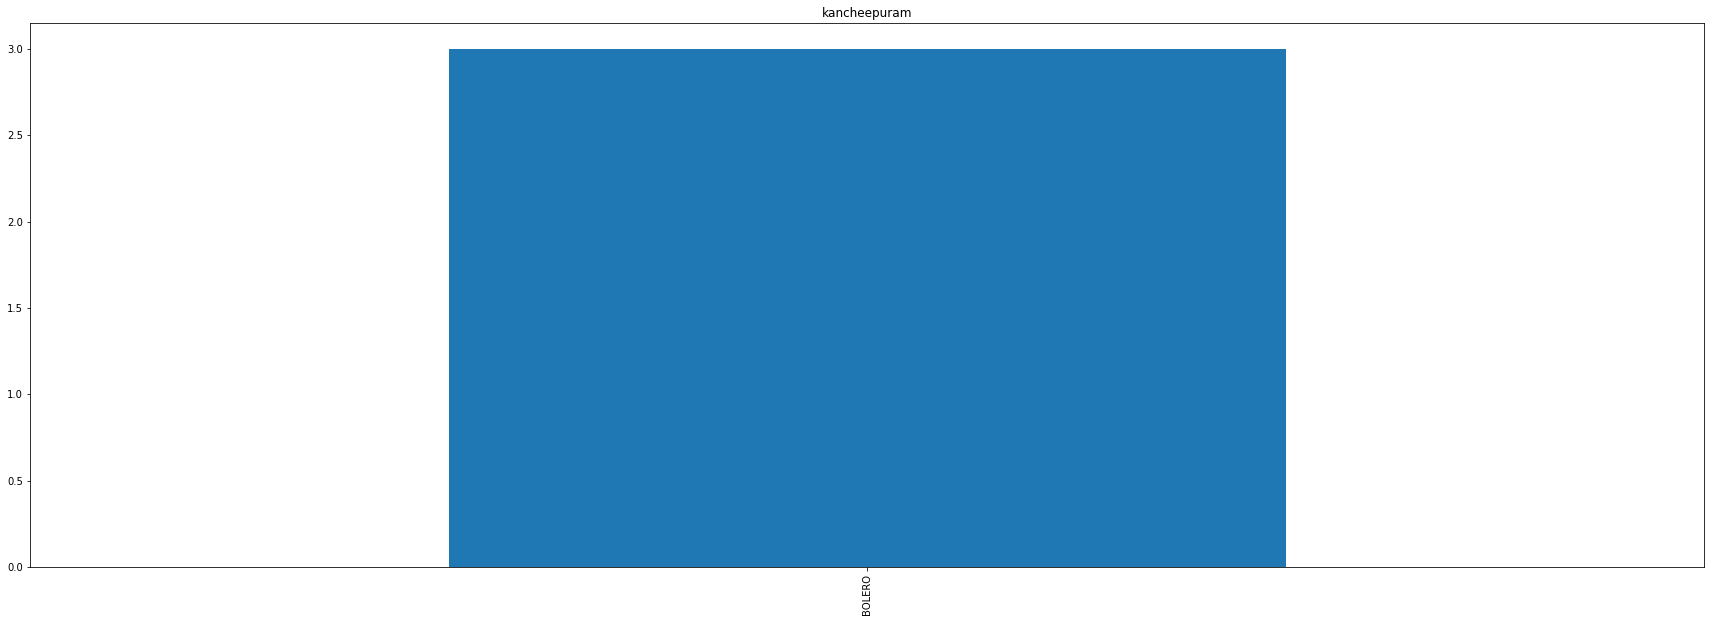

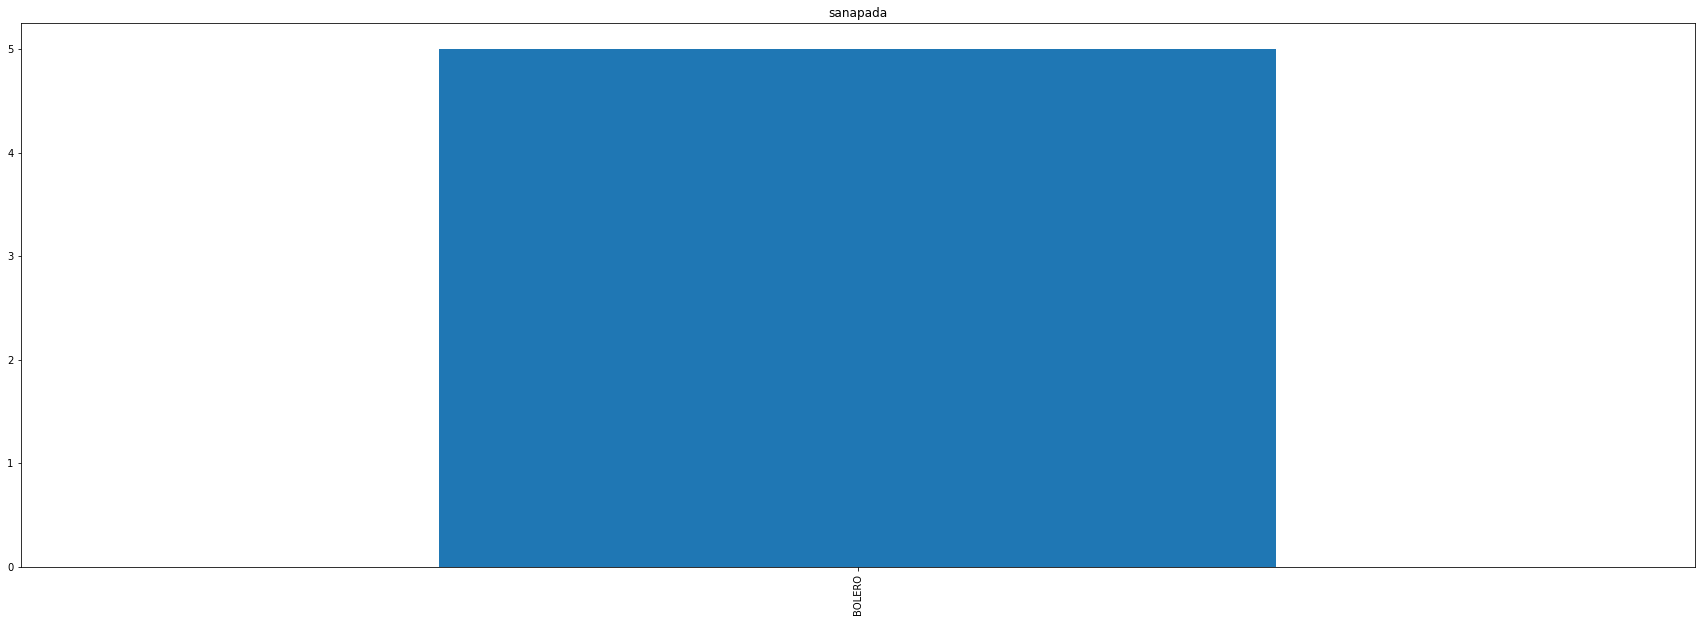

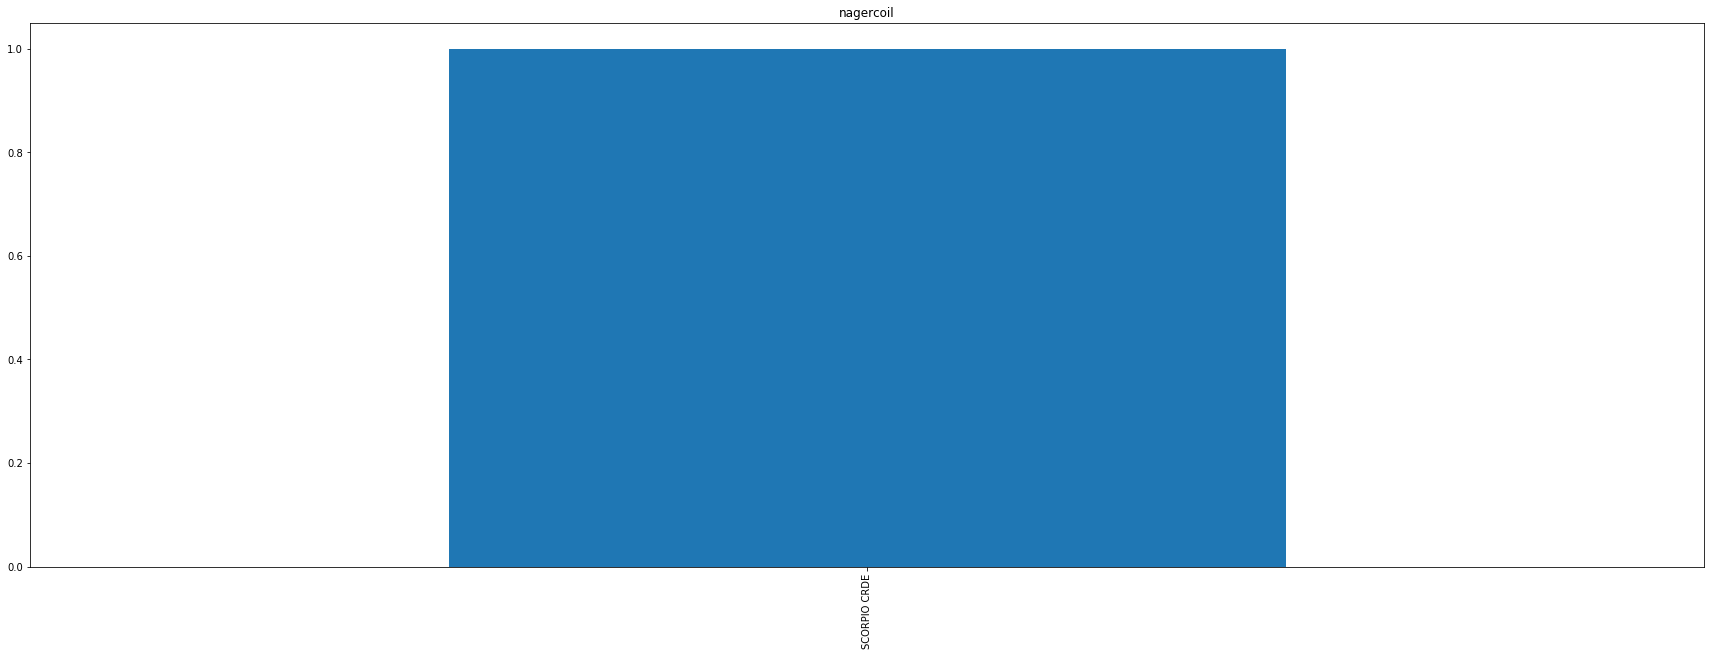

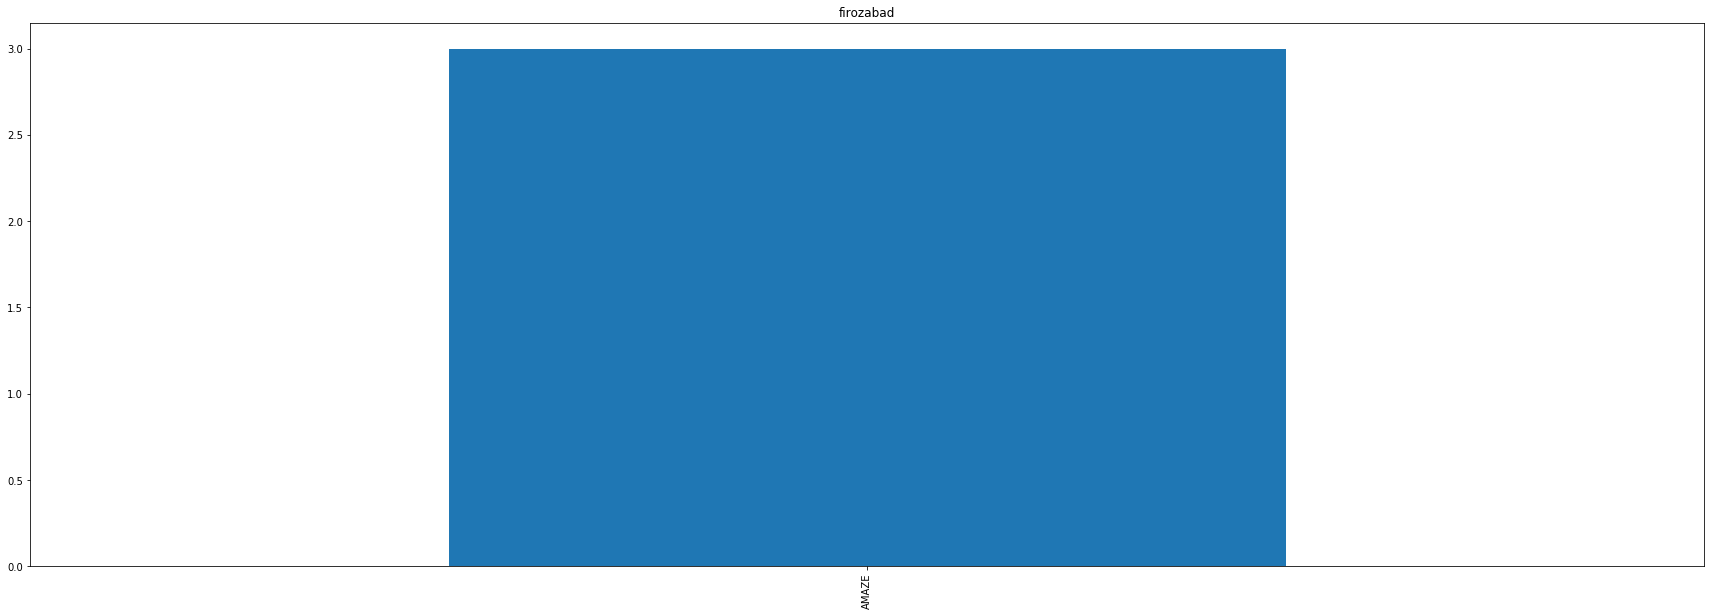

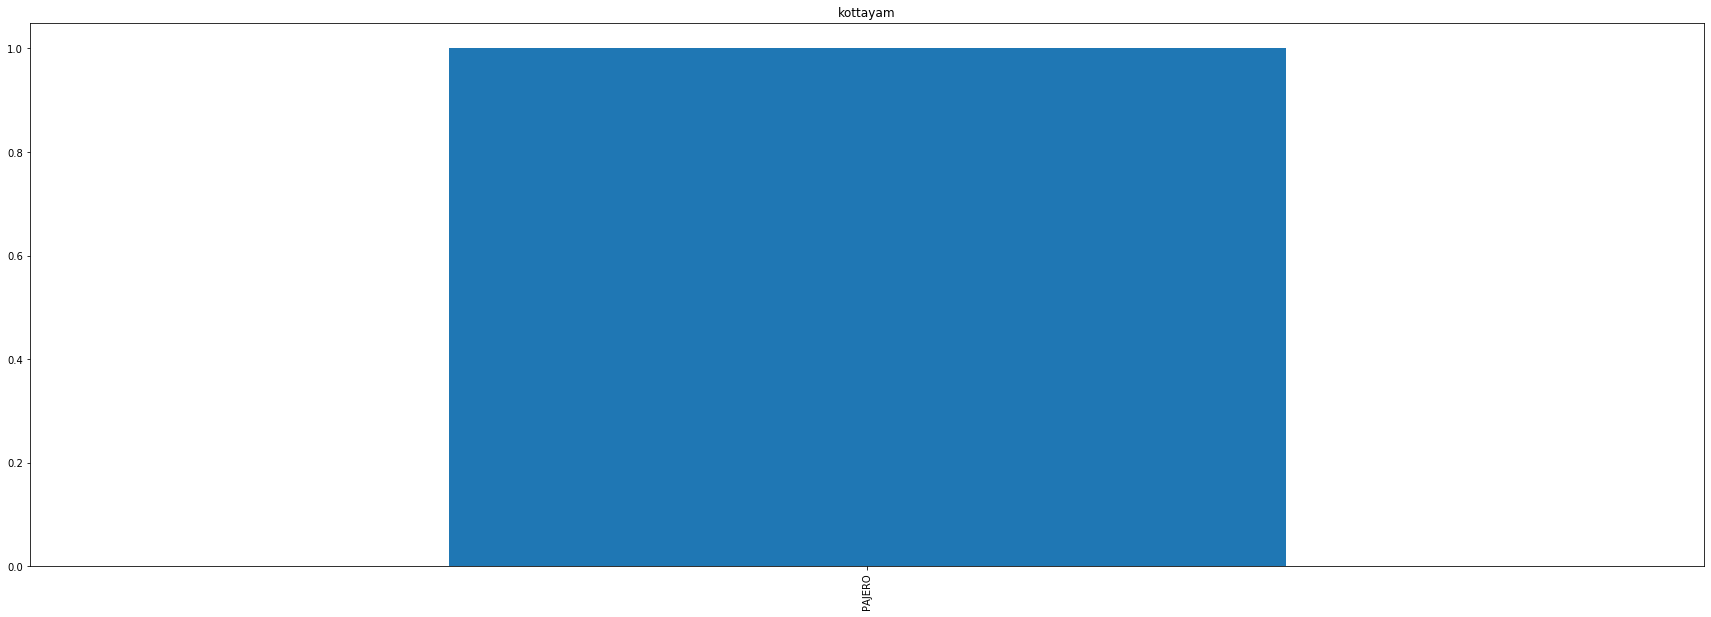

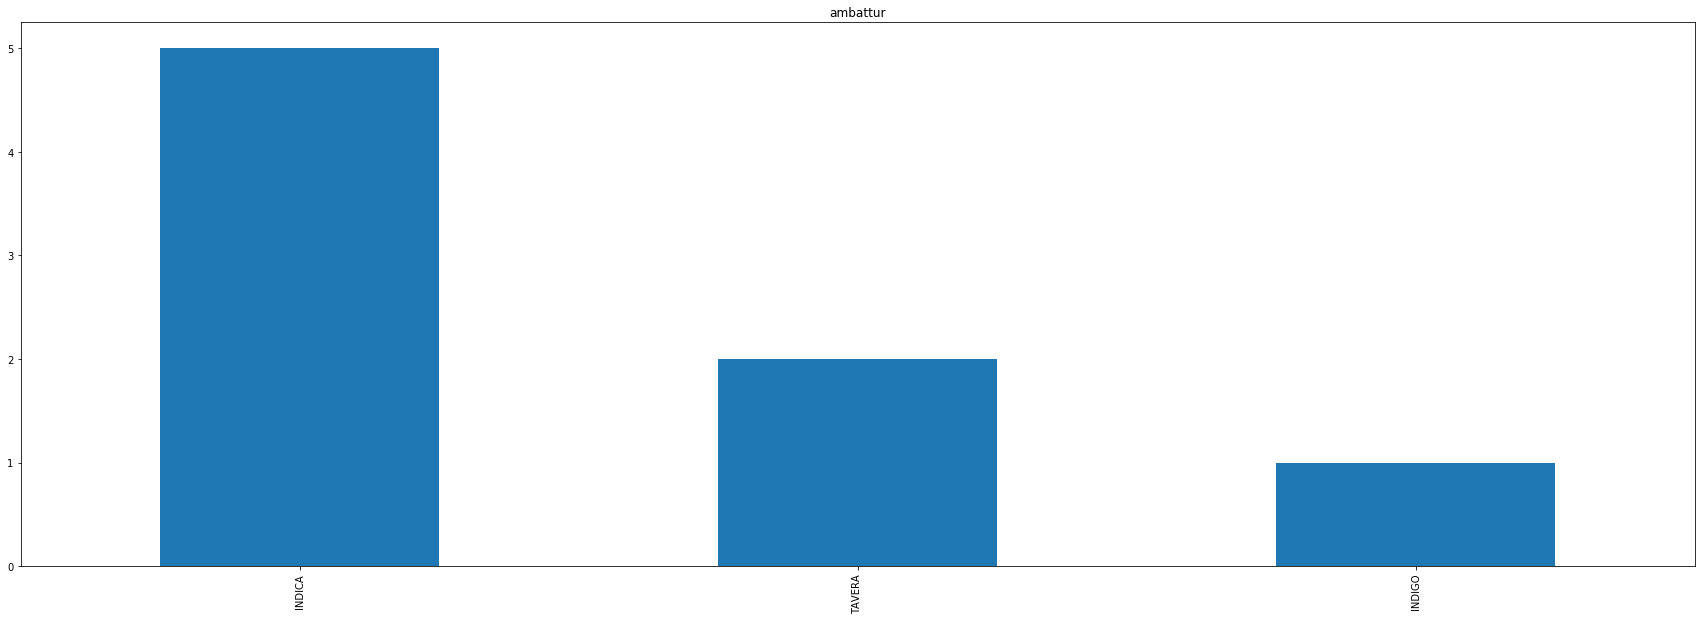

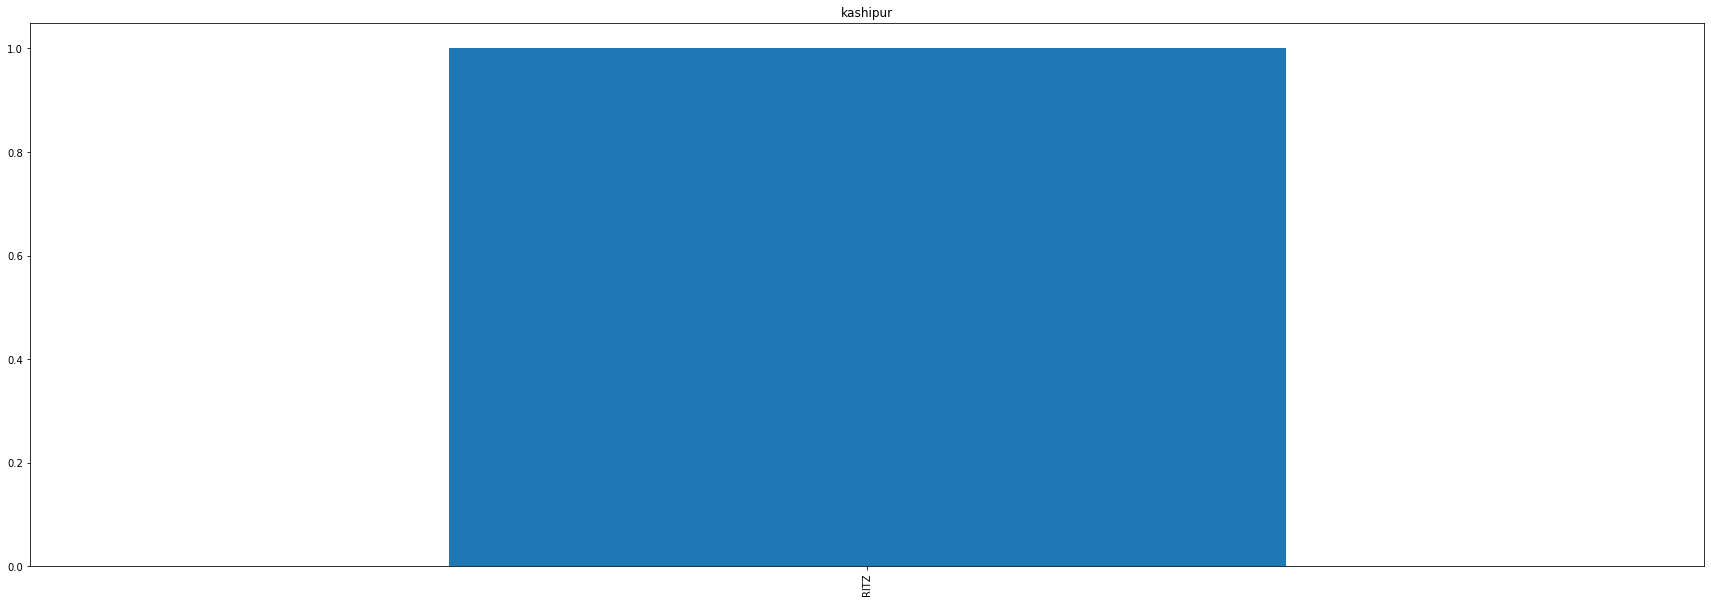

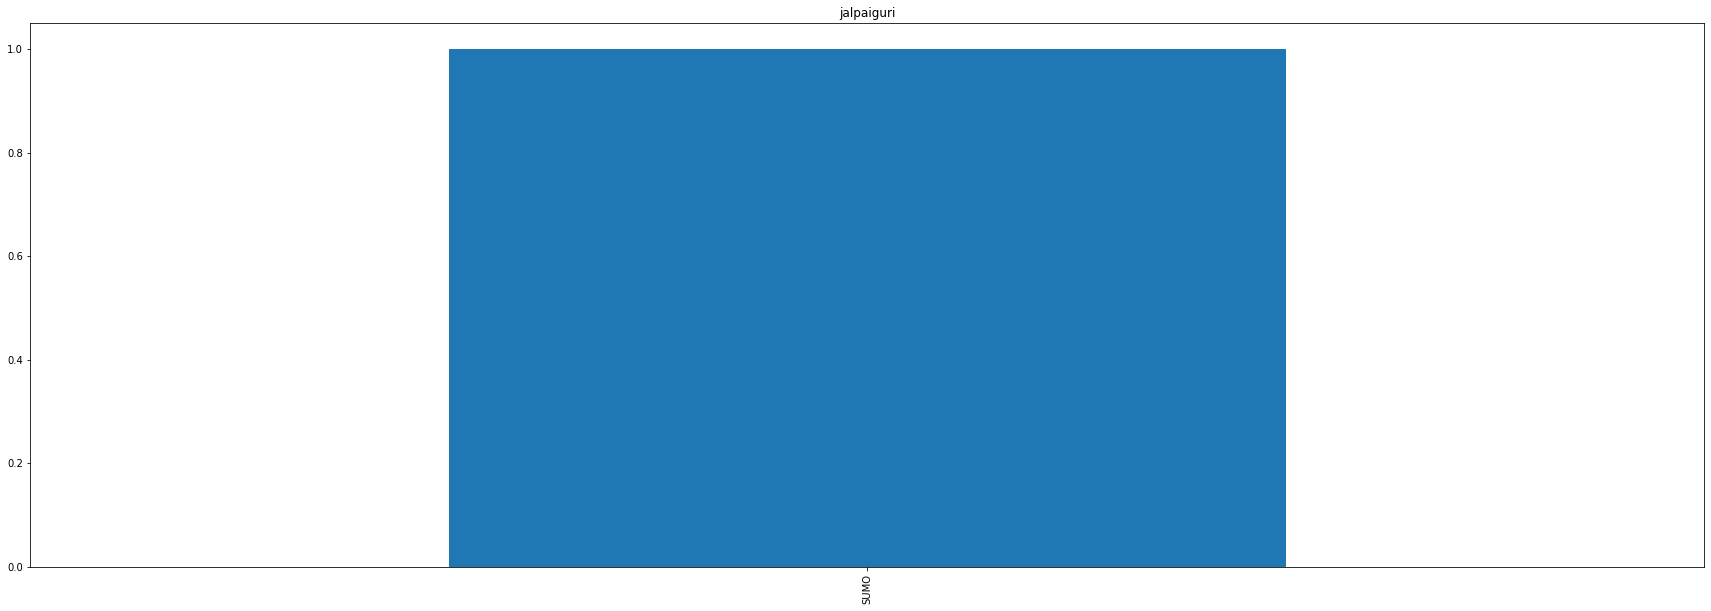

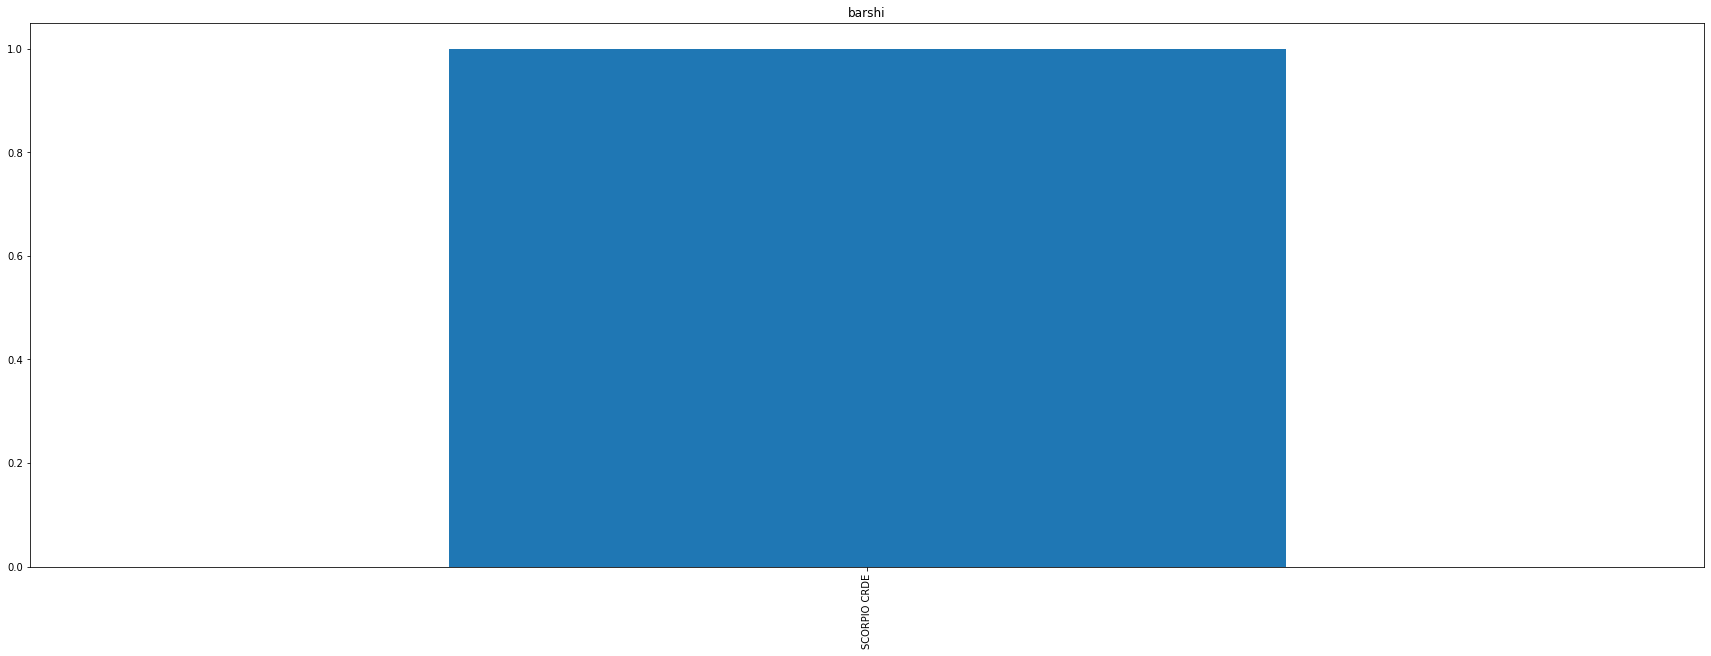

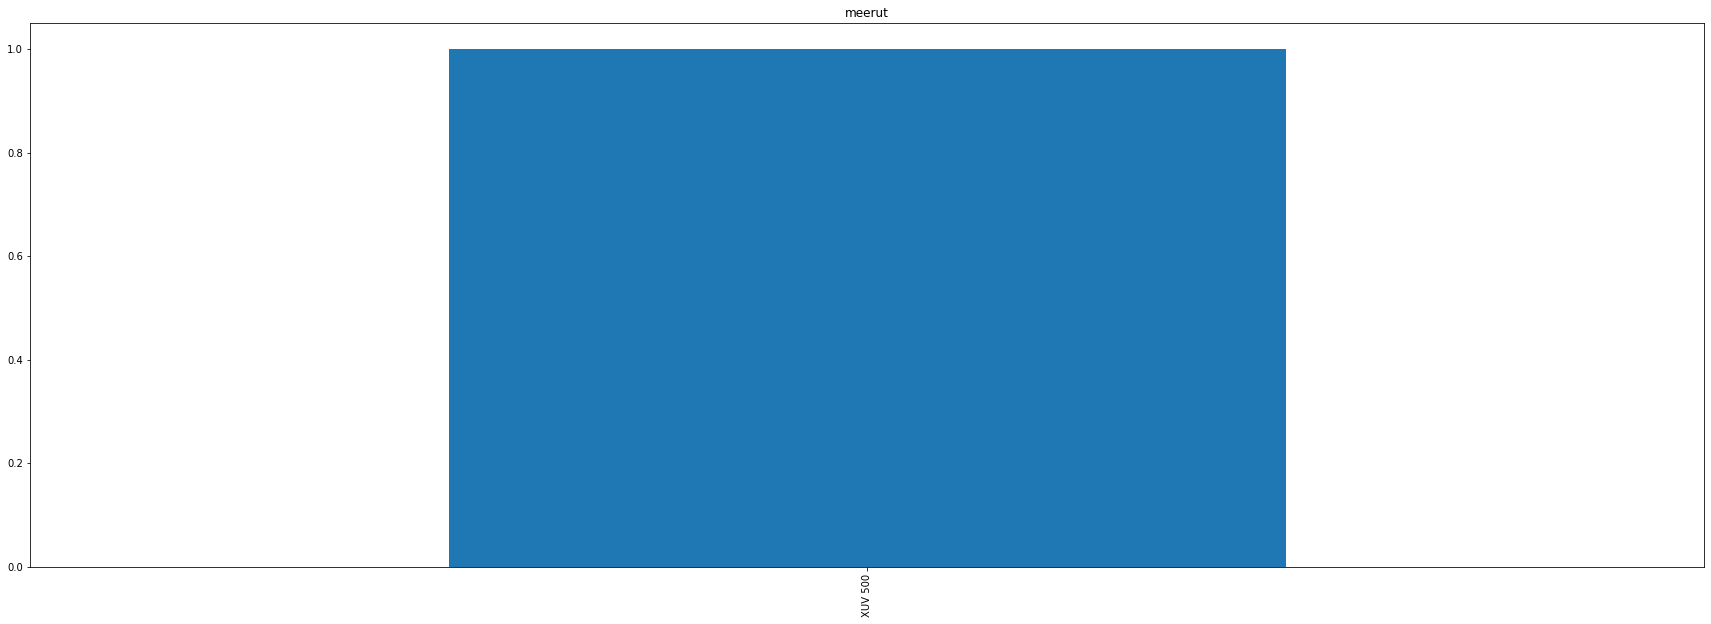

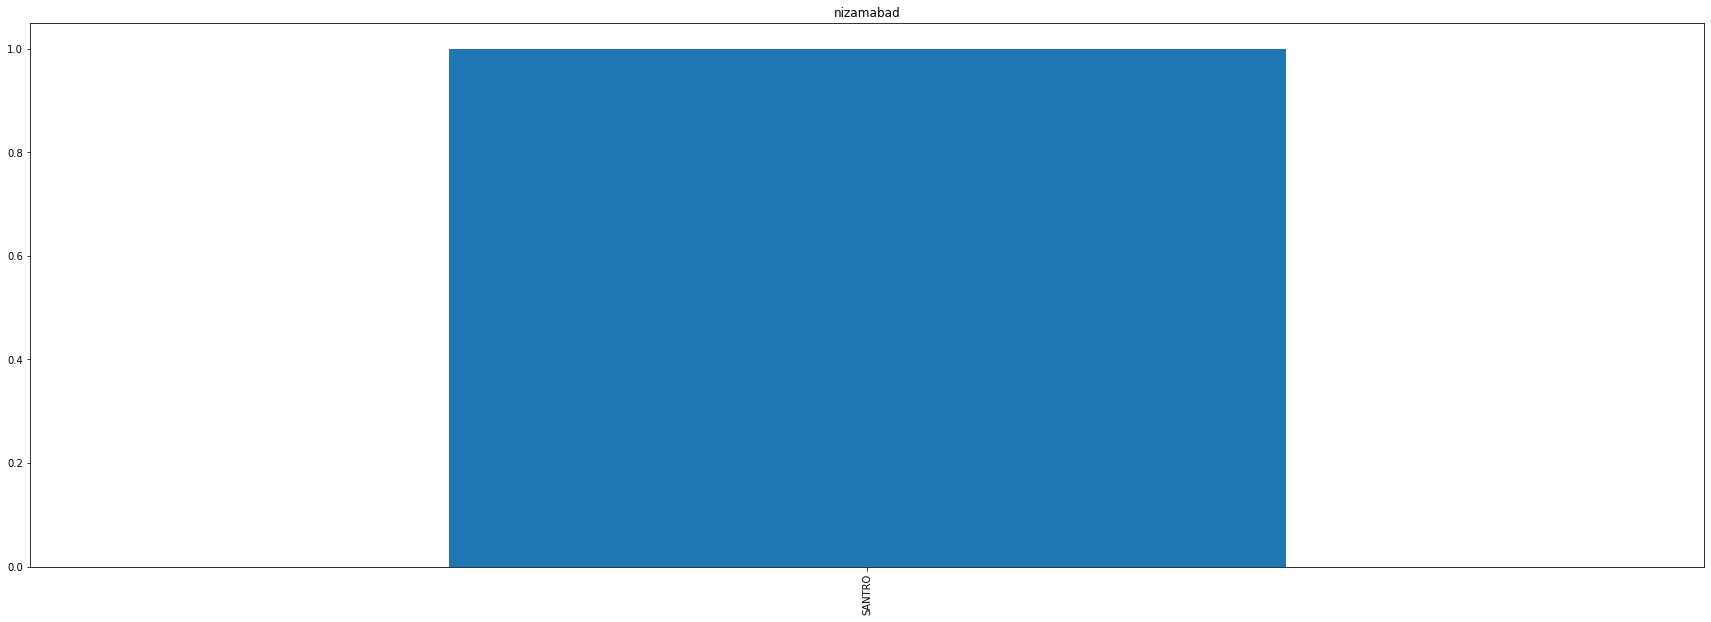

In [59]:
custinv['Model']=custinv['Model'].fillna('Others')
city=[]
city=custinv['CITY'].unique()
for i in city:
    cars=custinv[custinv['CITY']==i]
    
    fig=plt.figure(figsize=(30,10))
    plt.title(i)
    cars['Model'].value_counts().plot(kind='bar')
    plt.show()

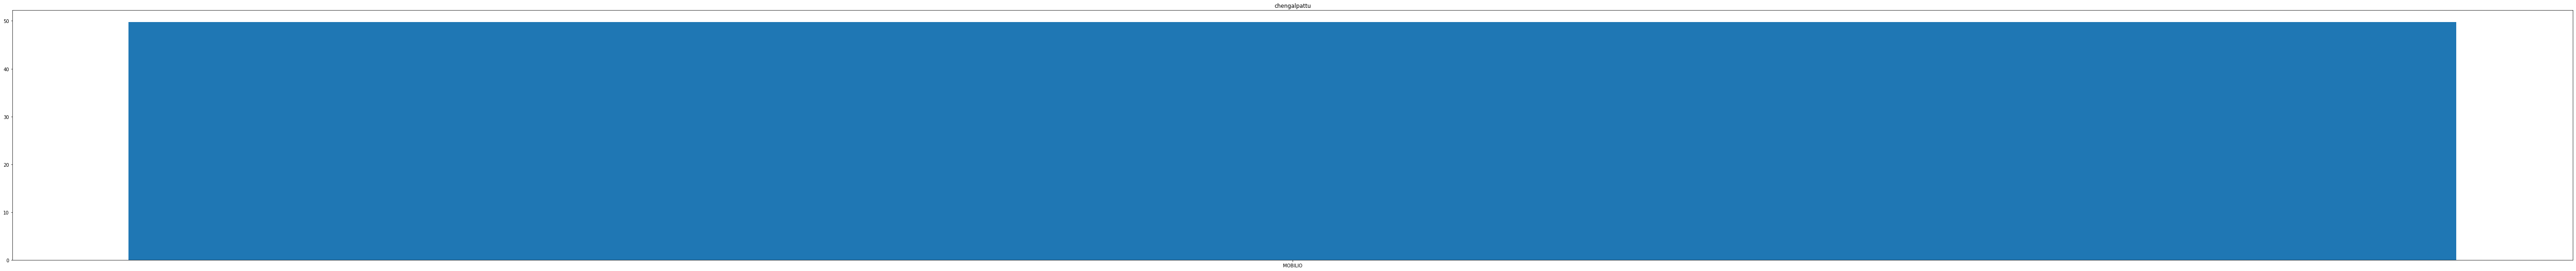

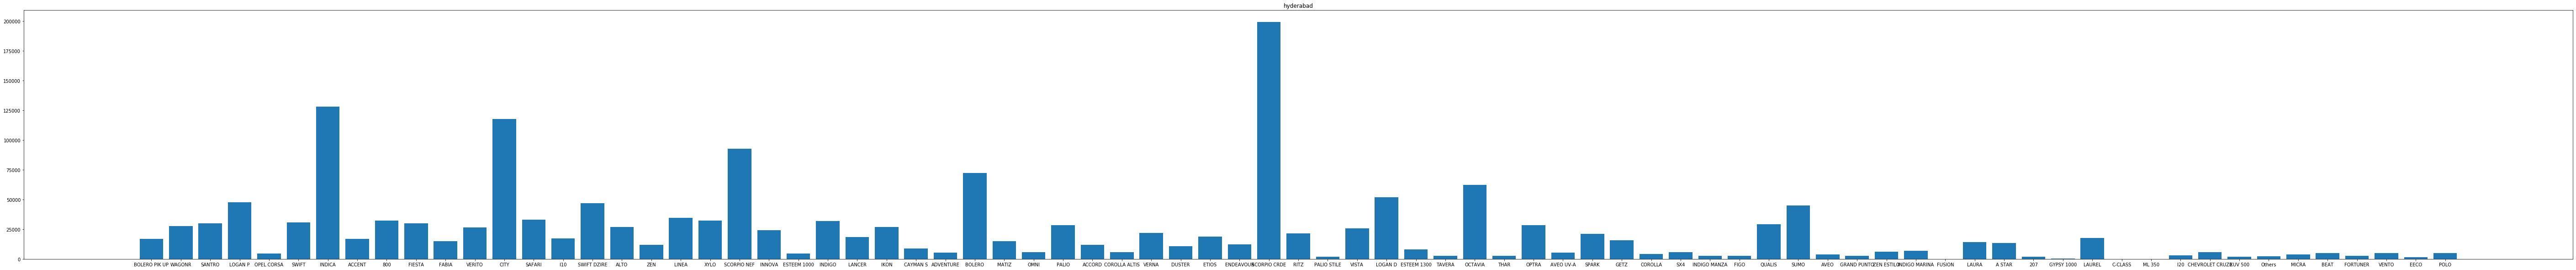

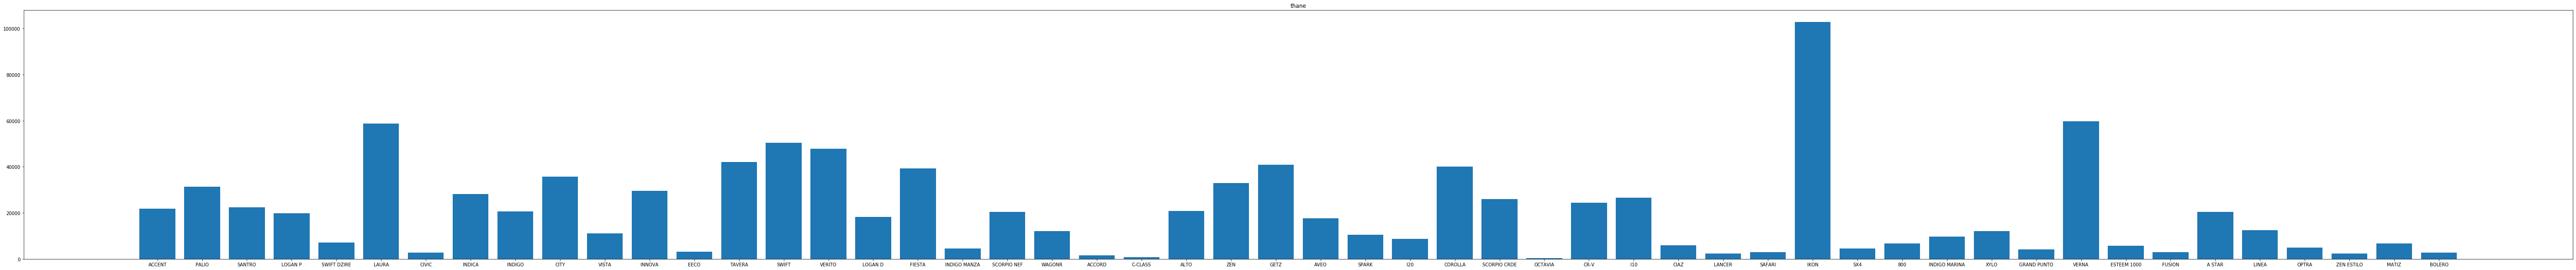

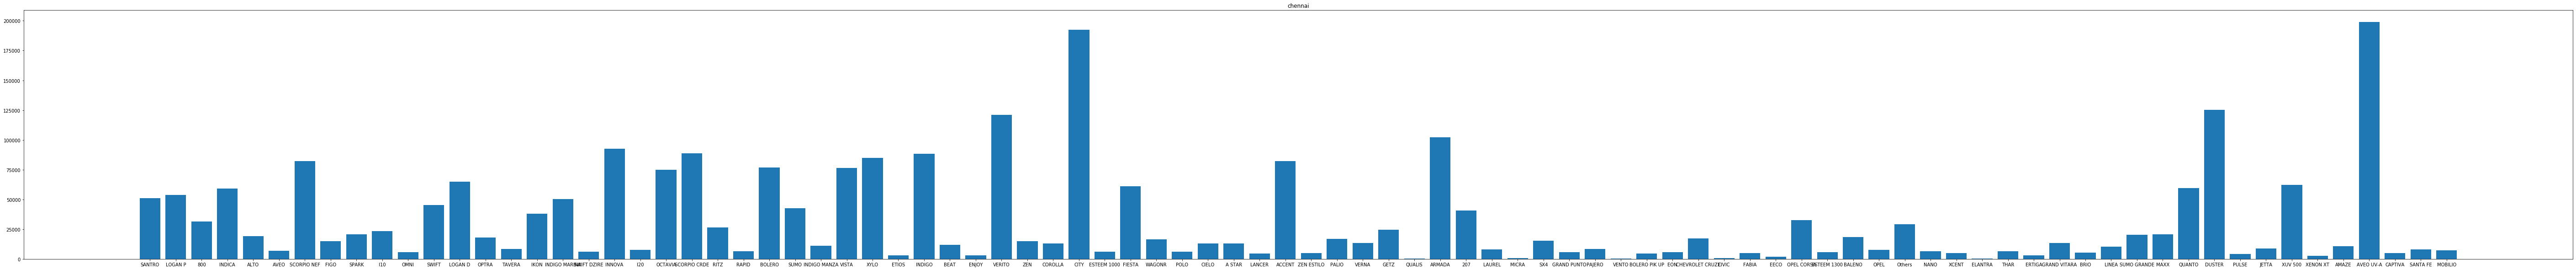

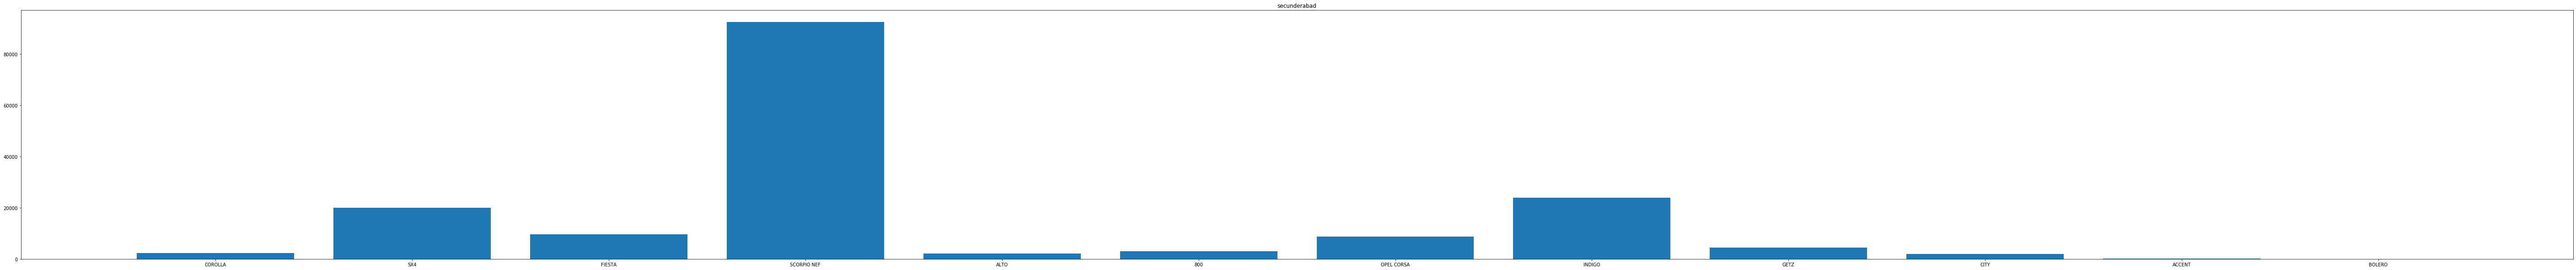

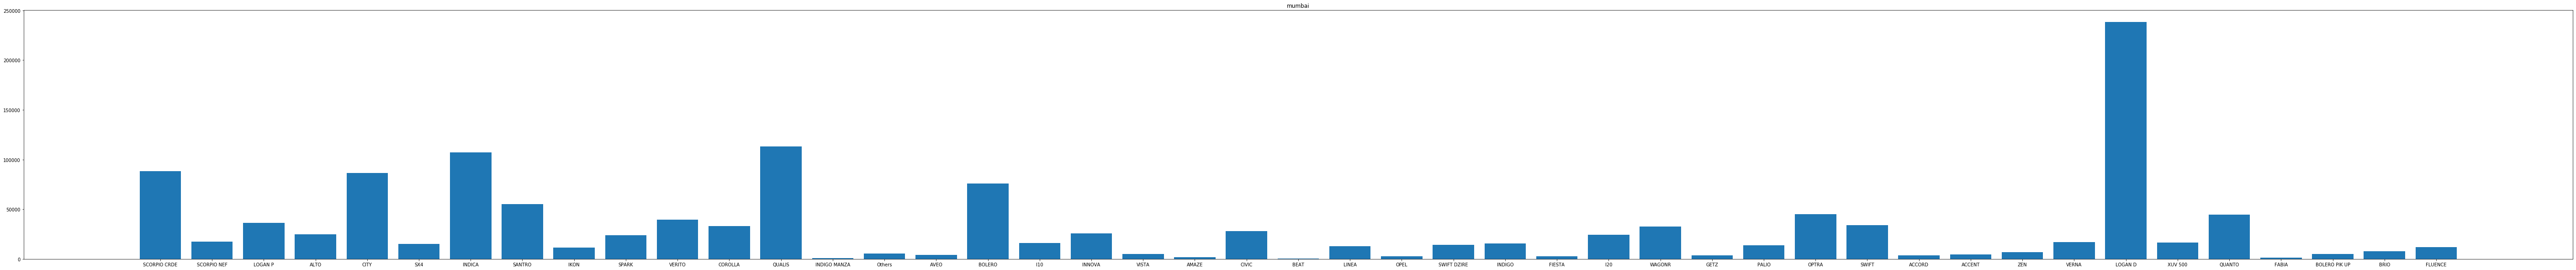

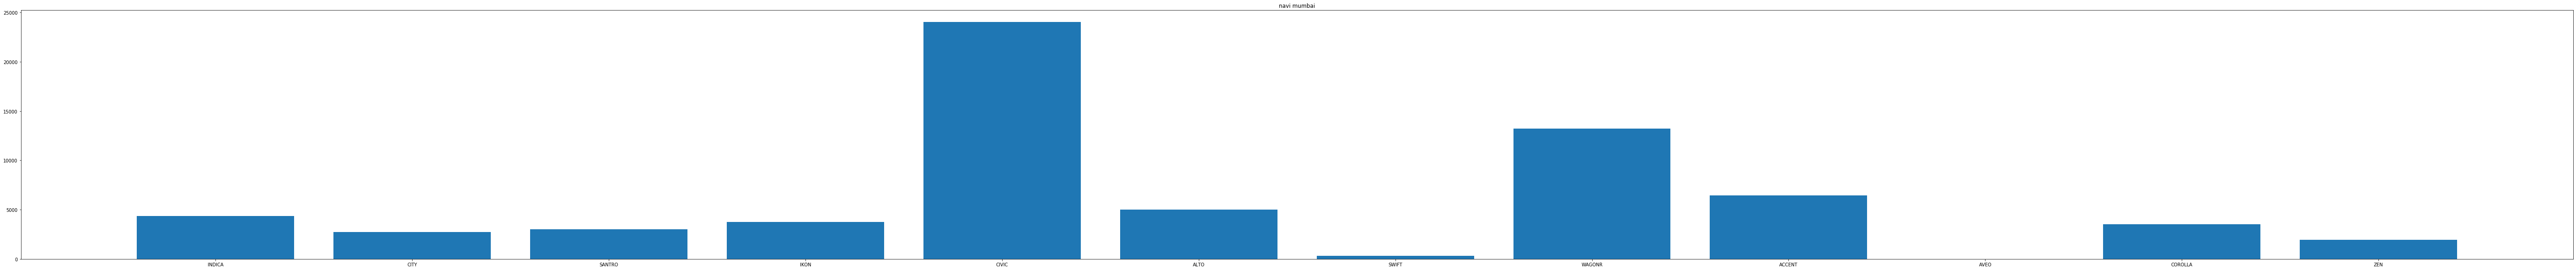

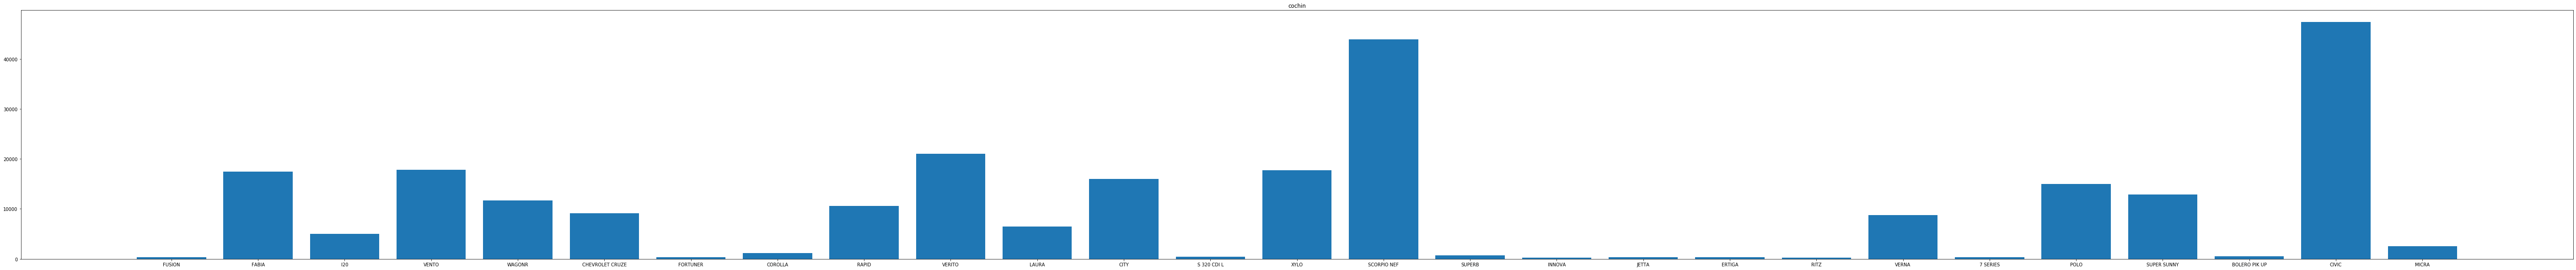

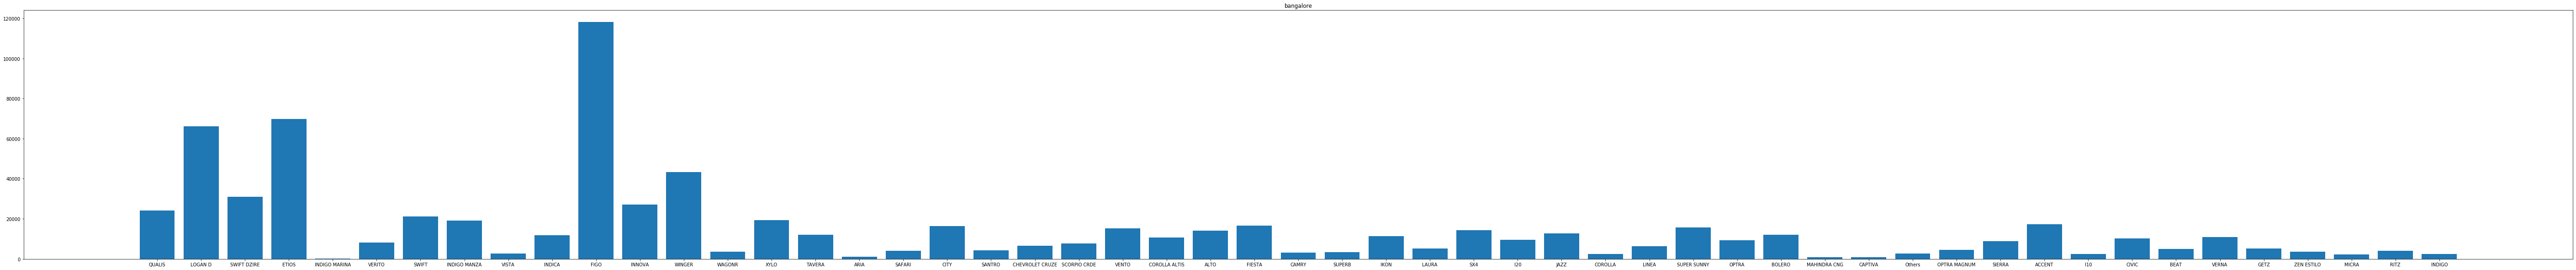

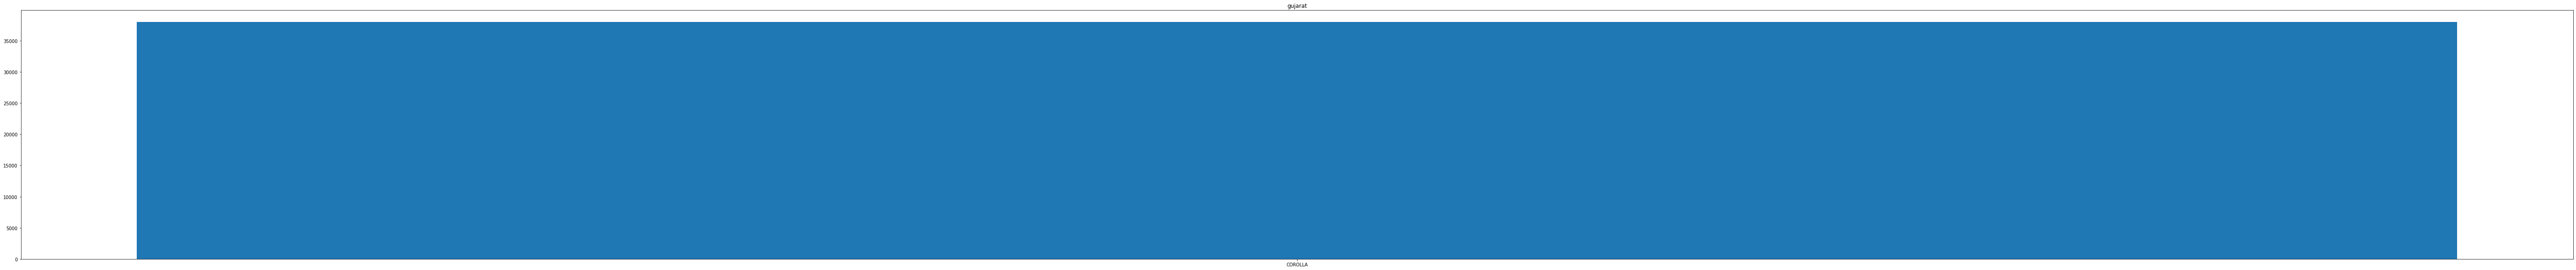

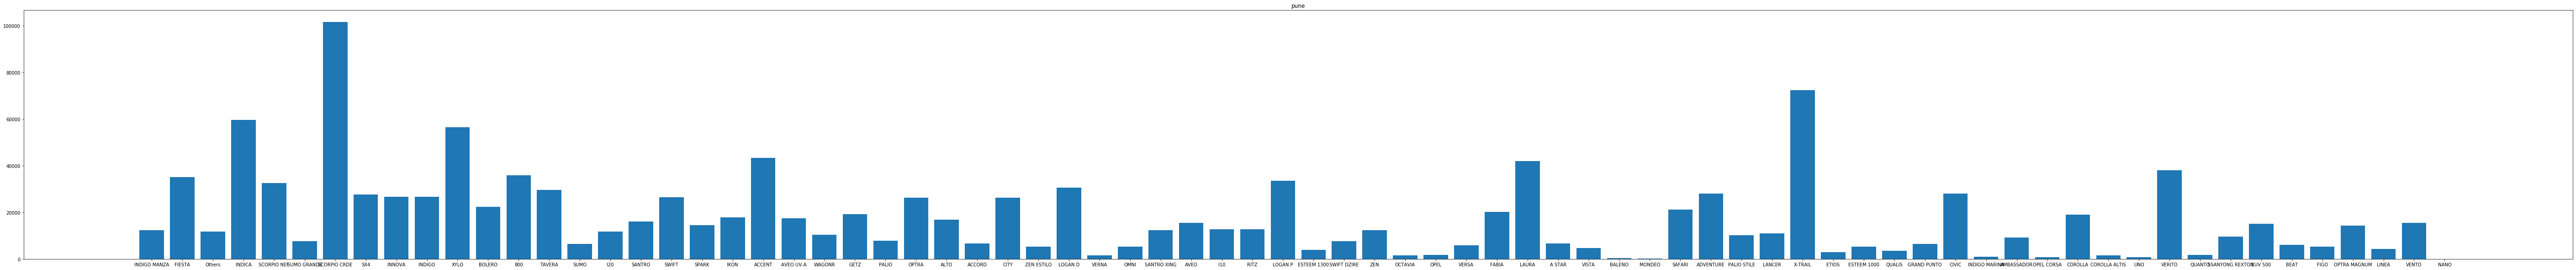

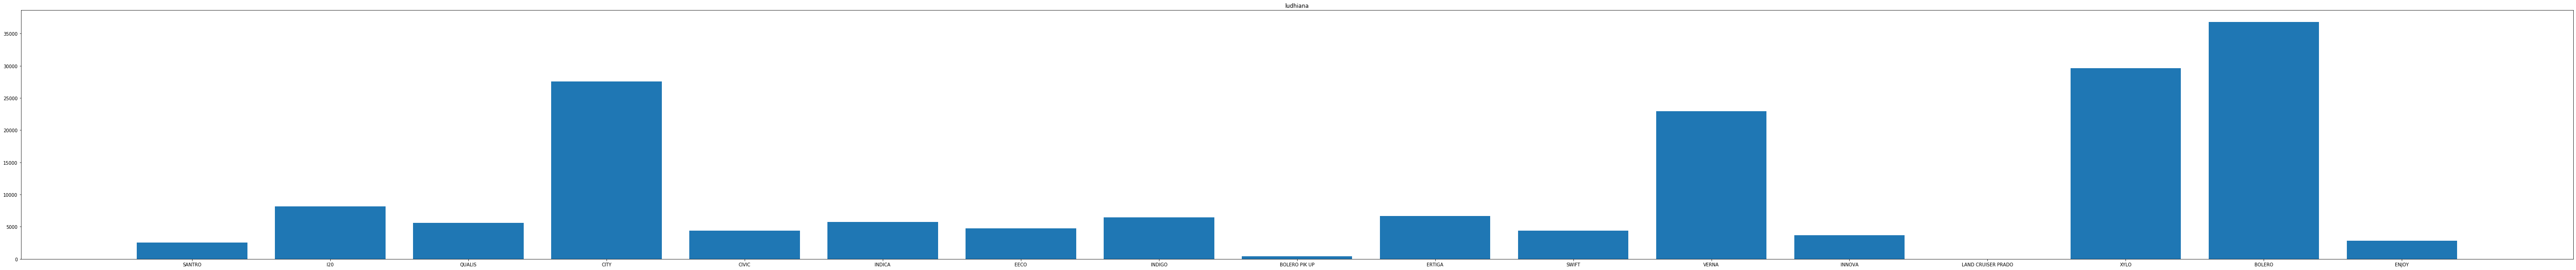

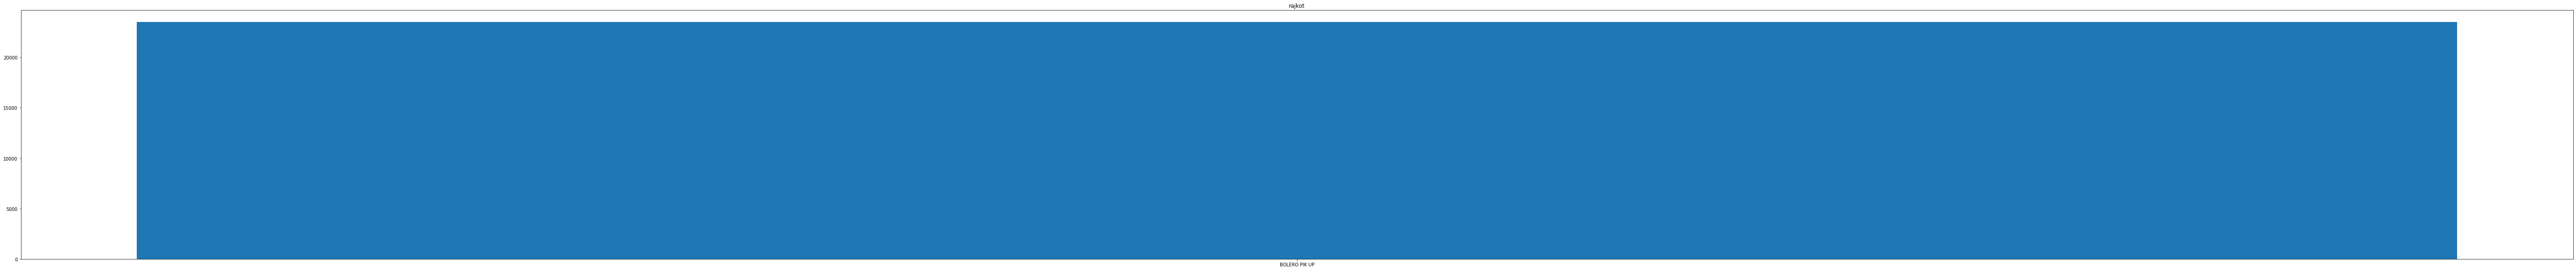

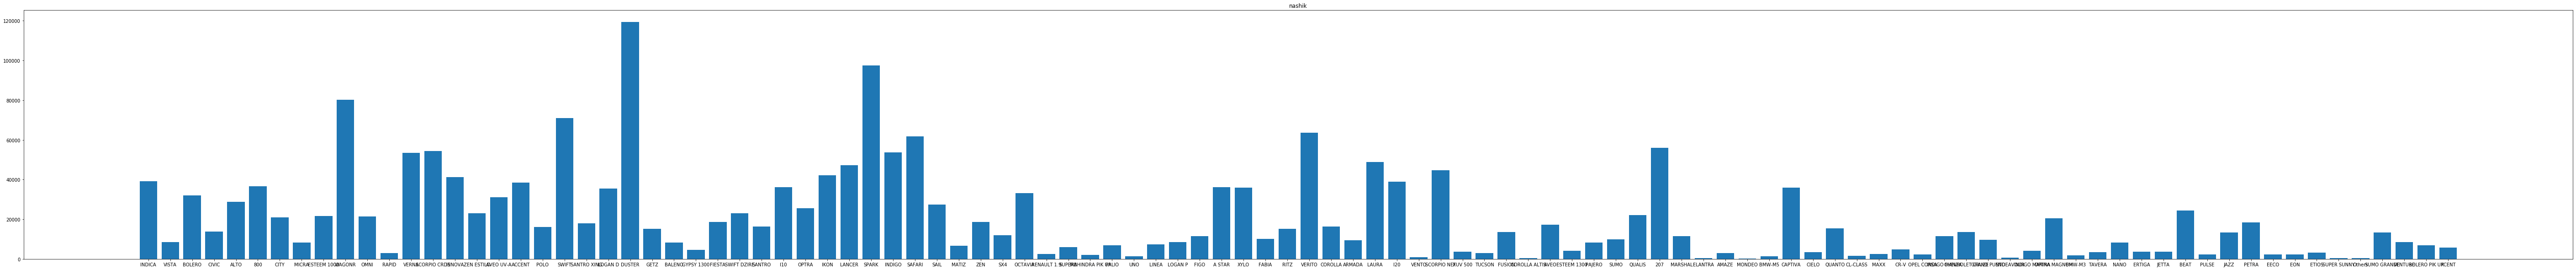

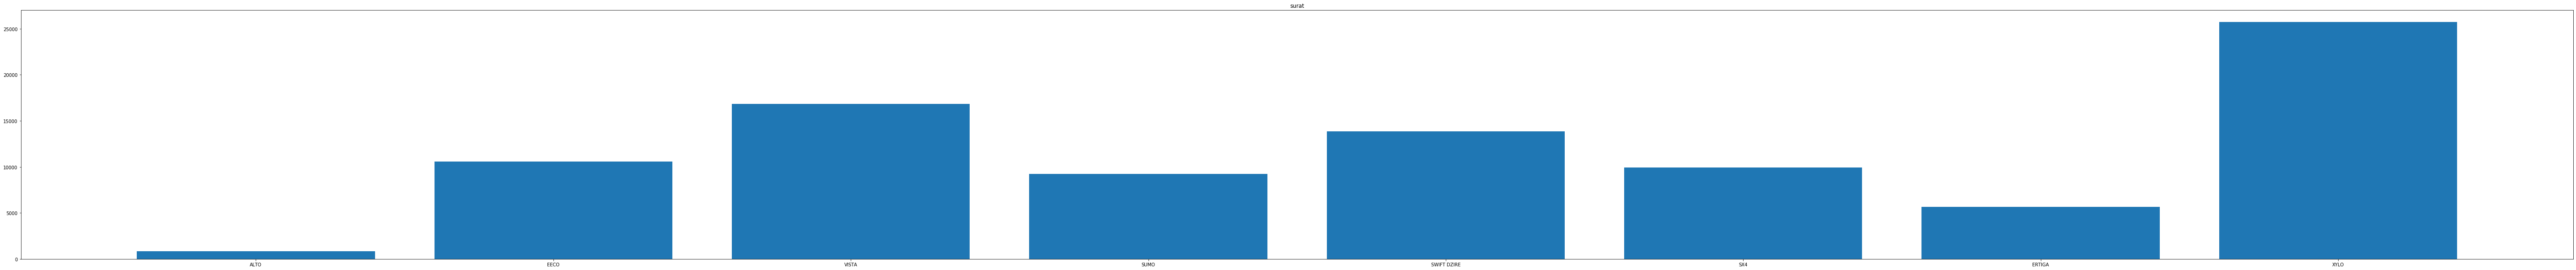

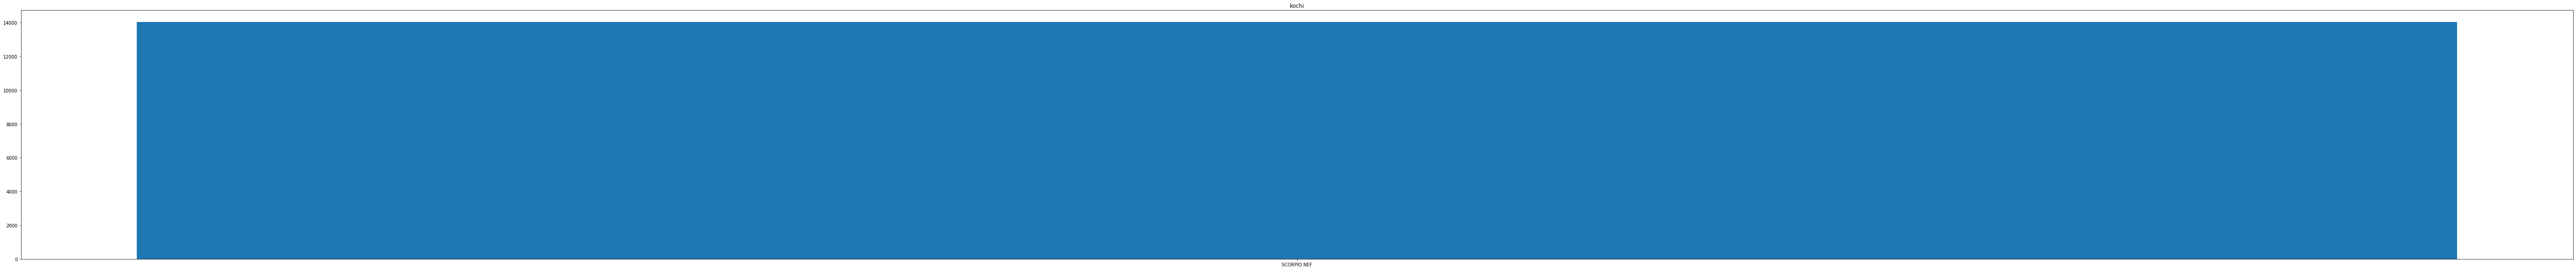

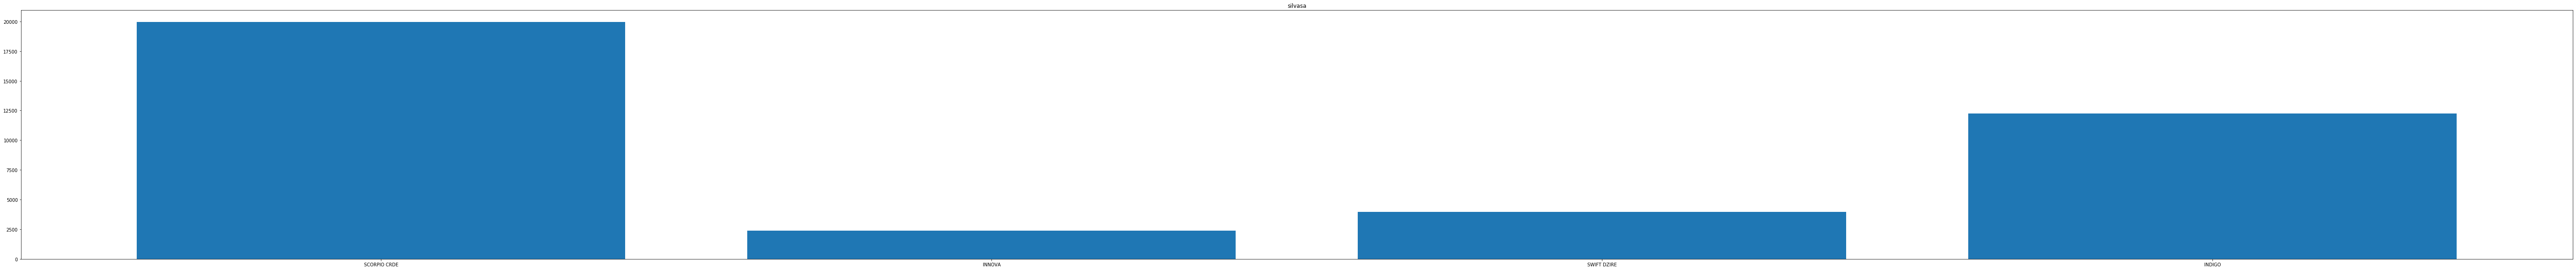

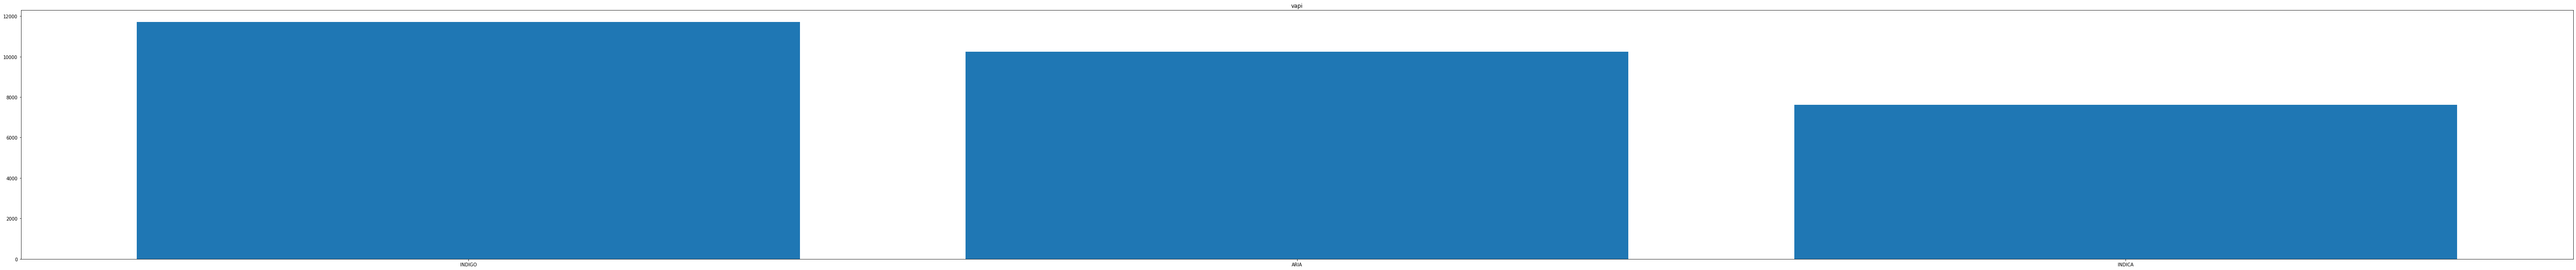

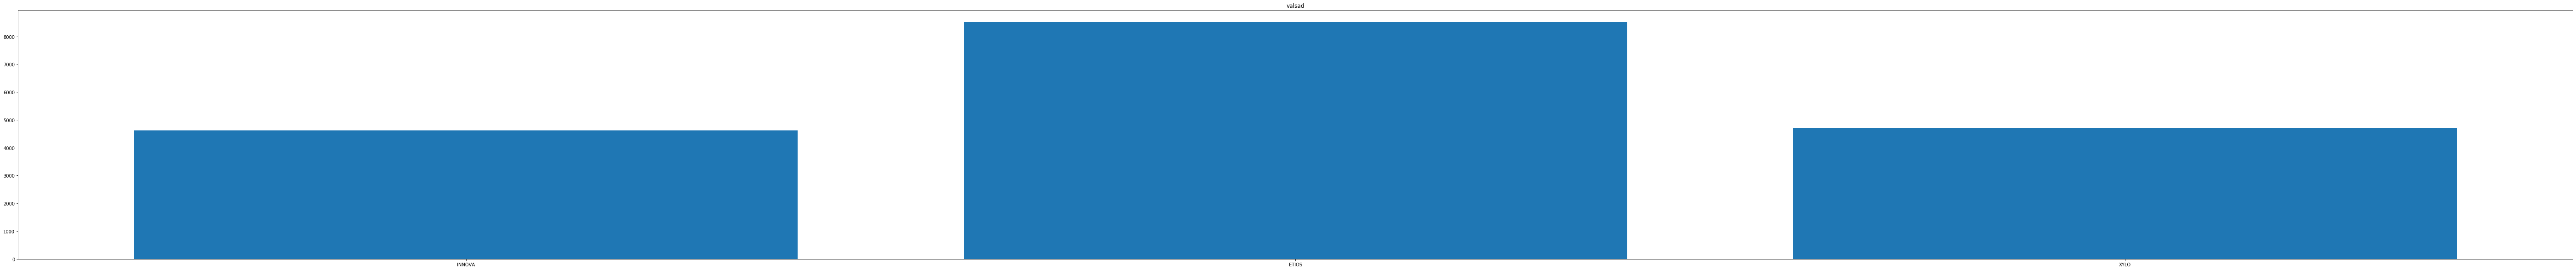

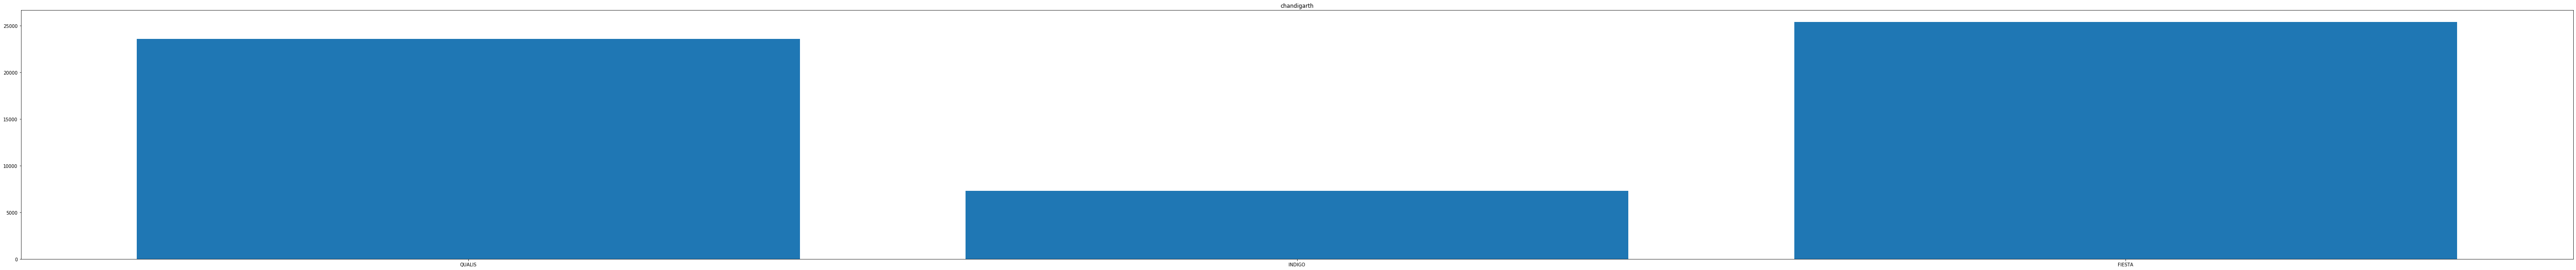

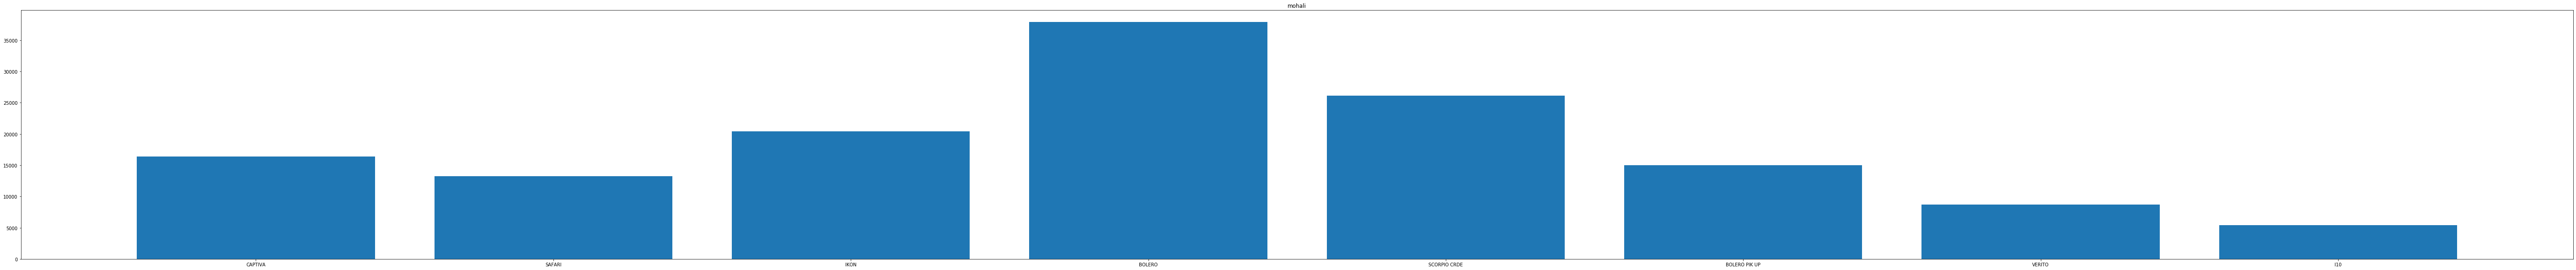

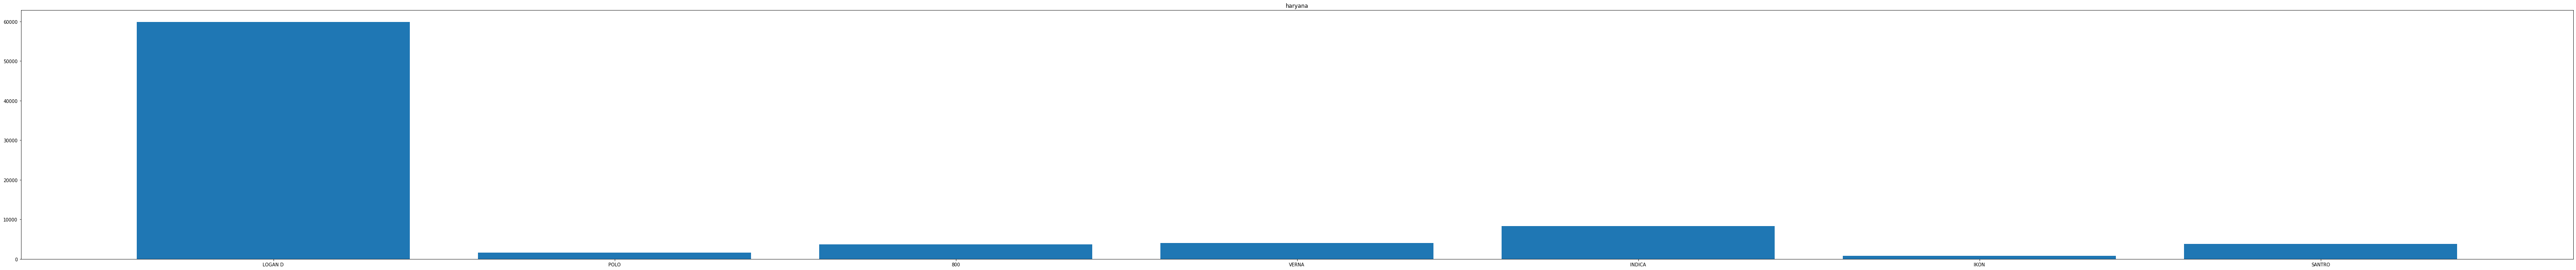

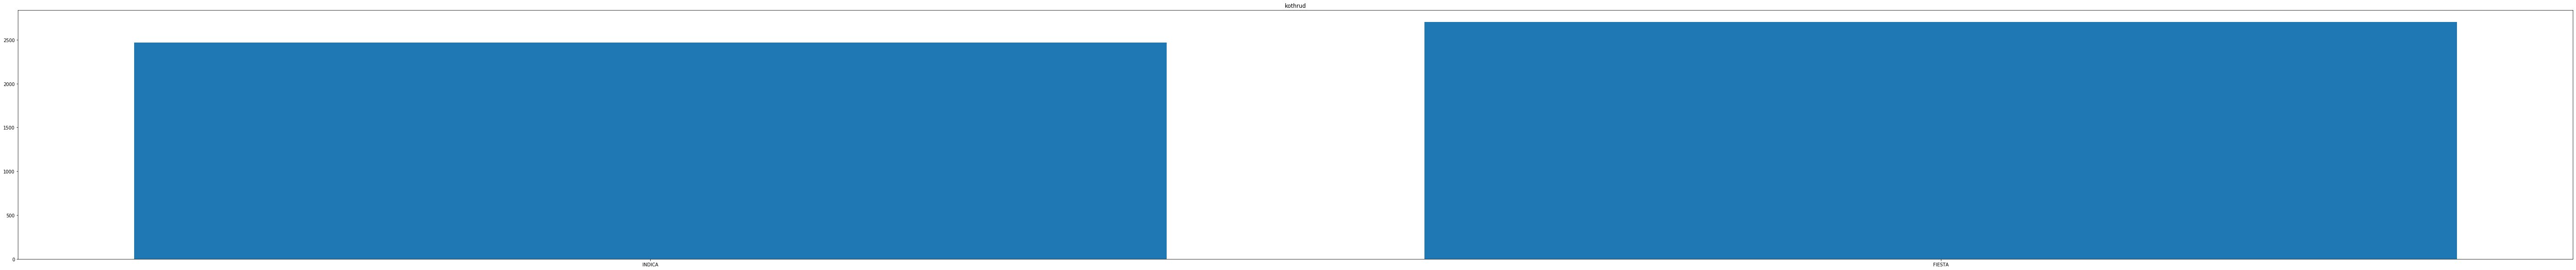

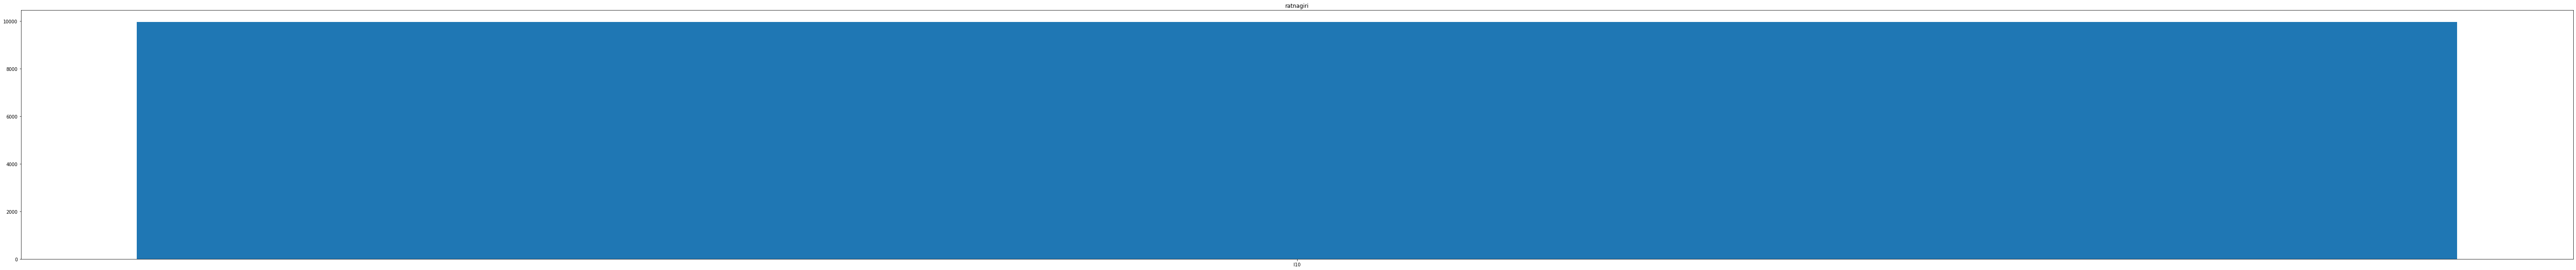

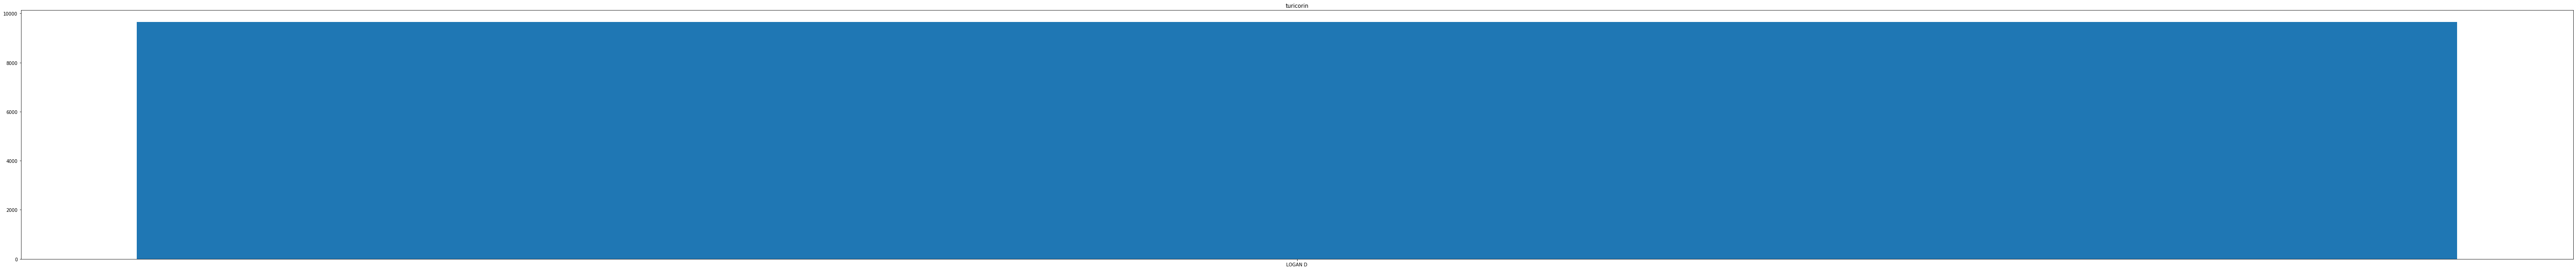

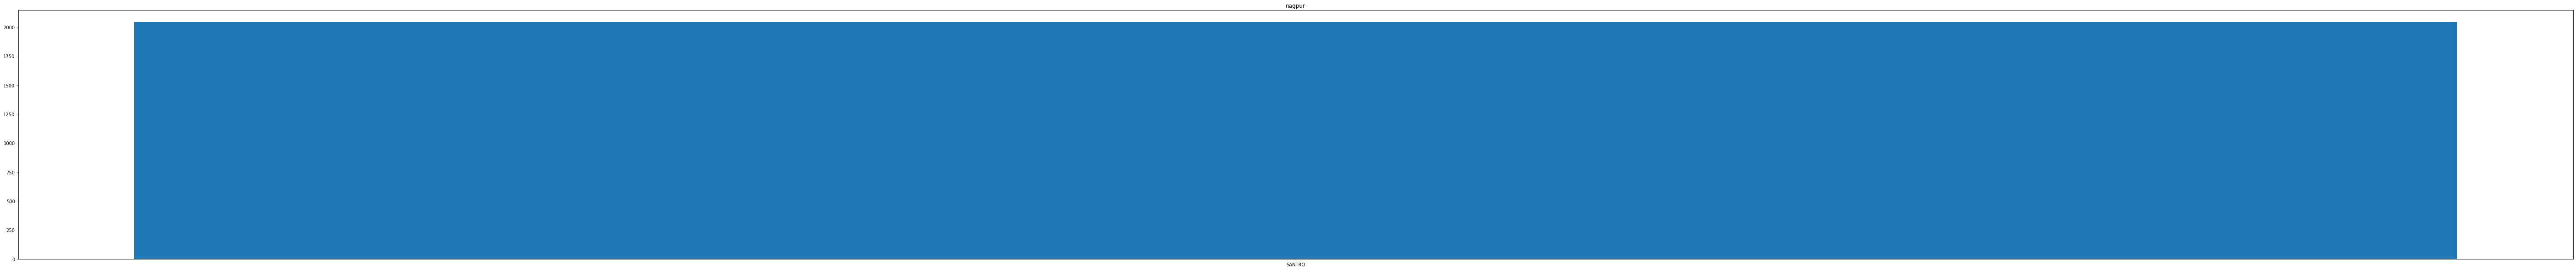

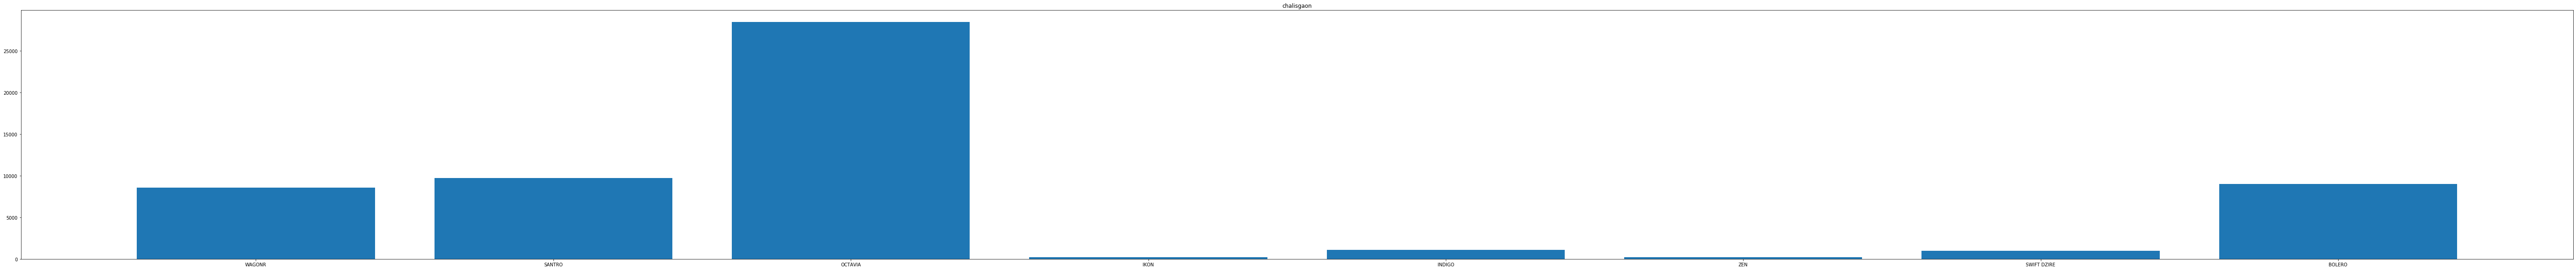

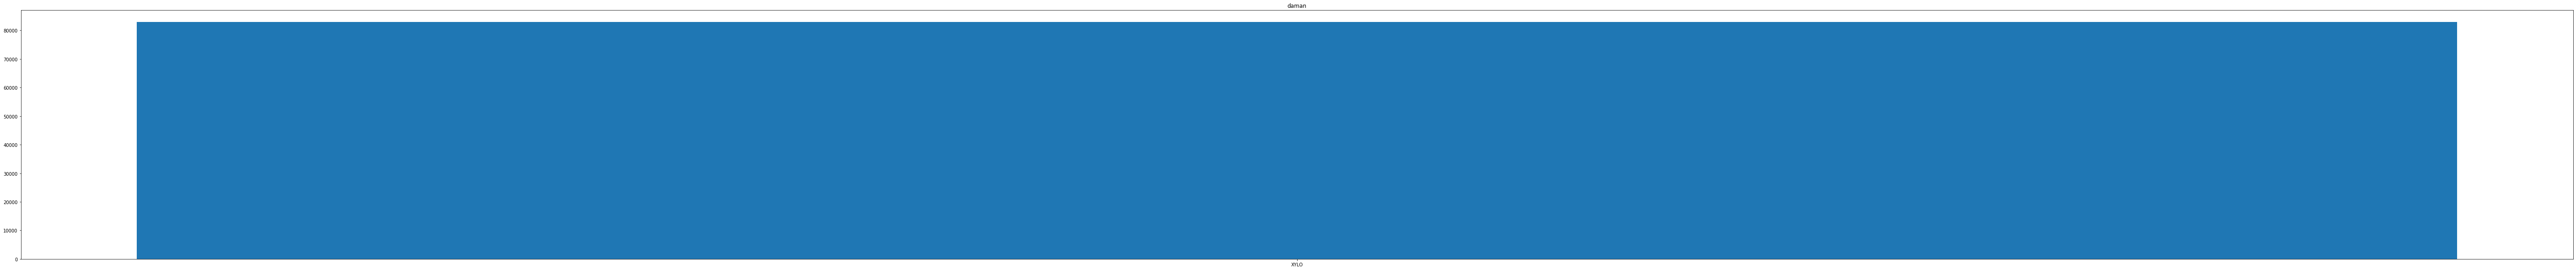

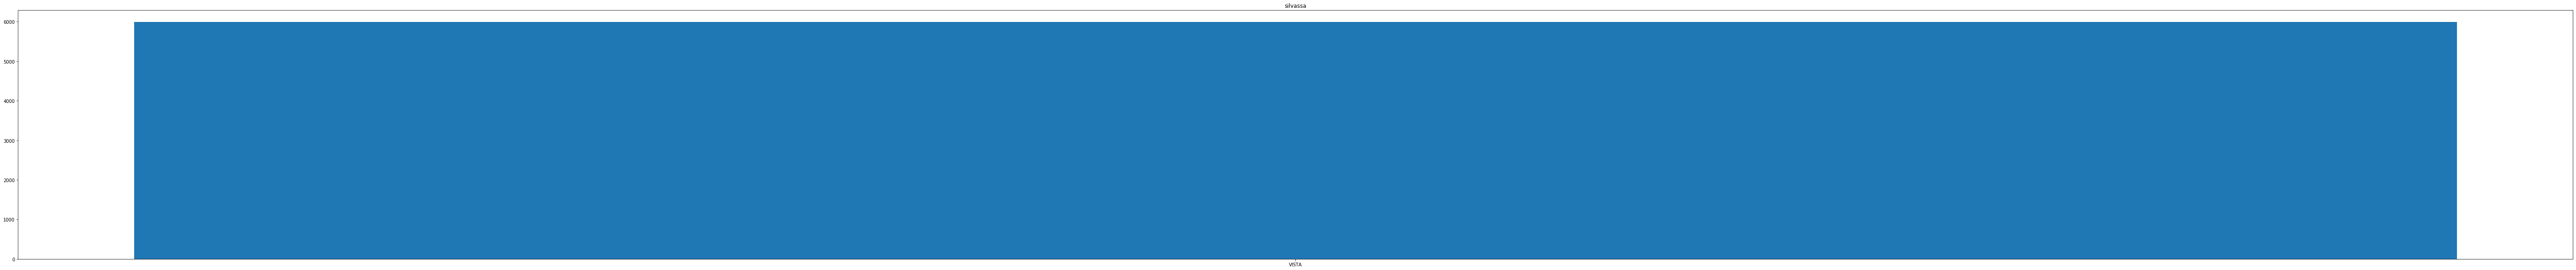

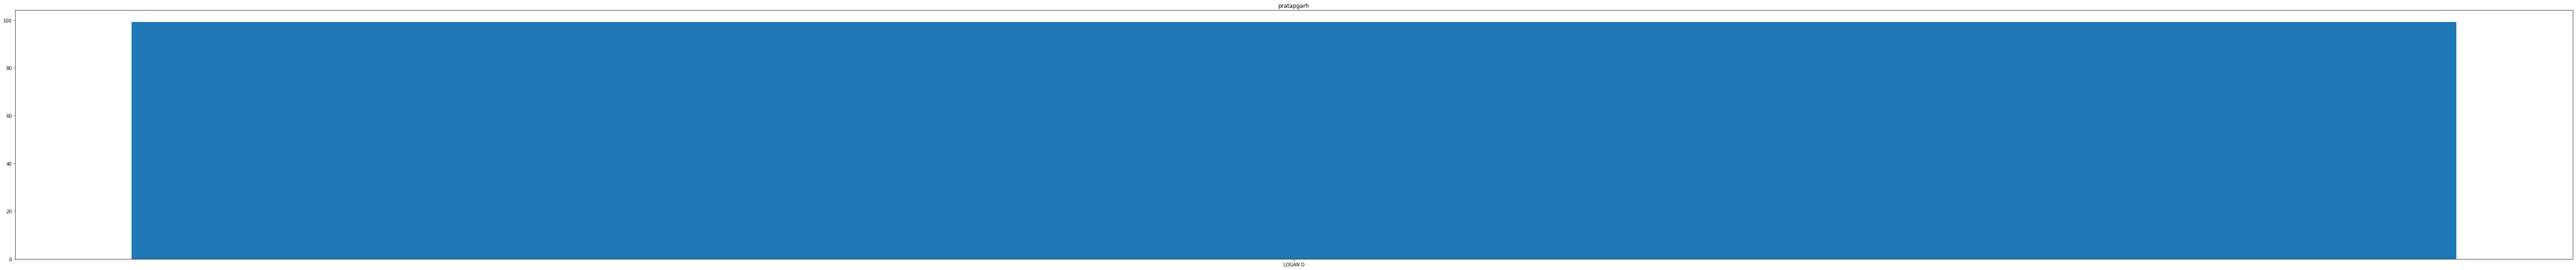

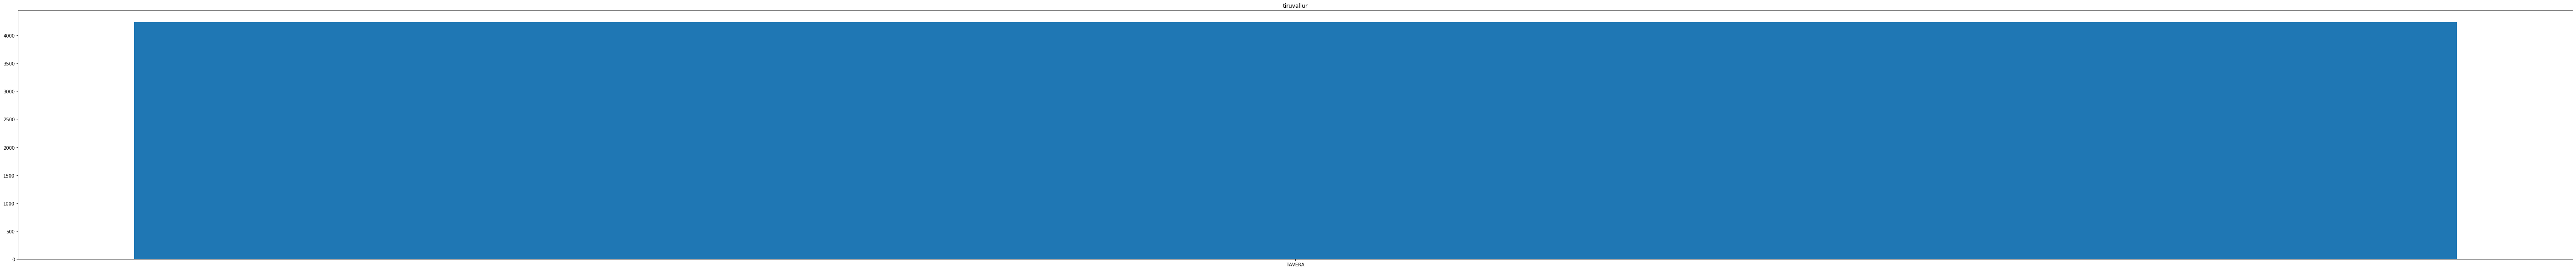

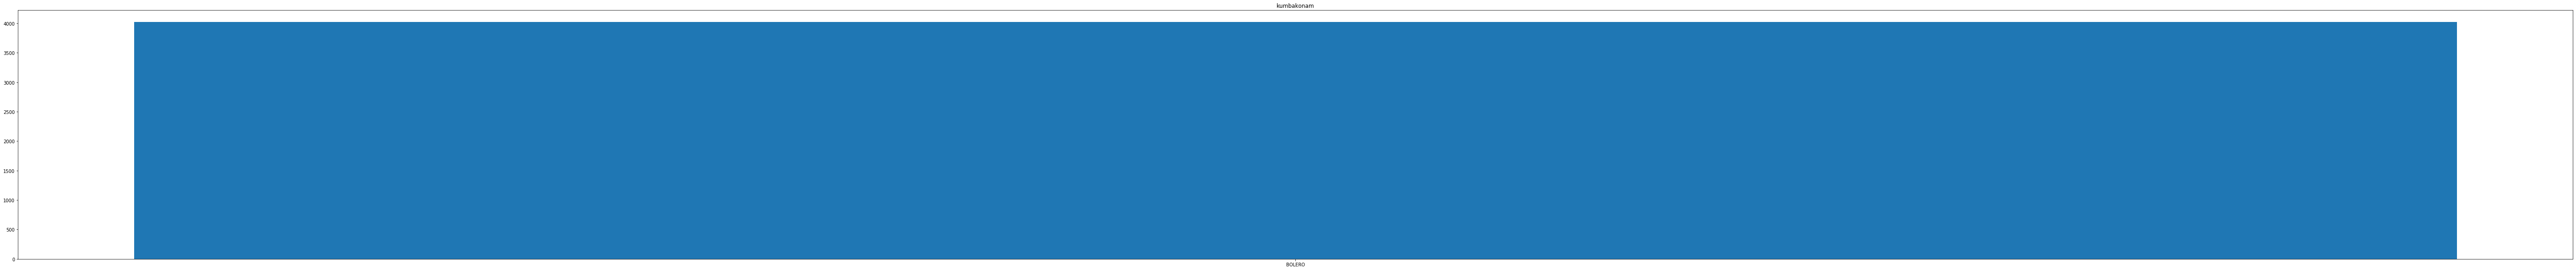

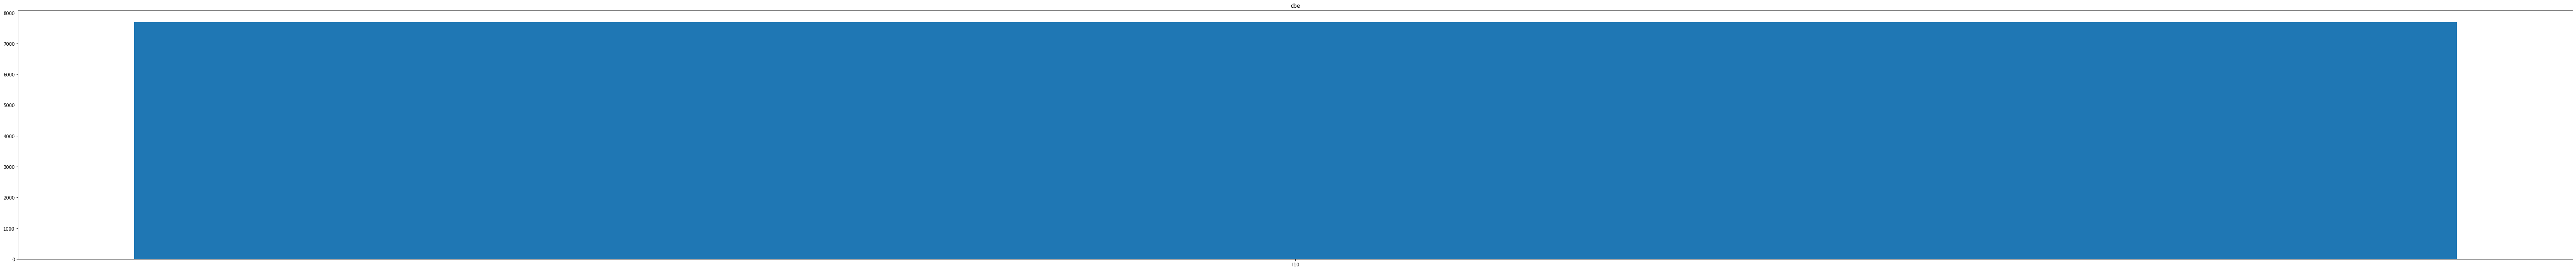

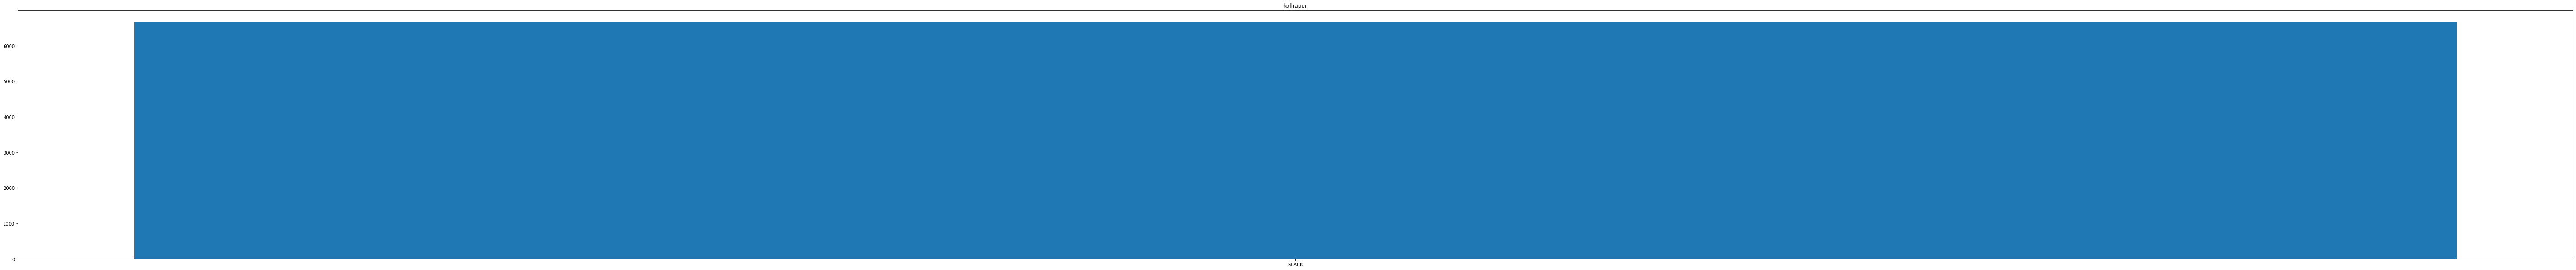

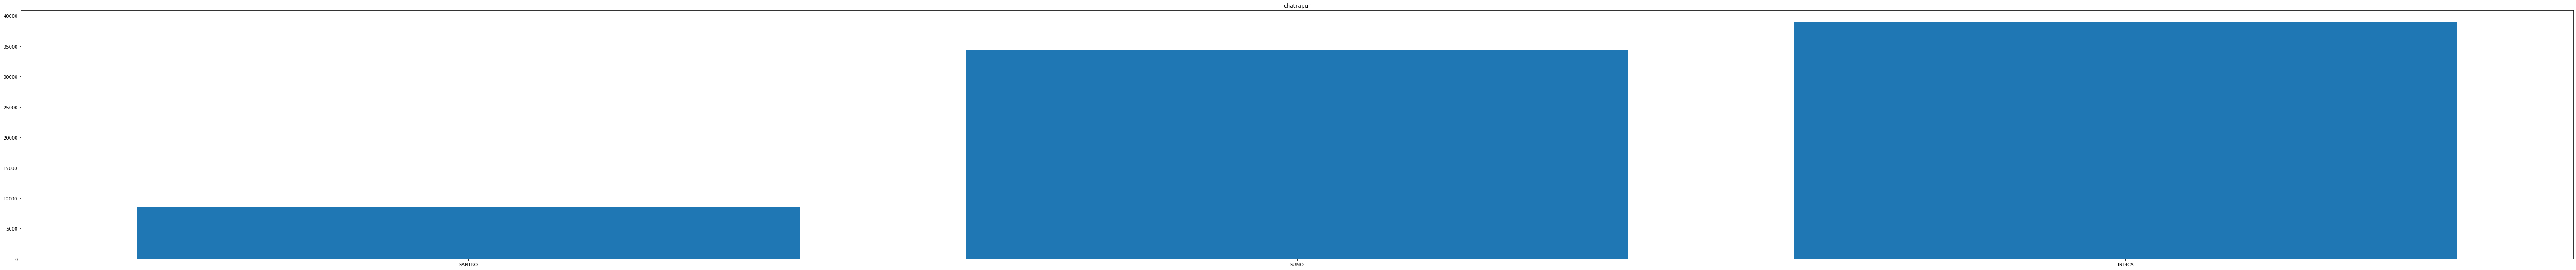

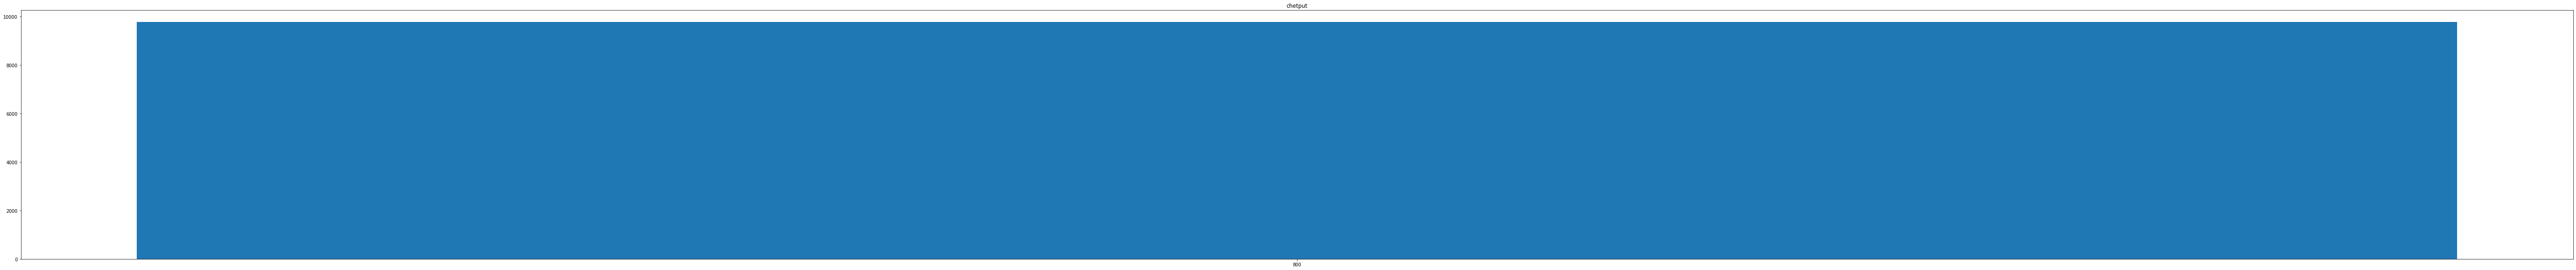

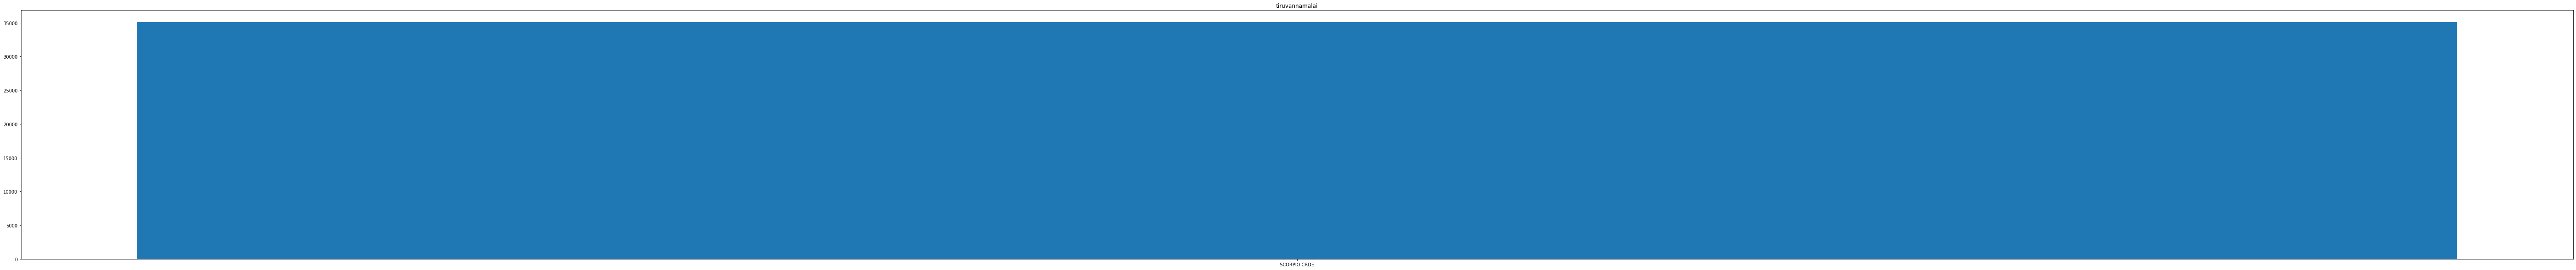

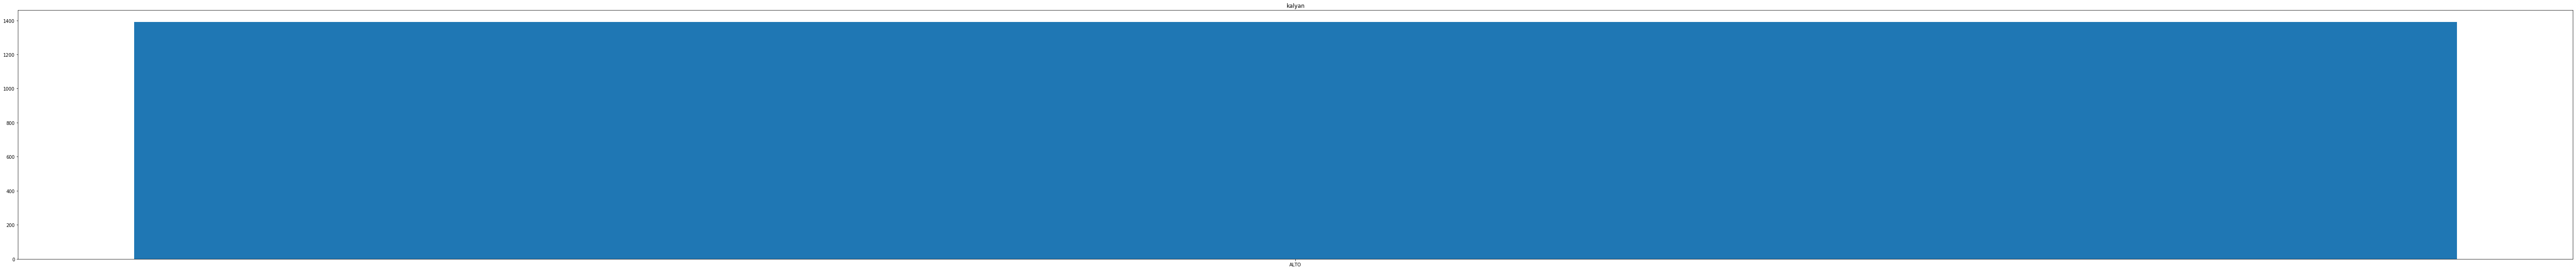

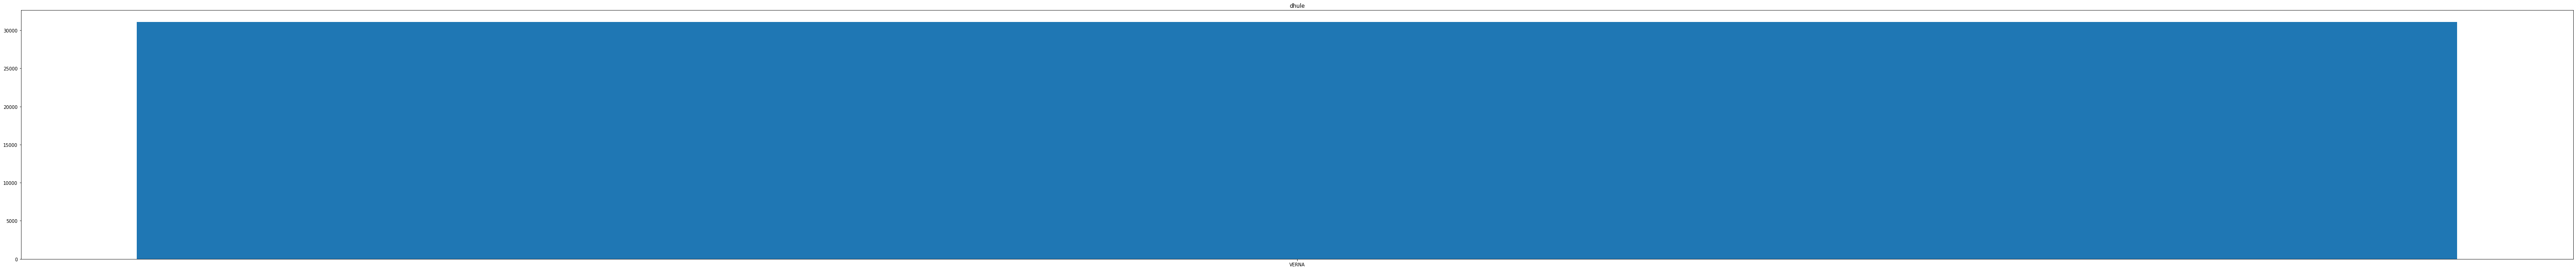

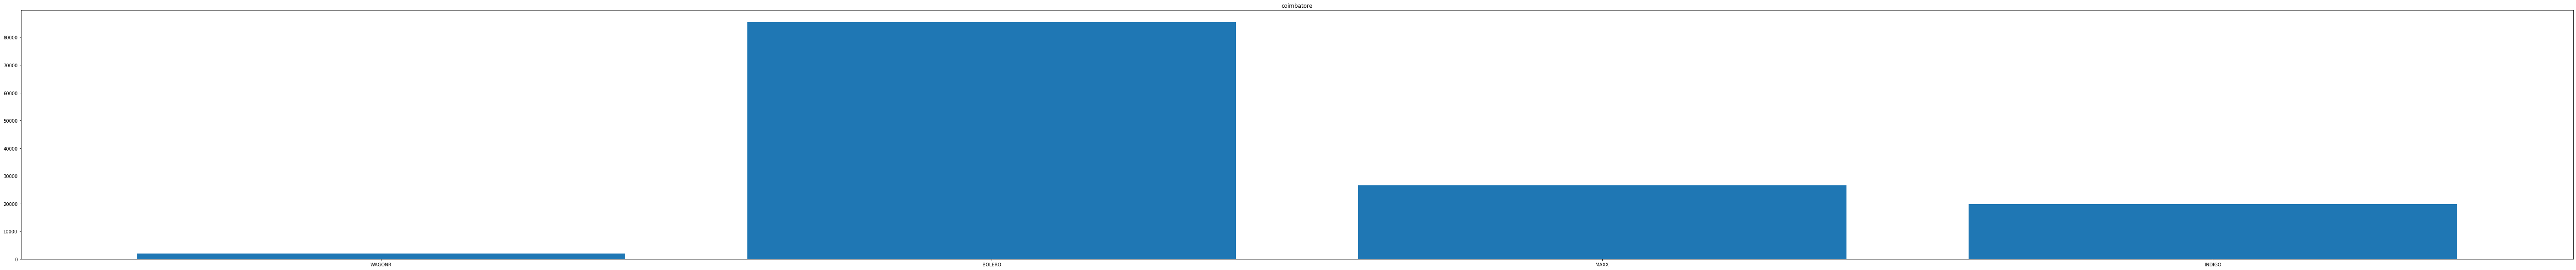

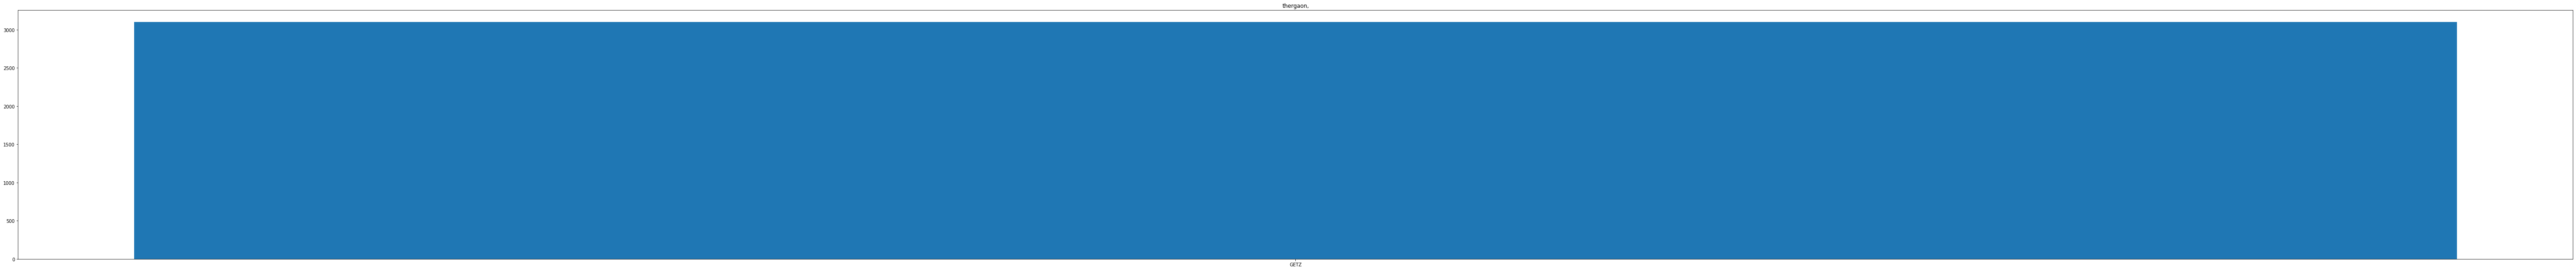

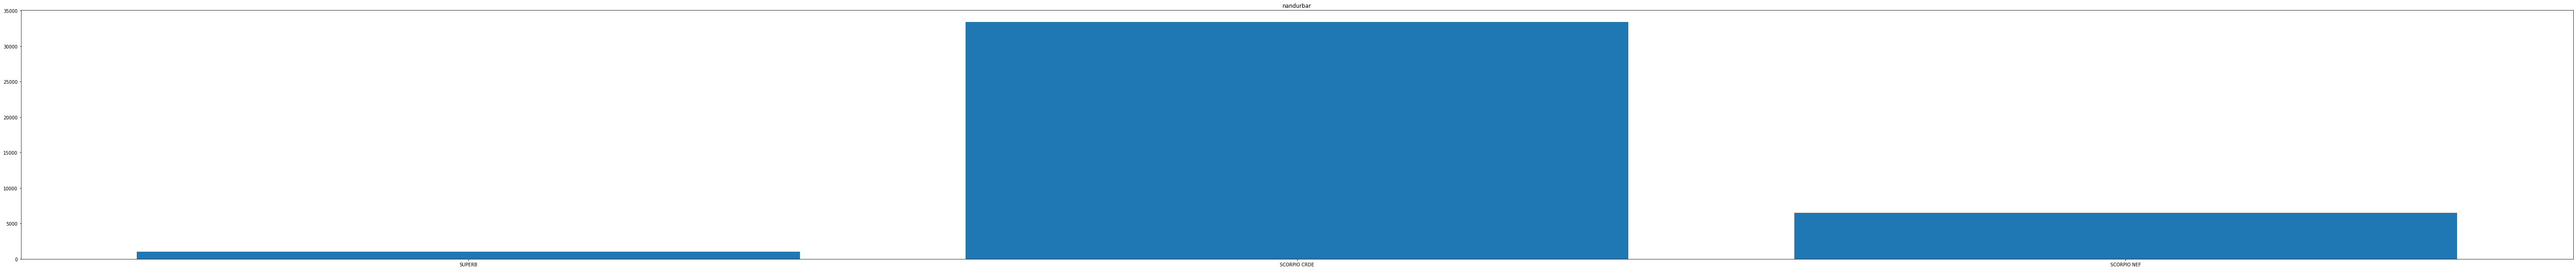

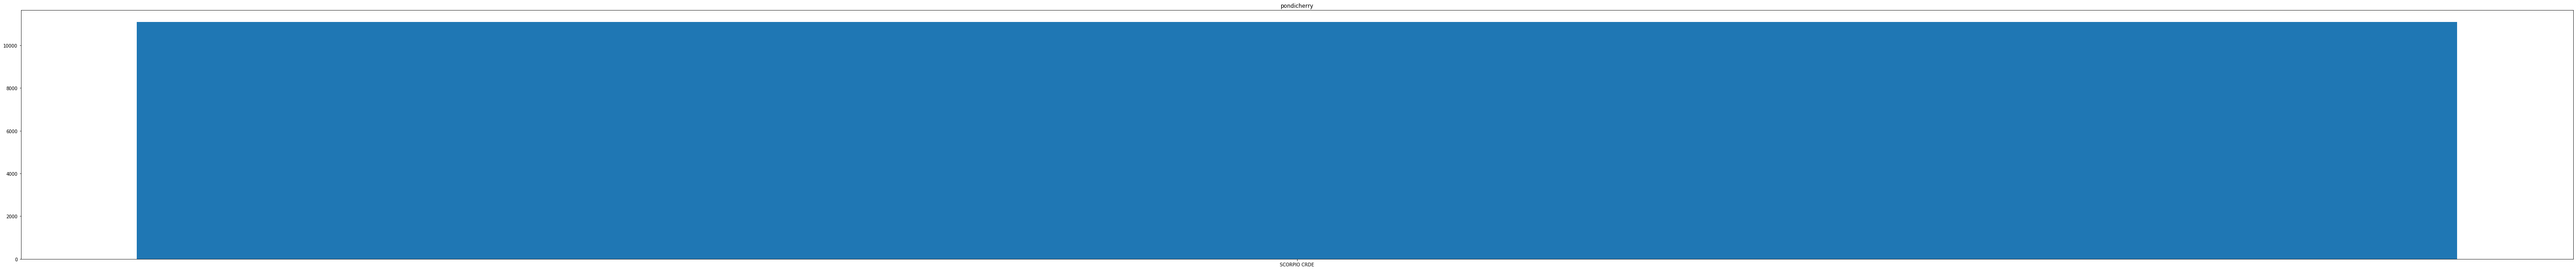

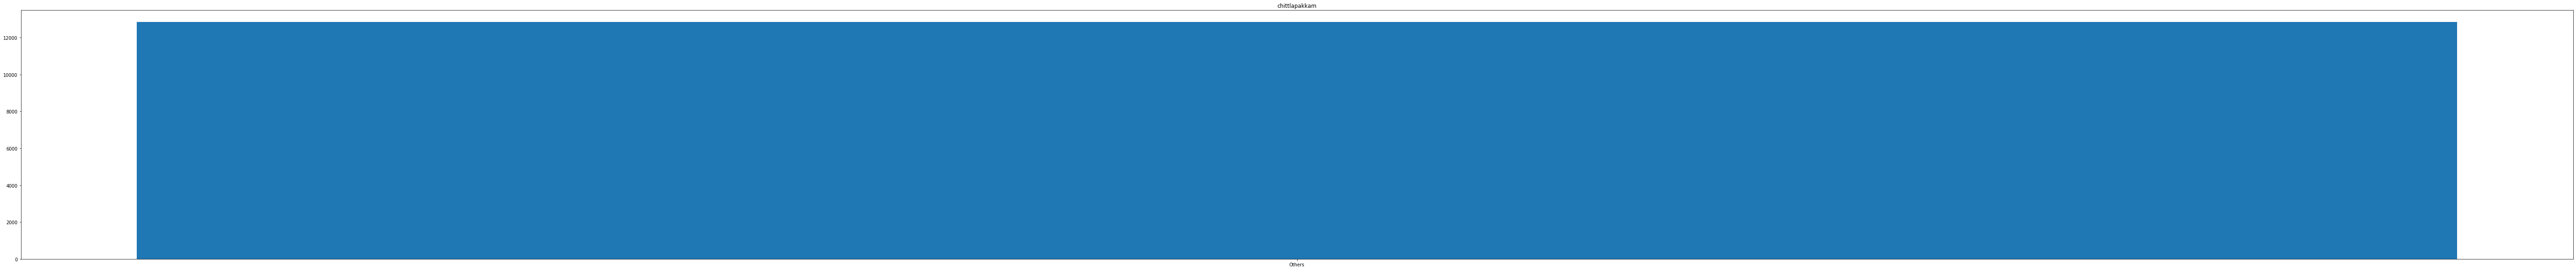

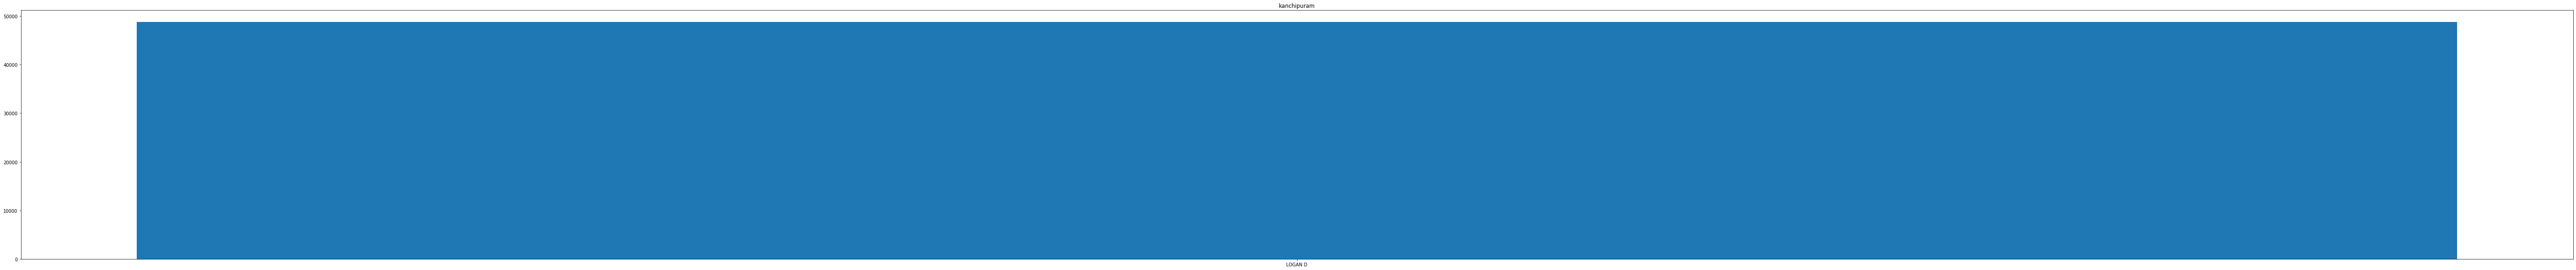

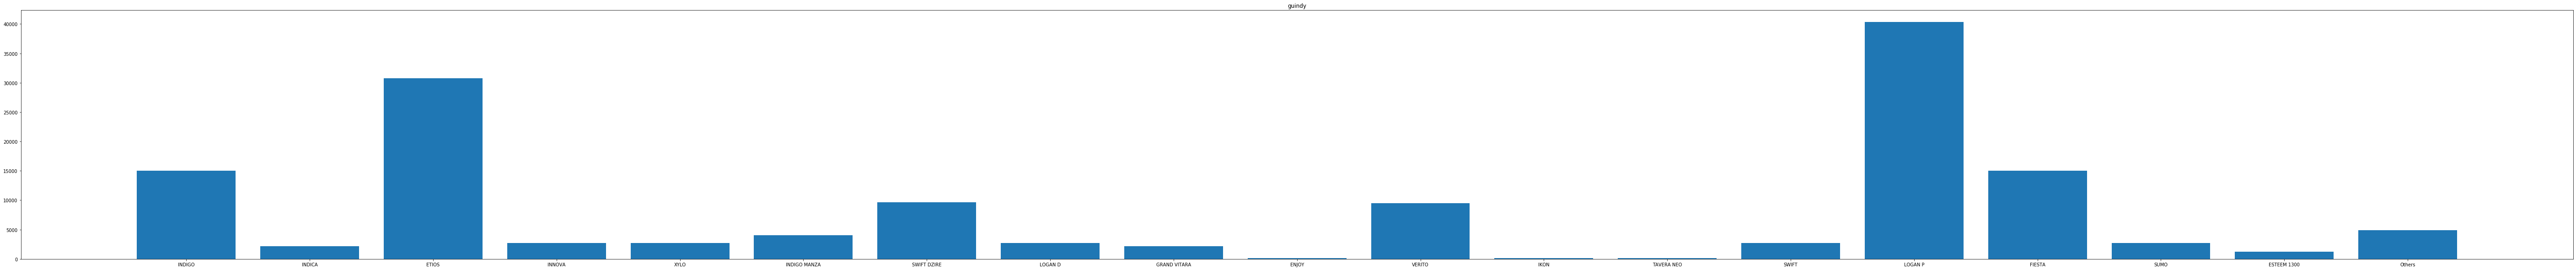

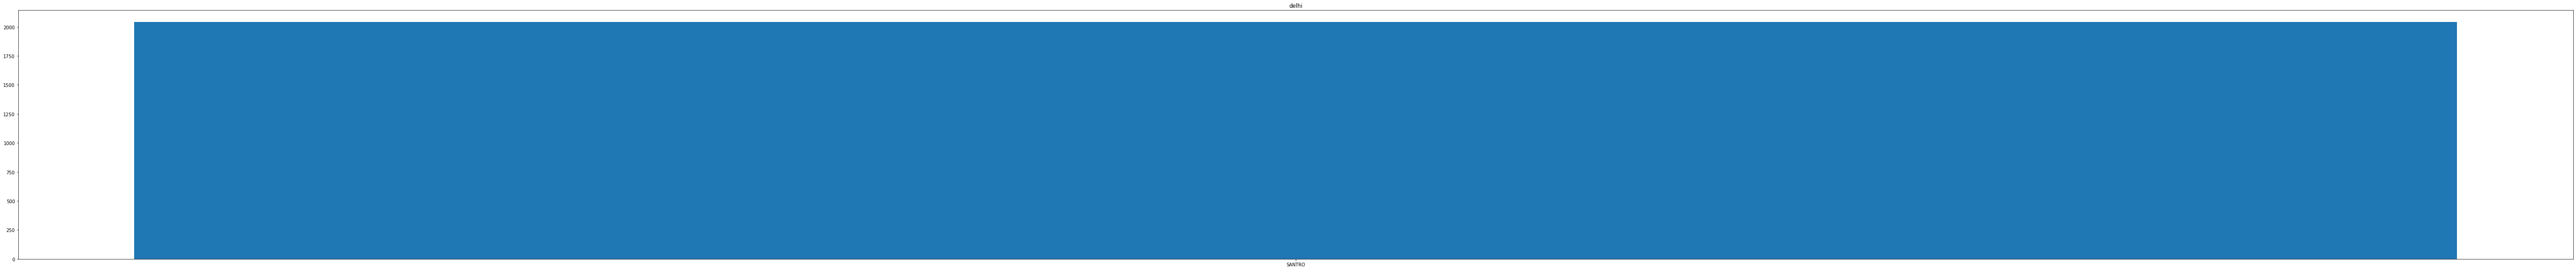

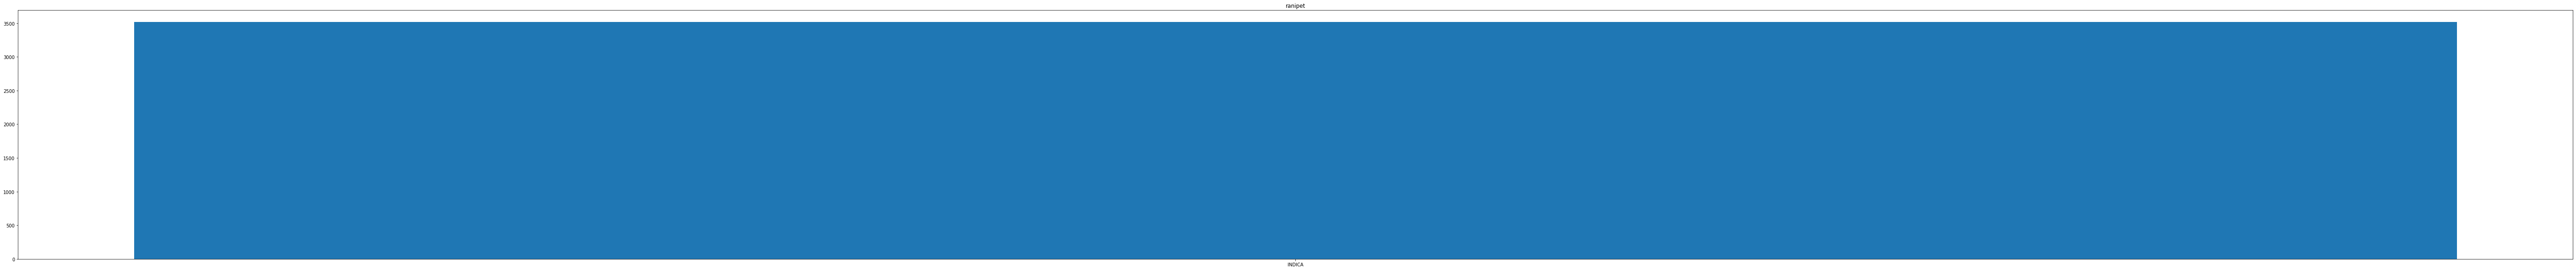

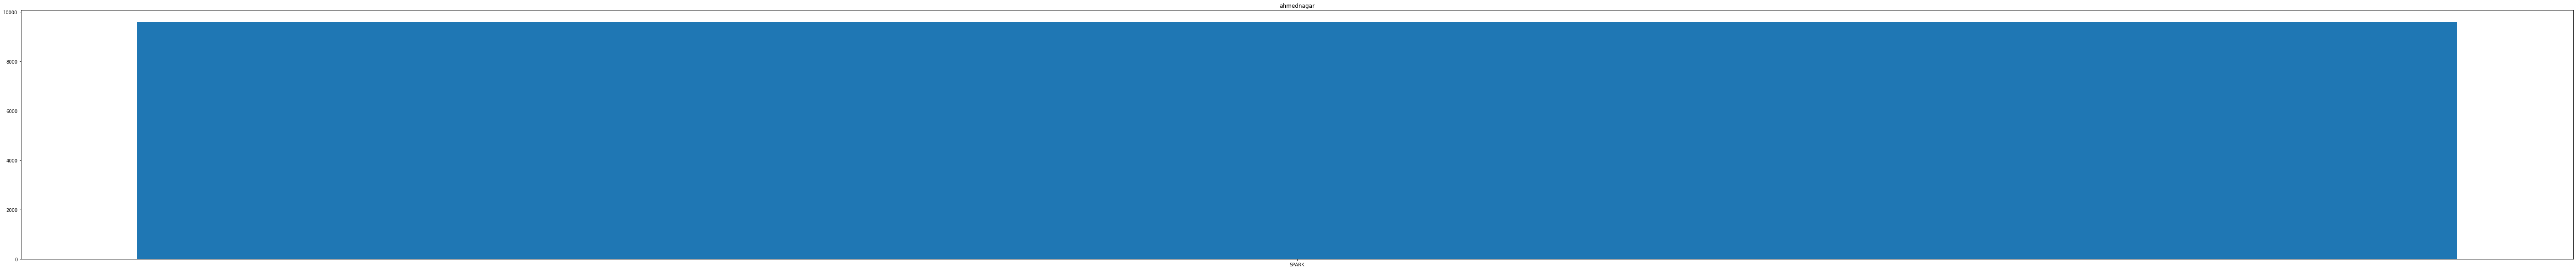

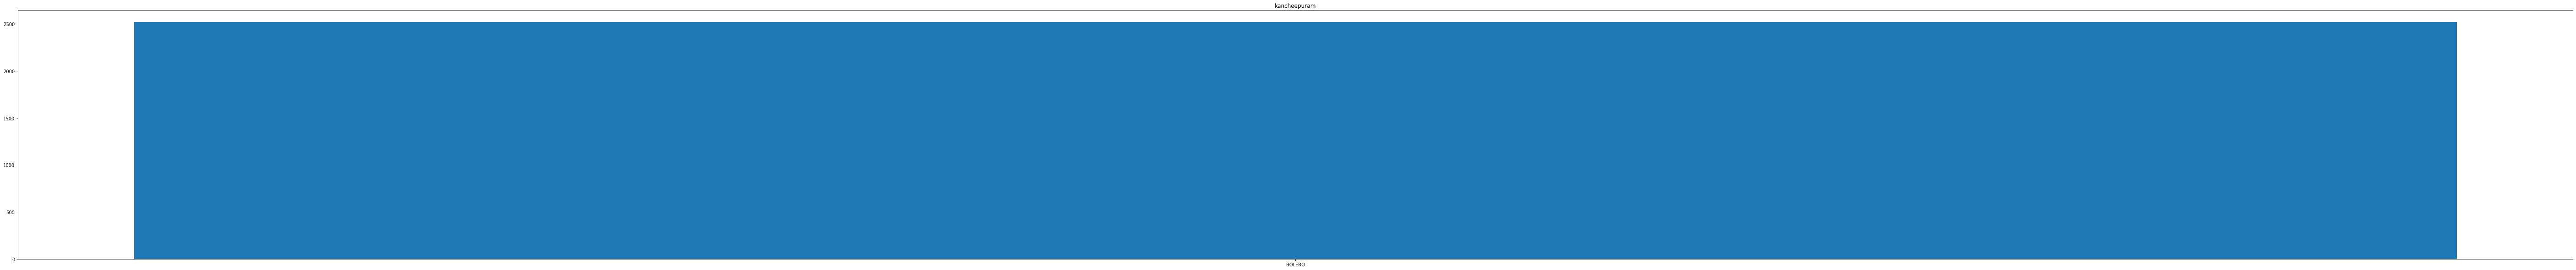

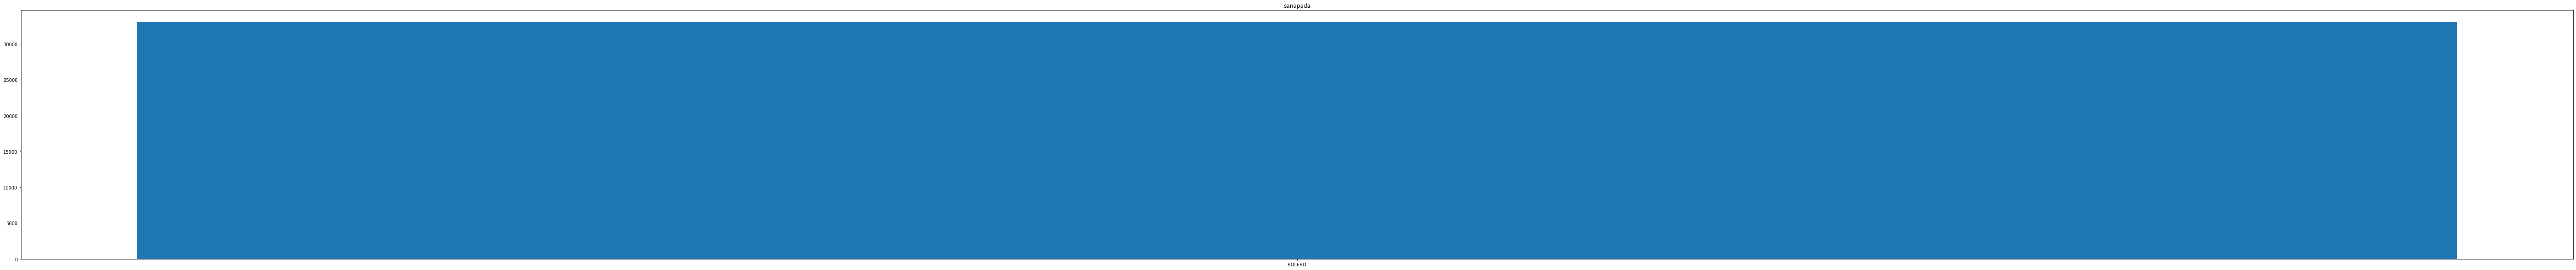

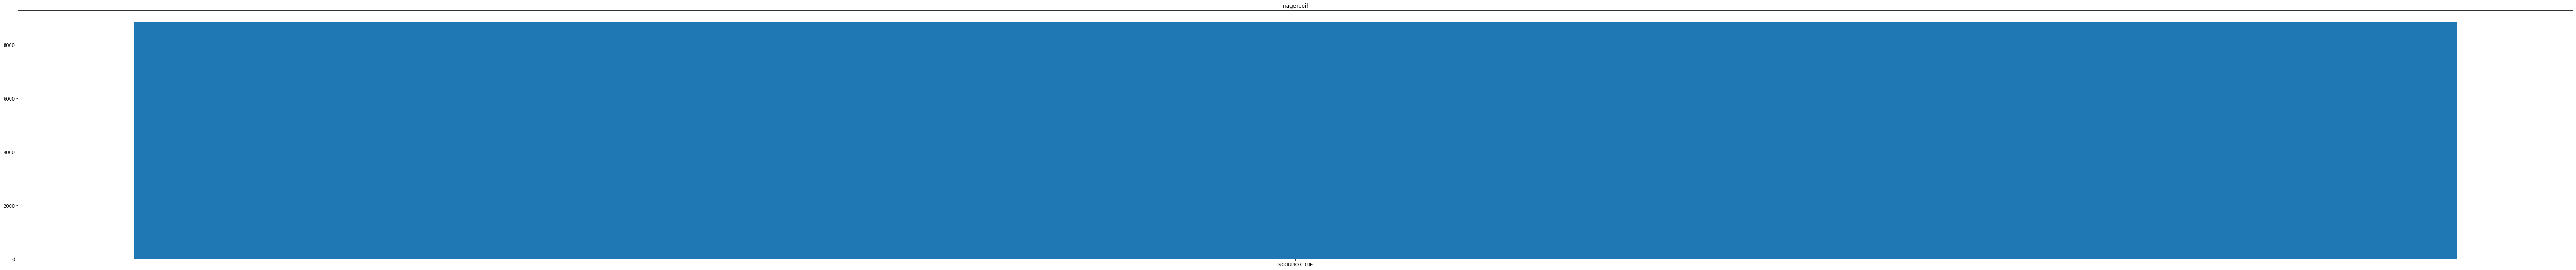

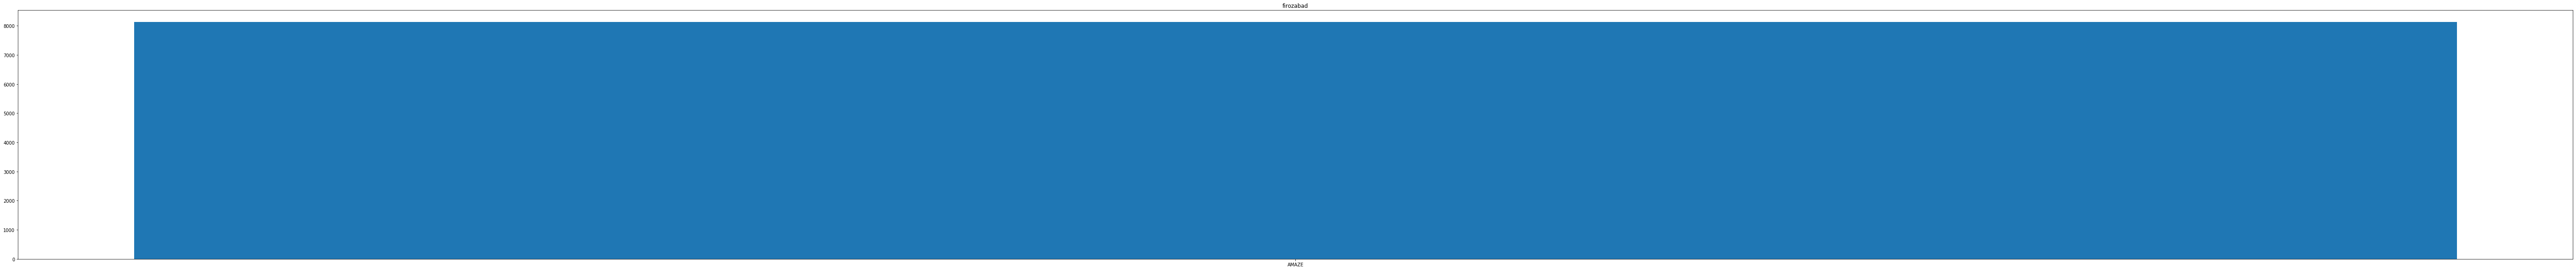

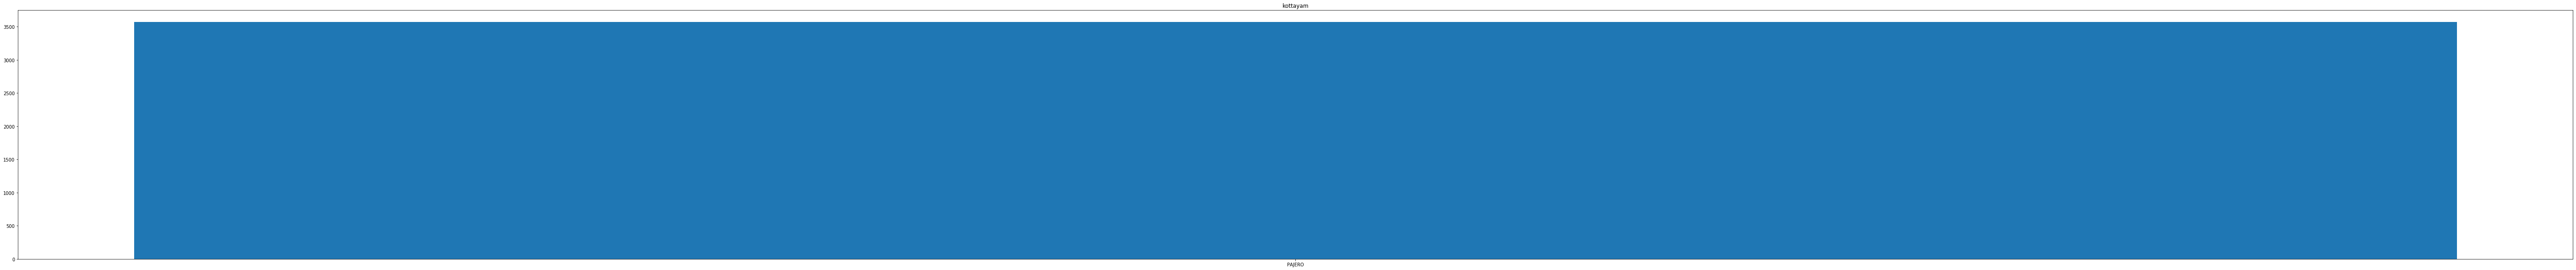

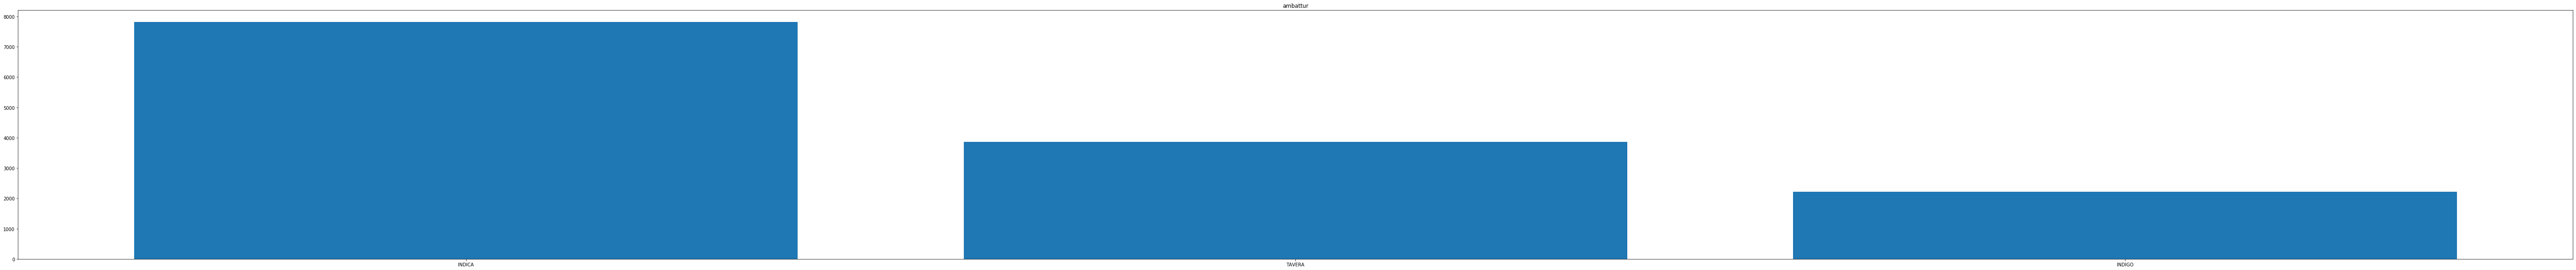

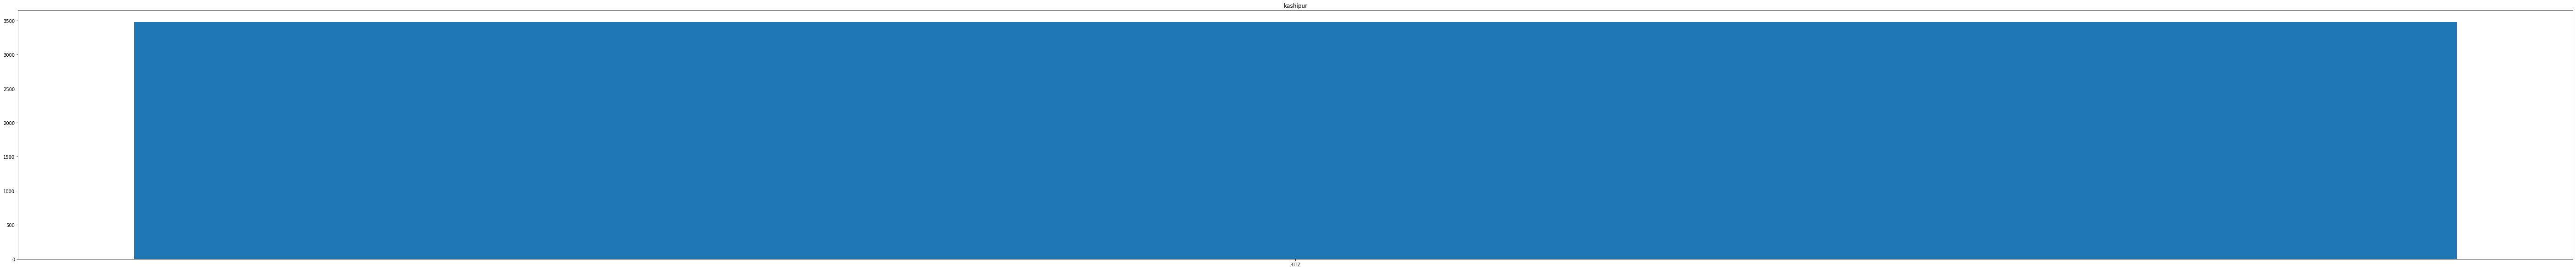

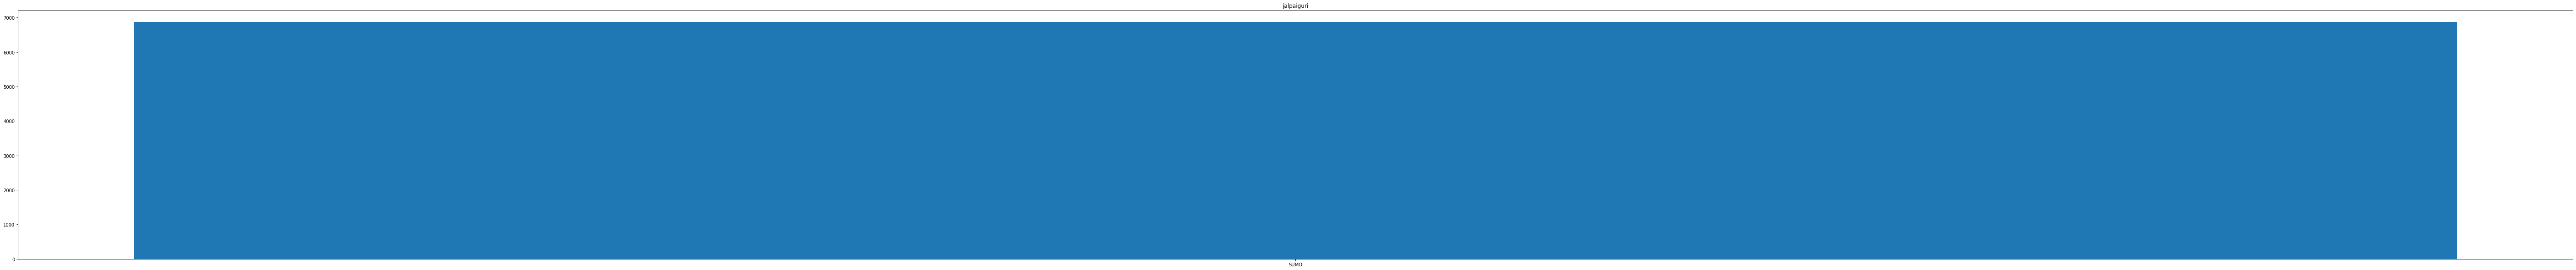

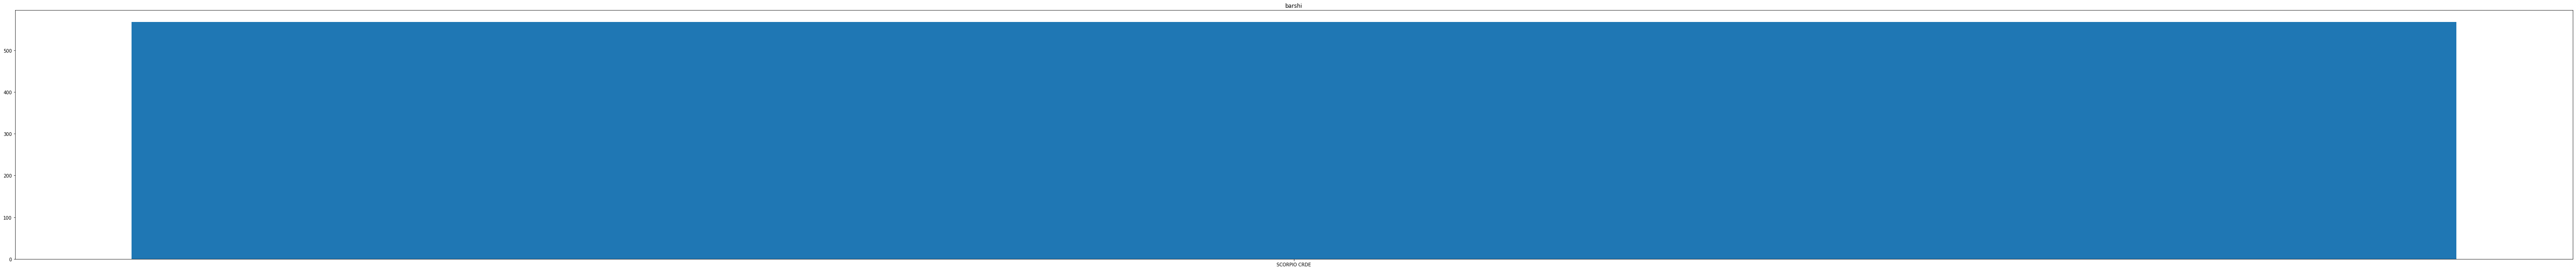

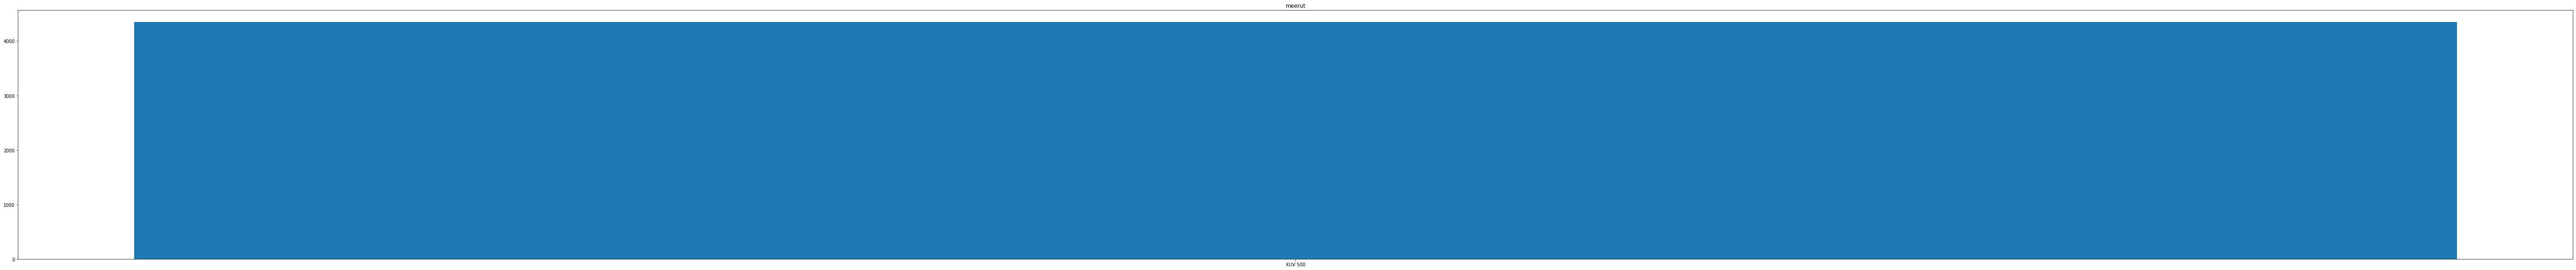

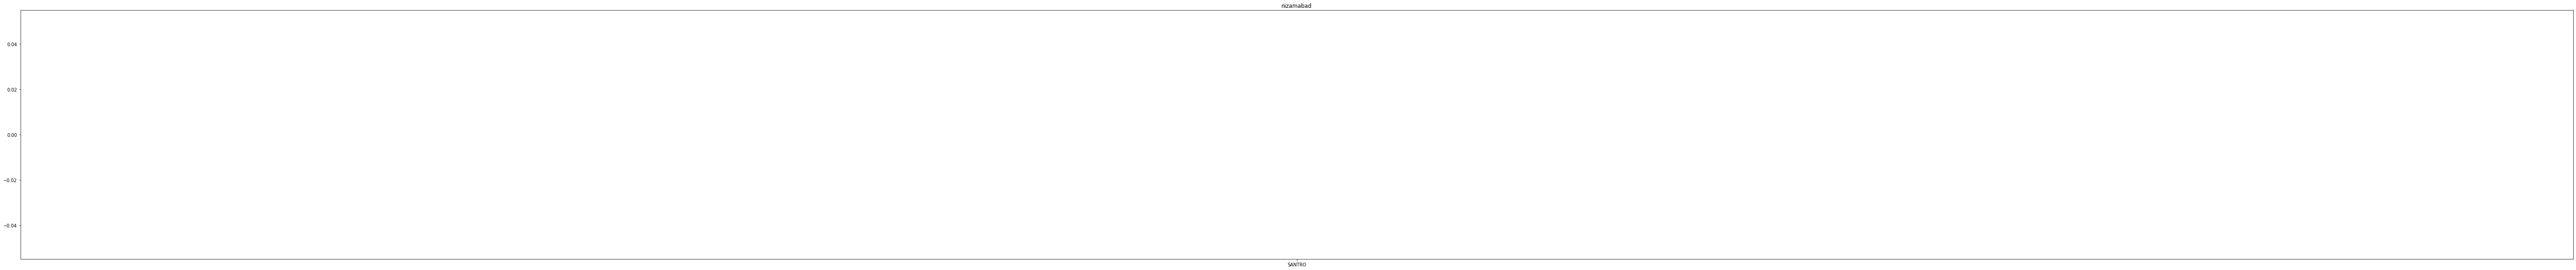

In [65]:
city=[]
print()
city=custinv['CITY'].unique()
for i in city:
    cars=custinv[custinv['CITY']==i]
    
    fig=plt.figure(figsize=(100,30))
    plt.title(i)
    plt.bar(cars['Model'],cars['Total Amt Wtd Tax.'],align='center')
    plt.show()

In [34]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [40]:
def setup():
    
    driver = webdriver.Chrome(executable_path=r"C:/Users/Administrator/chromedriver.exe")
    #driver.get("http://maps.google.com")
    driver.get("http://maps.google.com")
    return driver

def spelledCorrectly(driver, maybeMisspelled):
    searchBox = driver.find_element_by_name('q')
    searchBox.send_keys(maybeMisspelled)
    
    driver.find_element_by_id('searchbox-searchbutton').click()
    time.sleep(5)
    a=driver.find_element_by_xpath("//h1[@class='section-hero-header-title-title GLOBAL__gm2-headline-5']")
    #ref1 = driver.find_element_by_class_name('section-hero-header-title-title GLOBAL__gm2-headline-5')
    
    return(a.text)
    
    
    
    

if __name__ == "__main__":
     driver = setup() #pass this object into spelledCorrectly
     for i in custinv['CITY']:
     #custinv['CITY']=custinv['CITY'].apply(lambda x:spelledCorrectly(driver,x))
        custinv['CITY'].replace(i,spelledCorrectly(driver,i),inplace=True)
        driver.close()
       

InvalidSessionIdException: Message: invalid session id


In [98]:
driver = webdriver.Chrome(executable_path=r"C:/Users/Administrator/chromedriver.exe")
driver.get("http://maps.google.com")

elem = driver.find_element_by_name("q")
elem.clear()
elem.send_keys("nasik")
elem.send_keys(Keys.RETURN)

a=elem.text
print(a)


corrected text: nasi
